# 7506 - Trabajo práctico 1


##### Librerías

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
import scipy as sc
from sklearn.ensemble import IsolationForest
import sklearn as sk
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
#import dtreeviz.trees as dtreeviz
#import geopandas as gpd

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv('datasets/properati_argentina_2021.csv')
df = complete_dataset.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [9]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

## Descripción de las columnas
- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


## Filtrado inicial del Dataset
Como trabajaremos con un universo acotado de propiedades, haremos una selección inicial de las publicaciones que nos interesa analizar:

Como primer paso hay que filtrar las observaciones que su tipo de vivienda sea: Casa, PH o Departamento.

Luego filtramos la ubicacion quedandonos unicamente con las propiedades de Capital Federal.

A continuación, consideraremos solo las que esten cotizadas en dolares.

Y finalmente, tomamos solo las que sean ventas

In [10]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]]

place_l2              place_l3 property_currency property_type  \
25      Capital Federal                   NaN               USD          Casa   
42      Capital Federal                  Boca               USD  Departamento   
43      Capital Federal                  Boca               USD  Departamento   
49      Capital Federal                  Once               USD  Departamento   
51      Capital Federal                 Boedo               USD            PH   
...                 ...                   ...               ...           ...   
460072  Capital Federal      Villa del Parque               USD  Departamento   
460073  Capital Federal      Villa del Parque               USD  Departamento   
460074  Capital Federal      Villa del Parque               USD  Departamento   
460075  Capital Federal      Villa del Parque               USD  Departamento   
460090  Capital Federal  Centro / Microcentro               USD  Departamento   

       operation  
25         Venta  
42         Venta  
43         Venta  
49         Venta  
51         Venta  
...          ...  
460072     Venta  
460073     Venta  
460074     Venta  
460075     Venta  
460090     Venta  

[94249 rows x 5 columns]

A partir de aquí trabajaremos con el dataset filtrado (`ds_filtrado`)

Analizando los tipos de dato de los campos:
- Hay 3 campos de fecha, evaluaremos más adelante como tratarlos.
- Tenemos latitud y longitd en su formato correcto
- Hay una variable place_l6 que no debería ser un número, también analizaremos a que se debe.
- La cantidad de habitaciones (rooms y bedrooms) quizás debería tener valores enteros.
- El precio tiene un tipo correcto

## Exploración Inicial

### Tipos de variable

In [11]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

In [12]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

### Fechas


In [13]:
ds_train[["start_date", "end_date", "created_on"]].isna().sum()

start_date    0
end_date      0
created_on    0
dtype: int64

In [14]:
ds_train["start_date"].value_counts()

2021-12-16    3699
2021-02-13    1728
2021-11-03     802
2021-08-03     675
2021-04-10     652
              ... 
2021-12-26      13
2021-12-19      11
2021-10-24      10
2021-01-02       9
2021-11-27       1
Name: start_date, Length: 365, dtype: int64

In [15]:
ds_train["end_date"].value_counts()

2021-06-05    10207
2022-01-27     7471
2022-02-09     6094
9999-12-31     4064
2021-03-01     1533
              ...  
2021-12-06        1
2022-06-14        1
2022-09-06        1
2022-03-02        1
2022-08-26        1
Name: end_date, Length: 601, dtype: int64

In [16]:
ds_train[ds_train.created_on != ds_train.start_date].shape

(0, 20)

Podemos ver que la columnas created_on y start_date siempre son iguales, descartaremos una de ellas más adelante.

In [17]:
ds_train["created_on"].value_counts()

2021-12-16    3699
2021-02-13    1728
2021-11-03     802
2021-08-03     675
2021-04-10     652
              ... 
2021-12-26      13
2021-12-19      11
2021-10-24      10
2021-01-02       9
2021-11-27       1
Name: created_on, Length: 365, dtype: int64

Hay un valor extraño en end_date, la fecha 9999-12-31, hay 285 apariciones de esta fecha

In [18]:
ds_train[ds_train.end_date == '9999-12-31']['start_date'].value_counts()

2021-02-09    105
2021-06-24     95
2021-06-30     69
2021-02-17     55
2021-07-13     54
             ... 
2021-04-28      1
2021-10-03      1
2021-11-29      1
2021-12-27      1
2021-05-23      1
Name: start_date, Length: 286, dtype: int64

Considerando que todas las fechas son de 2021, y que el dato que falta es el del fin de la publicación (es decir, la casa esta publicada) y a fines de preservar estos datos, traeremos a consideración la duración promedio de cada publicación, calcularemos ese promedio dejando fuera los 285 casos que presentan la fecha inválida.

Tomaremos para el cálculo las fechas convertidas a datetime.

In [19]:
dias = pd.to_datetime(ds_train[ds_train.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_train[ds_train.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         71335
mean     74 days 17:13:55.769257728
std      84 days 12:57:21.772900413
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                51 days 00:00:00
75%                99 days 00:00:00
max               618 days 00:00:00
dtype: object

El promedio de la duración de las publicaciones es casi de 75 días, asumiremos que las publicaciones con la fecha invalida duraron lo mismo que el promedio y tomaremos como fecha final la fecha de inicio + 75 días.

In [20]:
ds_train.loc[ds_train.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_train[ds_train.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_train.end_date

432209    2022-03-25
142141    2021-07-10
181613    2021-09-10
194510    2022-01-27
327682    2022-01-27
             ...    
366919    2021-04-16
398108    2021-05-11
184998    2021-07-08
25877     2022-03-24
3071      2021-03-01
Name: end_date, Length: 75399, dtype: object

Finalmente, como todos los valores son formatos válidos de fecha, podemos convertir sin problemas.

### Conversion tipo de dato

In [21]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

## Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda

In [22]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74549.000000       66534.000000            71547.000000   
mean              2.819448           2.012129              107.459055   
std               1.426443           1.121959              907.081870   
min               1.000000           1.000000               10.000000   
quartile 1        2.000000           1.000000               45.000000   
median            3.000000           2.000000               65.000000   
quartile 3        4.000000           3.000000              105.000000   
max              40.000000          70.000000           123000.000000   
mode              3.000000           1.000000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72724.000000  72475.000000  72475.000000   
mean                       89.400803    -34.591131    -58.450844   
std                      1100.435145      0.196594      0.307406   
min                         1.000000    -53.788624    -71.471192   
quartile 1                 40.000000    -34.616007    -58.466492   
median                     57.000000    -34.595777    -58.438975   
quartile 3                 88.000000    -34.577455    -58.408916   
max                    217000.000000    -24.219827    -54.133330   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.254763e+05  
std           3.113221e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.430000e+05  
quartile 3    2.350000e+05  
max           1.200000e+07  
mode          1.100000e+05

## Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [23]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

La tabla muestra varias cosas:
- Hay 75399 propiedades habiendo filtrado solo las de Capital Federal, Venta y USD
- Hay 64617 departamentos, 7436 PHs y 3346 casas
- Hay 11547 propiedades en Palermo
- El id de la propiedad es único y no representa nada útil para nuestro procesamiento. Parecería pasar algo similar con el título, lo analizaremos en más detalle más adelante

## Análisis gráfico de las distribuciones de las variables

#### Distribución de fechas 

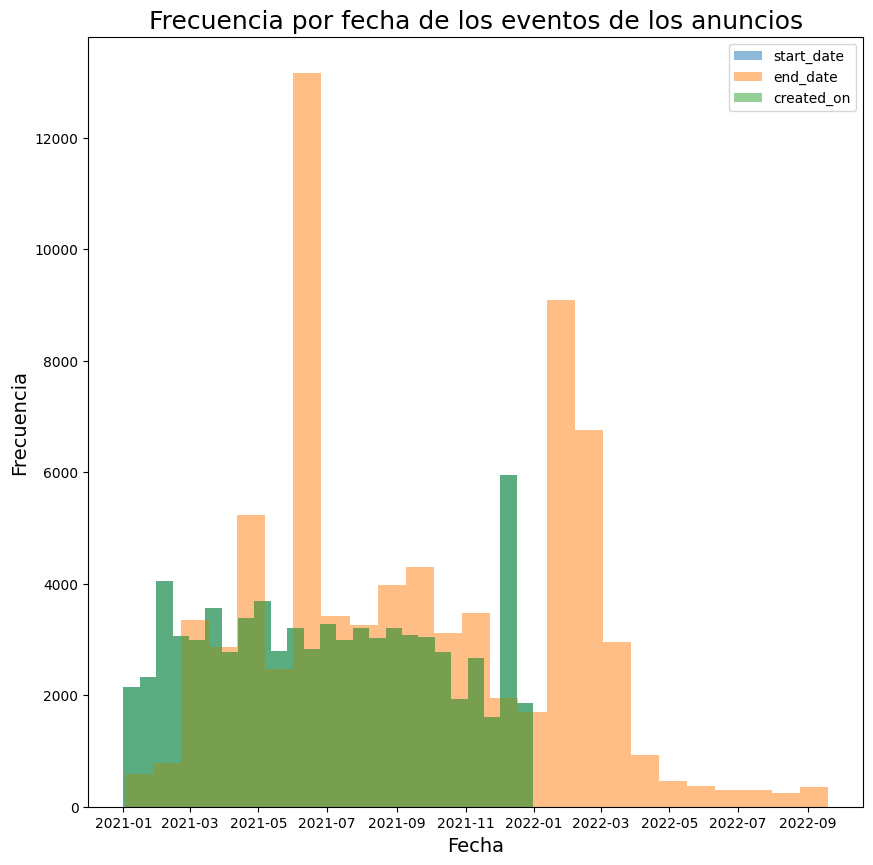

In [24]:

plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')


En este grafico se puede apreciar la distribución de las variables que hacen referencia a las fechas de creacion, alta y baja de los anuncios. Podemos ver que la distribución de las fechas de creación coincide con la distribución de las fechas de alta del anuncio, lo cual tiene sentido que así sea ya que la fecha de creación del anuncio es la primer versión del anuncio en ser dada de alta. 

###  Distribución de barrios
Primero vemos la cantidad de apariciones de los barrios por anuncio en la siguiente tabla:

In [25]:
ds_train['place_l3'].value_counts()

Palermo                 11479
Belgrano                 7095
Caballito                5755
Recoleta                 5037
Villa Urquiza            3750
Almagro                  3268
Nuñez                    2833
Villa Crespo             2553
Flores                   2498
Barrio Norte             2362
Balvanera                2038
Colegiales               1565
Villa Devoto             1514
Villa del Parque         1456
Saavedra                 1433
Puerto Madero            1191
San Telmo                1129
San Cristobal            1057
San Nicolás              1045
Retiro                   1001
Barracas                  996
Boedo                     979
Floresta                  944
Monserrat                 882
Parque Chacabuco          877
Villa Pueyrredón          822
Coghlan                   787
Villa Luro                594
Mataderos                 579
Chacarita                 545
Villa Ortuzar             540
Liniers                   532
Parque Patricios          489
Villa Luga

Como podemos observar, hay demasiados barrios con pocas apariciones, por lo que nos centraremos en visualizar los primeras 25 barrios que mas aparecen. Agrupando al resto en una nueva categoria llamada "Otras".

In [26]:
top25 = ds_train['place_l3'].value_counts().head(25)

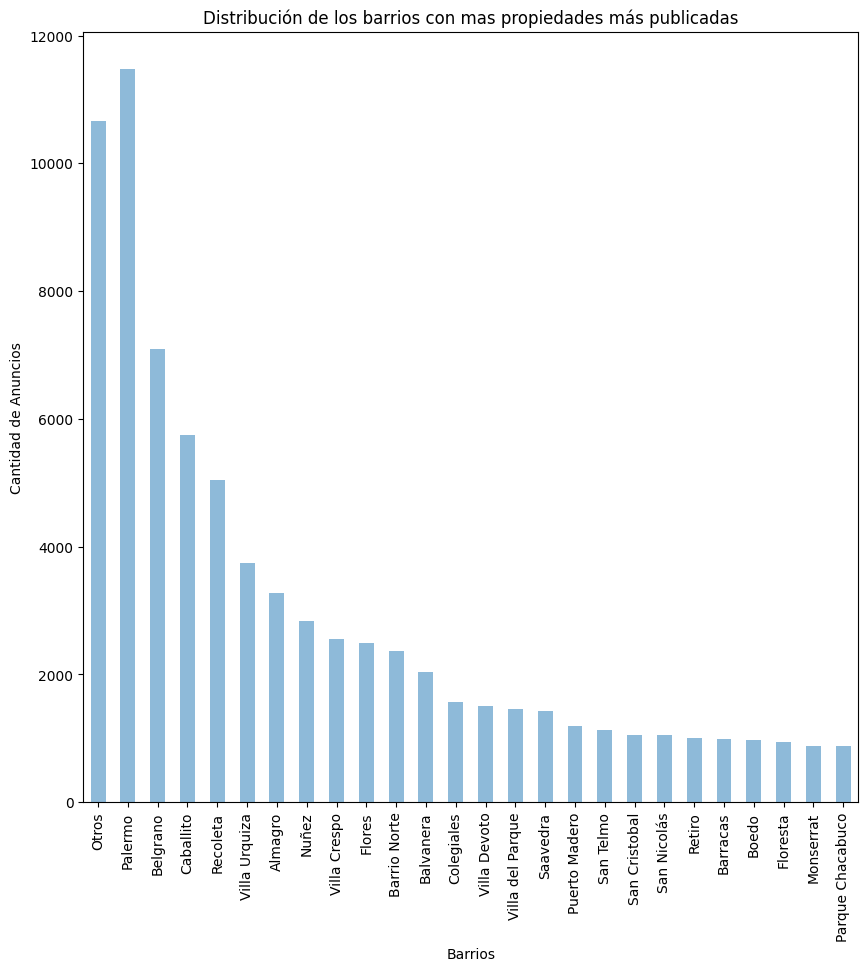

In [27]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

El barrio de Palermo es la que tiene mas propiedades publicadas

### Distribución de tipos de propiedad

Para analizar la distribucion de la variable property_type vamos a agrupar las apariciones en un grafico de barras por tipo de propiedad

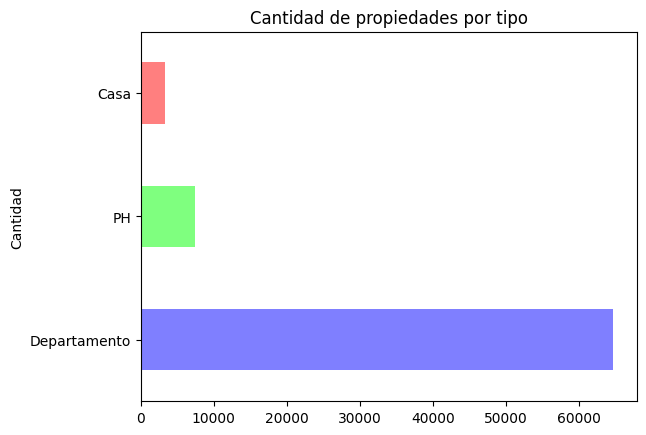

In [28]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

A simple vista se puede ver que la mayoria de publicaciones son de departamentos por una amplia diferencia

### Distribución de latitud y longitud
Para analizar la longitud y latitud vamos a utilizar un grafico de a pares ya que nos aporta más información sobre su distribución, pudiendo visualizar la localización de la propiedad. Adicionalmente se distinguirá por el tipo de propiedad.

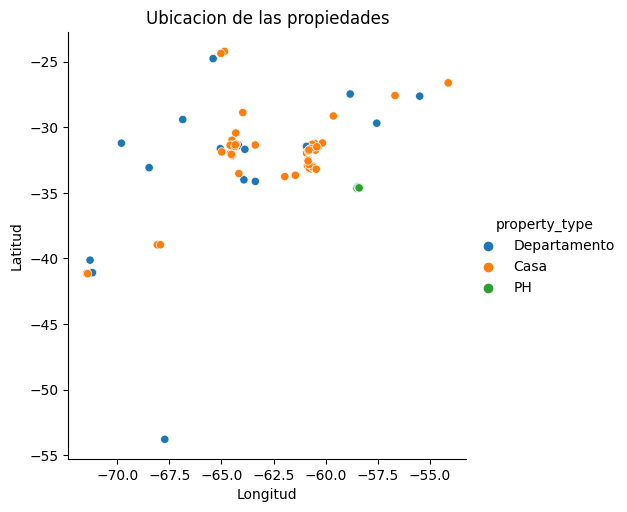

In [29]:
sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

Podemos ver que la mayoria de propiedades publicadas se encuentran concentradas en un área en particular, donde mayormente son de tipo Casa. Y al alejarse se ven departamentos distanciados entre sí.

### Distribución de habitaciones y baños

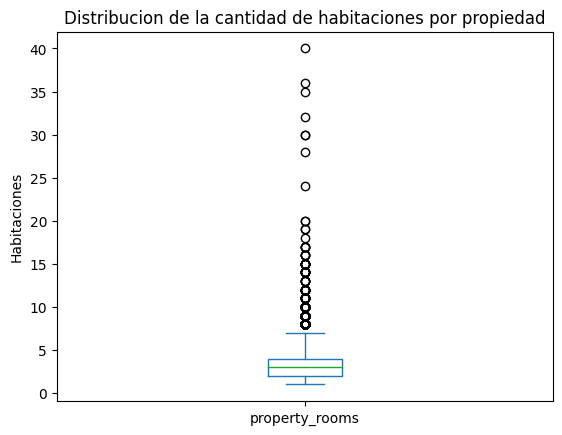

In [30]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

Podemos ver que hay una gran cantidad de outliers, siendo 40 el que mas se aleja, para visualizar mejor la distribucion del boxplot veremos un nuevo grafico sin considerar los outliers.

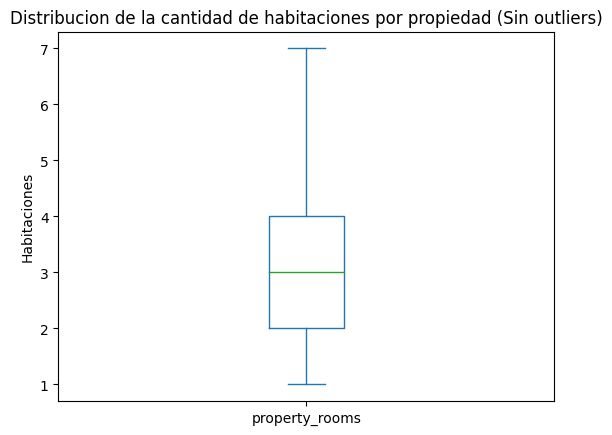

In [31]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

Ahora si podemos visualizar mejor los valores de la mediana, q3, q1 y los bigotes. Que toman la siguiente cantidad de habitaciones:

*   Bigotes: 1 y 7.
*   Cuartil 1: 2
*   Mediana: 3.
*   Cuartil 3: 4.





Hacemos el mismo procedimiento ver la distribución de la cantidad de baños por propiedad

<AxesSubplot: title={'center': 'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

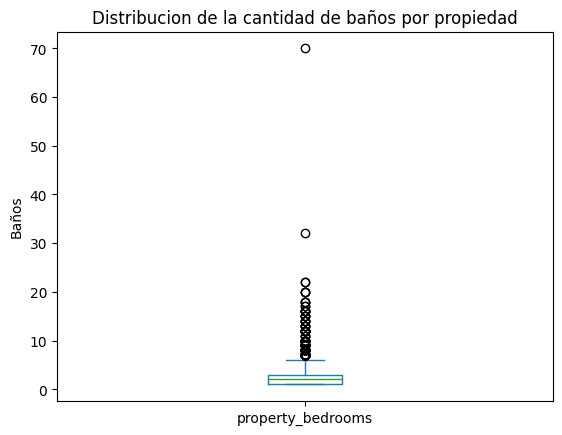

In [32]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")

Vemos que esta vez hay mas distancia entre el outlier mas alejado y el resto de outliers.

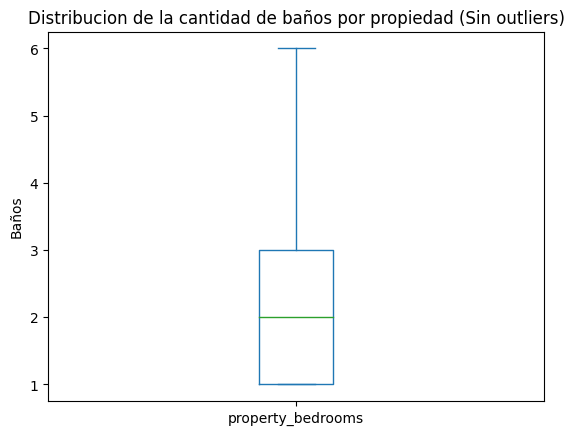

In [33]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

En este caso toman los siguientes valores:

*   Bigotes: -1 y 6.
*   Cuartil 1: 1.
*   Mediana: 2.
*   Cuartil 3: 3.


### Distribución de precio

Para analizar la distribución del precio, como es un tipo de variable continua y cada observación puede tomar un valor en un rango muy grande, optamos por hacer una agrupación por rangos de precios, obteniendo una categoria por cada rango.
Vamos a considerar la mediana para establecer los limites entre cada grupo, consideramos que es un buen valor para dividir al conjunto en partes ya que no se ve afectado drasticamente por outliers (como si sucede con la media).

In [34]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 143000.0


<AxesSubplot: title={'center': 'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

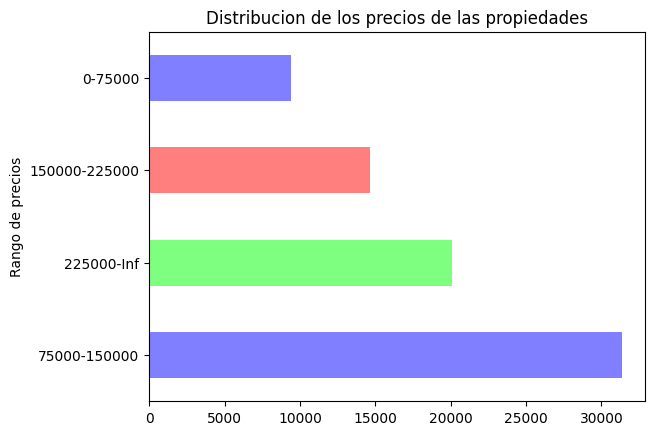

In [35]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

Podemos ver que la mayoria de propiedades estan dentro del rango de 75000 y 150000 USD.

### Distribución de superficie total y cubierta

Utilizaremos un violin plot para cada variable. 

<AxesSubplot: >

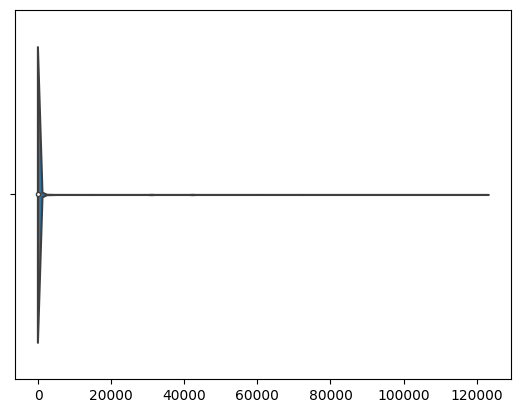

In [36]:
sns.violinplot(ds_train.property_surface_total.values)

A simple vista no esta muy claro el gráfico por la cantidad de outliers que hay, por lo que dejaremos de lado la mayoria de outliers para interpretarlo mas en detalle.

<AxesSubplot: >

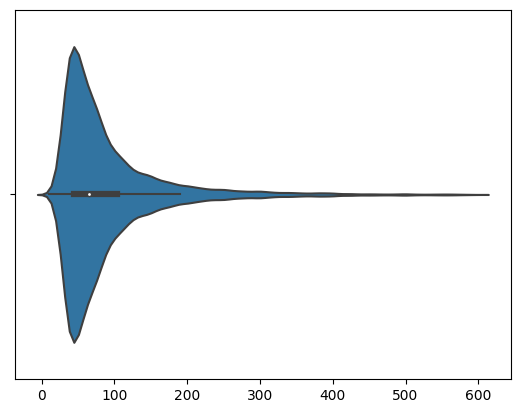

In [37]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

Podemos ver que entre 0 y 100 se encuentra la mayor densidad

Hacemos el mismo procedimiento para visualizar la distribución de la superficie cubierta de la propiedad

<AxesSubplot: >

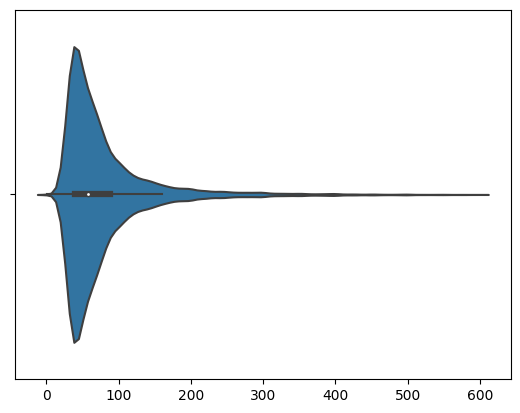

In [38]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

Se nota que el grafico de property_surface_total es similar al de property_surface_covered, teniendo el segundo una densidad levemente menor. 

## Correlación entre variables

A continuación analizaremos la correlación entre las variables cuantitativas, primero visualizando la distribución a pares entre estas.

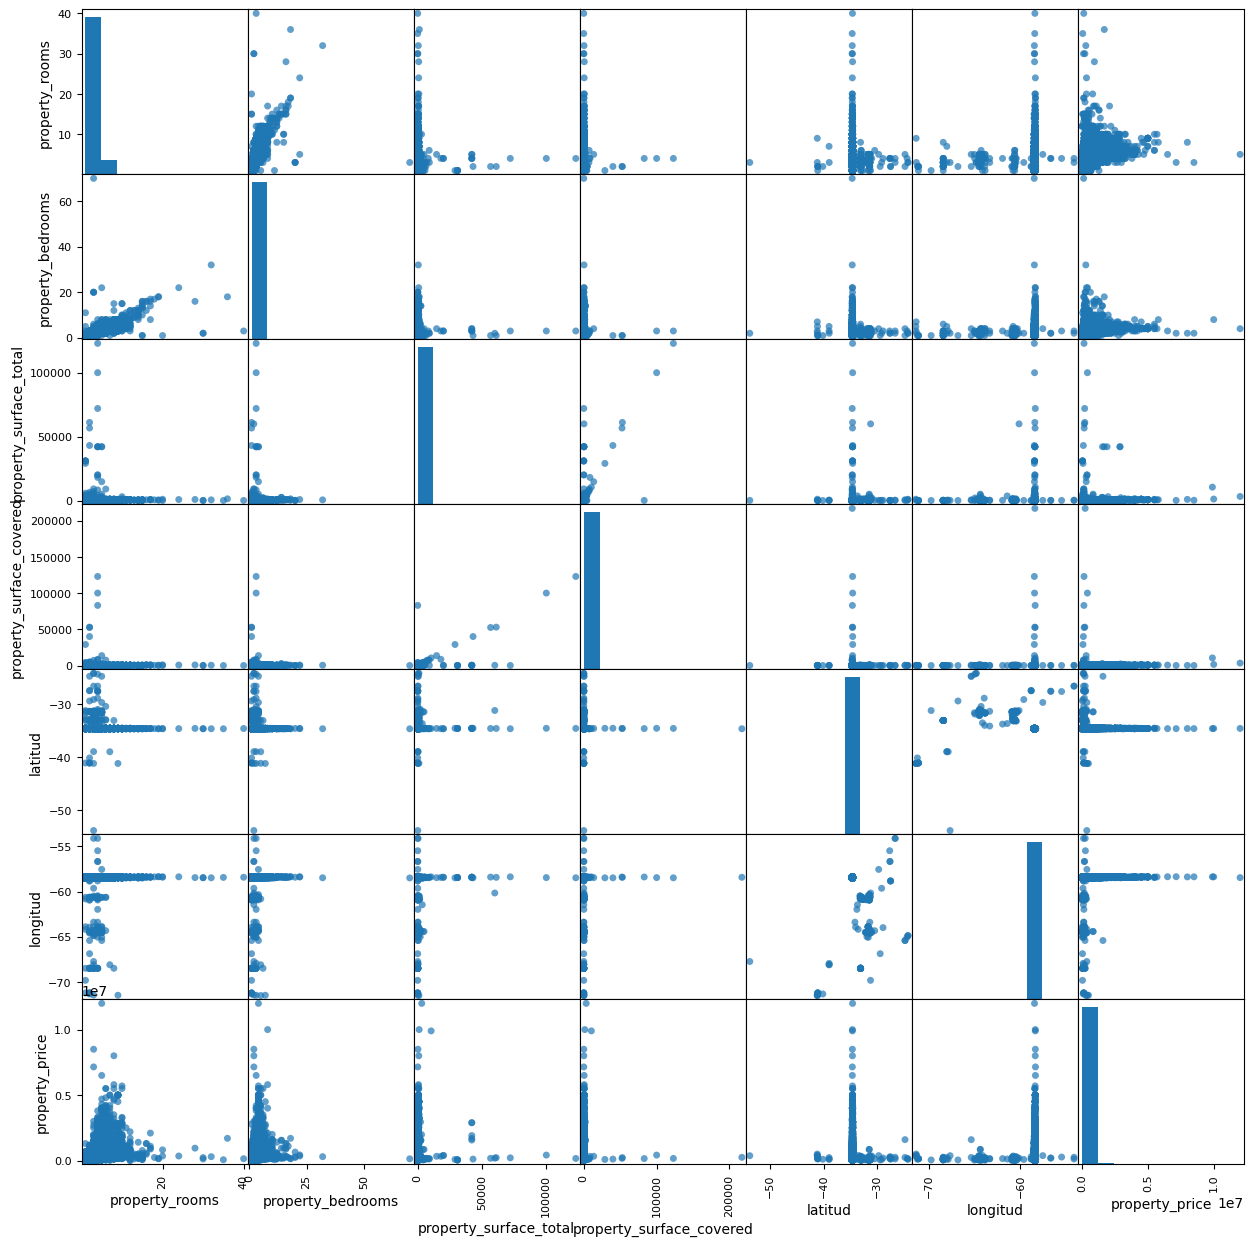

In [39]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

Si bien a simple vista no esta muy claro que variables están correlacionadas entre sí, podemos suponer que puede llegar a haber relación entre property_rooms y property_bedrooms, property_surface_total y property_surface_covered, property_price y property_rooms, property_price y property_bedrooms. Las cuales tiene sentido que pudiesen tener algún tipo de relación.

Además podemos considerar en menor medida que haya una relación entre longitud y latitud (cosa que no necesariamente tendría que ser así)




Analizaremos la correlación lineal entre variables por medio de la medición del coeficiente de Pearson

In [40]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.875719   
property_bedrooms               0.875719           1.000000   
property_surface_total          0.071066           0.071661   
property_surface_covered        0.069371           0.069566   
latitud                         0.006515           0.002493   
longitud                       -0.011304          -0.010063   
property_price                  0.500579           0.427064   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.071066                  0.069371   
property_bedrooms                       0.071661                  0.069566   
property_surface_total                  1.000000                  0.714209   
property_surface_covered                0.714209                  1.000000   
latitud                                 0.030442                  0.002089   
longitud                               -0.019156                 -0.001139   
property_price                          0.090028                  0.052675   

                           latitud  longitud  property_price  
property_rooms            0.006515 -0.011304        0.500579  
property_bedrooms         0.002493 -0.010063        0.427064  
property_surface_total    0.030442 -0.019156        0.090028  
property_surface_covered  0.002089 -0.001139        0.052675  
latitud                   1.000000 -0.210525        0.015039  
longitud                 -0.210525  1.000000        0.023214  
property_price            0.015039  0.023214        1.000000

Haremos un heatmap que nos permite visualizar mejor la correlación

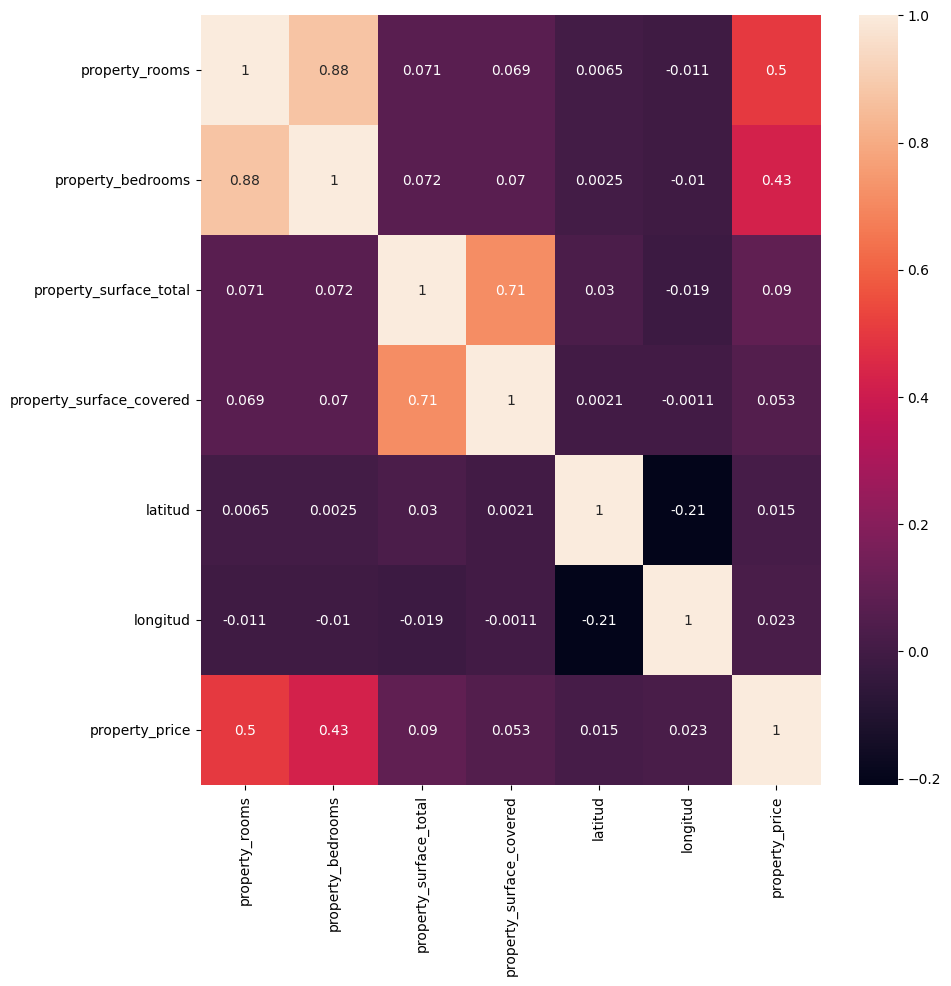

In [41]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

Luego de calcular el coeficiente de Pearson donde los que resultan cercanos a 1 indican una gran correlación entre sí, los que tienden a 0 tienen poca correlación y los cercanos a -1 presentan una notable correlación negativa.

Veremos si las variables que parecían relacionarse anteriormente realmente lo hacen:


In [42]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.88
Entre property_price y property_bedrooms:0.43
Entre property_price y property_rooms:0.5
Entre property_surface_total y property_surface_covered:0.71
Entre longitud y latitud:-0.21


Podemos sacar las siguientes conclusiones sobre las variables que parecian relacionarse:


*   Hay mucha relación entre la cantidad de habitaciones y ambientes.
*   Hay tambien bastante relación entre la superficie total y superficie cubierta de la propiedad.
*   Casi no hay relación entre el precio y la cantidad de habitaciones.
*   Casi no hay relación entre el precio y la cantidad de ambientes.
*   No hay relación entre la latitud y la longitud.





## Análisis de valores faltantes

Ahora analizaremos los datos faltantes del dataset.

### Porcentaje de valores faltantes por columna



id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.878036
longitud                      3.878036
place_l2                      0.000000
place_l3                      0.462871
place_l4                     96.172363
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.127336
property_bedrooms            11.757450
property_surface_total        5.108821
property_surface_covered      3.547792
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


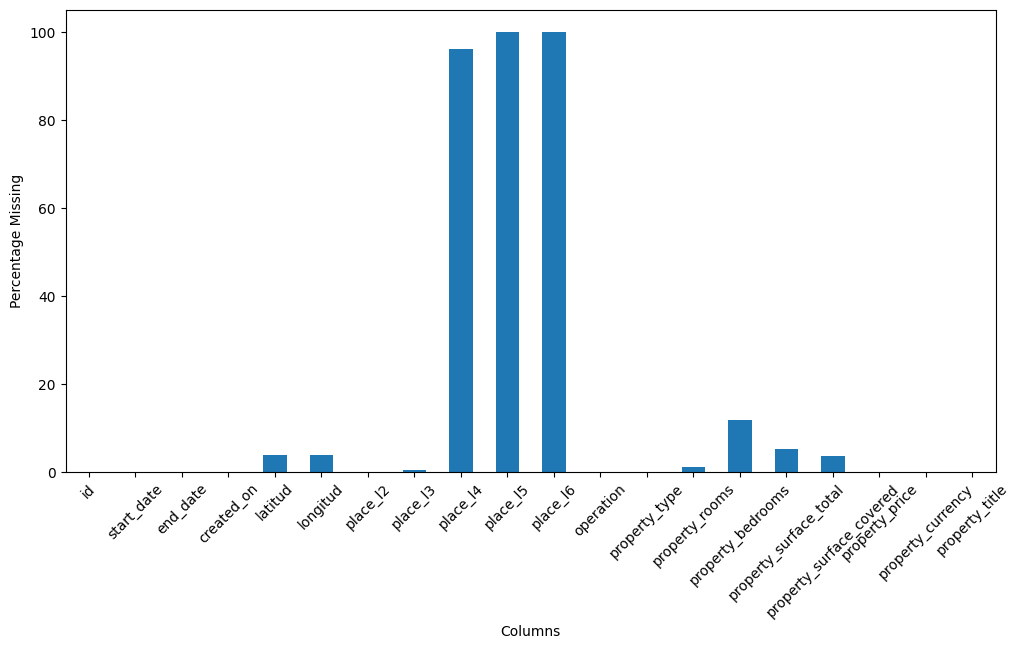

In [43]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

A simple vista podemos ver que las columnas place_l4,place_l5 y place_l6 practicamente no tienen datos, procederemos a eliminarlas.

### Porcentaje de datos faltantes por fila

<AxesSubplot: >

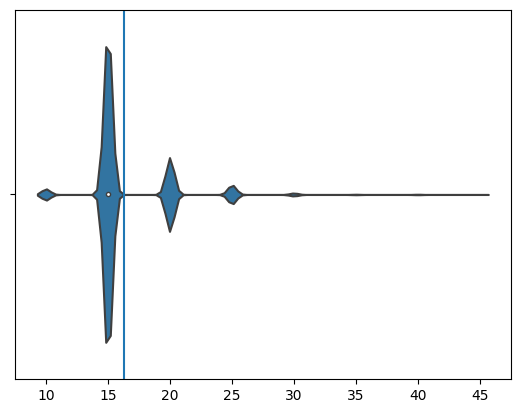

In [44]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

Analizaremos nuevamente el porcentaje por fila luego de trabajar con las columnas

### Procesado de columnas

Descartaremos la columna id debido a que no es relevante para nuestro análisis. No podemos usar un dato uníco porque no representa ninguna característica relevante.

In [45]:
ds_train['id'].head()

432209    FKIxy8qbdHC9mBdr87cwkg==
142141    p+EpLalshuc9JY0aQKDiNw==
181613    hZNkZze0dYz3AvIMj7S2lw==
194510    hInPSiHerbiDxcTYA9WXCA==
327682    j36OUp15ZaR9LaxdMRfqtg==
Name: id, dtype: object

Como mencionamos anteriormente, evaluaremos descartar place_l4 por la cantidad de valores faltantes que hay.

In [46]:
ds_train['place_l4'].value_counts()

Palermo Hollywood    1256
Palermo Chico         855
Palermo Soho          628
Palermo Viejo         147
Name: place_l4, dtype: int64

In [47]:
ds_train['place_l2'].value_counts()

Capital Federal    75399
Name: place_l2, dtype: int64

In [48]:
ds_train['property_currency'].value_counts()

USD    75399
Name: property_currency, dtype: int64

In [49]:
ds_train['operation'].value_counts()

Venta    75399
Name: operation, dtype: int64

Como place_l4 tiene pocas observaciones y todas corresponden al barrio de Palermo, descartaremos esta columna.
Además, como mencionamos más arriba, la columna created_on siempre es igual a la columna start_date, por lo que también la descartaremos.
Por otro lado, como filtramos solo las propiedades de CABA eliminaremos la columna place_l2 ya que tiene un único valor. Por el mismo motivo eliminaremos la columna property_currency y la columna property_operation.

In [50]:
row_missing_data = ds_train.T.isna().sum() * 100 / column_count
row_missing_data.value_counts()

15.0    56917
20.0    12585
25.0     3272
10.0     1930
30.0      517
40.0       89
35.0       88
45.0        1
dtype: int64

In [51]:
dataset_perc = row_missing_data.value_counts() * 100 / ds_train.shape[0]
print(f"La cantidad de faltantes segun porcentaje representan\n{dataset_perc}")

La cantidad de faltantes segun porcentaje representan
15.0    75.487739
20.0    16.691203
25.0     4.339580
10.0     2.559716
30.0     0.685685
40.0     0.118039
35.0     0.116712
45.0     0.001326
dtype: float64


Ahora que elegimos las columnas deseadas, veremos nuevamente los porcentajes por columna para preparar algunas imputaciones

In [52]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.878036
longitud                      3.878036
place_l2                      0.000000
place_l3                      0.462871
place_l4                     96.172363
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.127336
property_bedrooms            11.757450
property_surface_total        5.108821
property_surface_covered      3.547792
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


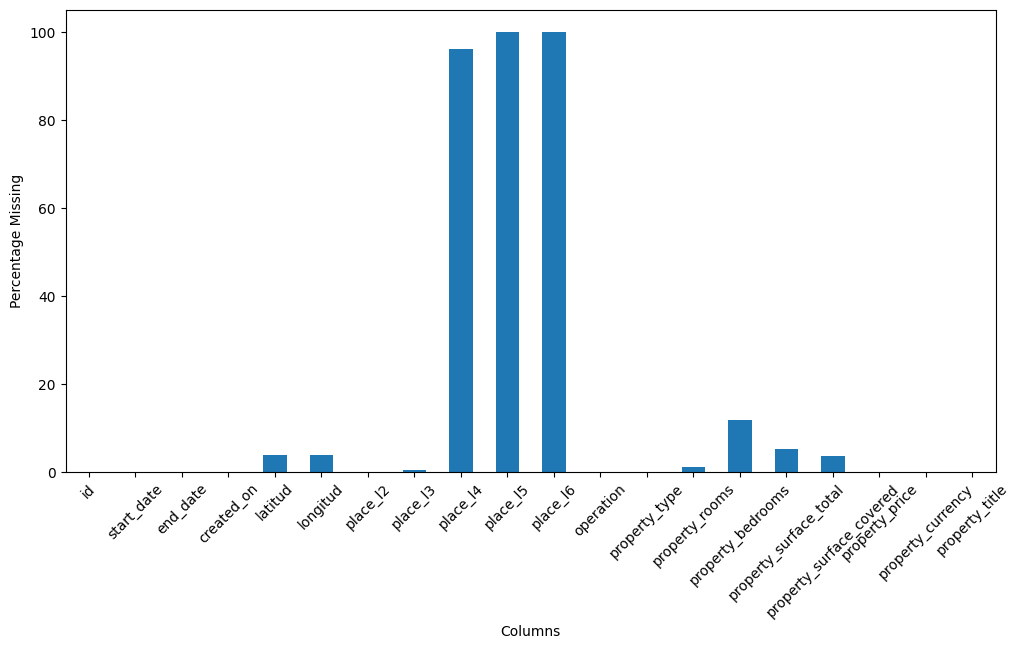

In [53]:
plot_missing_by_column(ds_train)

Eliminaremos las columnas mencionadas anteriormente. Luego, haremos algunas imputaciones sobre los datos faltantes para reparar algunos.


In [54]:
## Train

ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
              inplace=True, axis=1)

## Test
ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
             inplace=True, axis=1)

## Reparacion de datos faltantes

Ahora analizaremos columna a columna como podemos reparar esos datos.

### Pre Imputacion de latitud y longitud

latitud    3.878036
dtype: float64


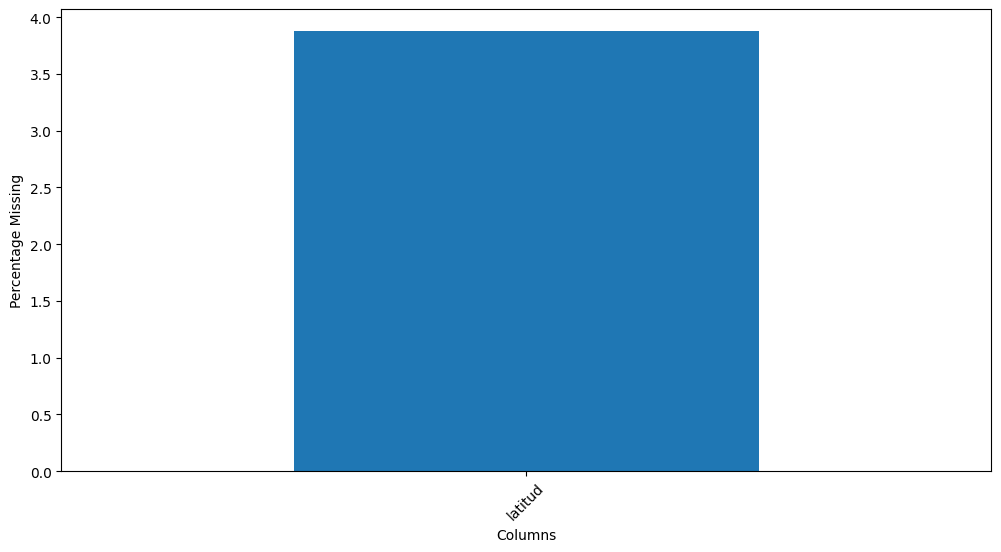

In [55]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.878036
dtype: float64


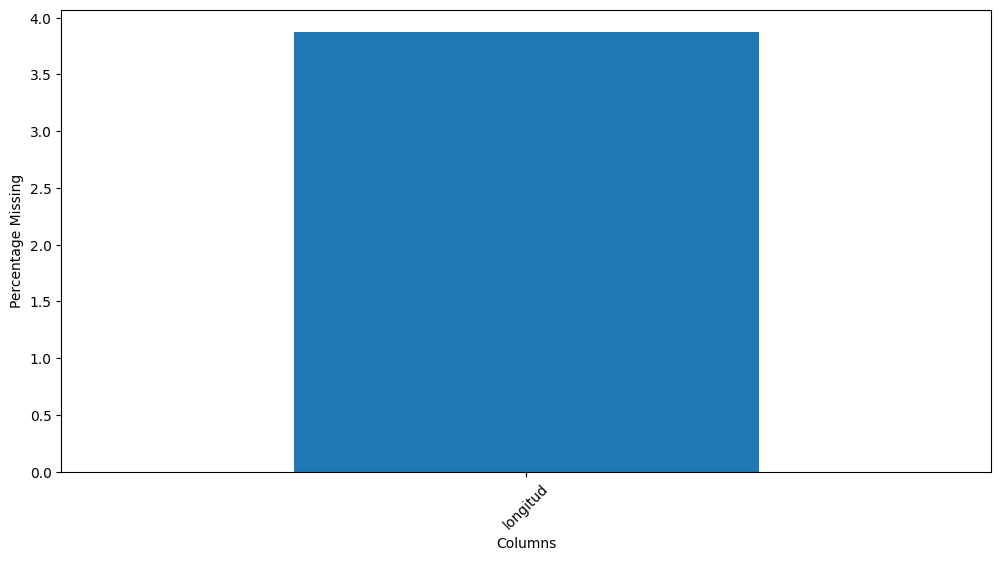

In [56]:
plot_missing_by_column(ds_train[['longitud']])

Vemos que de las coordenadas faltantes, siempre que falta una falta la otra también. No hay casos donde solo falte 1 de las 2 coordenadas.

In [57]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [58]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [59]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.822%
Los datos faltantes en la columna place_l3 para test representan el 3.598%


Para reconstruir los datos faltantes nos vamos a basar en el barrio marcado por 'place_l3' calculando la latitud y longitud media de cada uno y asignarle esos datos.

In [60]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

Vemos que los datos restantes ahora mismo son aquellos que tampoco tienen asignado un barrio. Dichos datos son irreparables, ya que no tenemos ninguna información respecto a la ubicación.

In [61]:
ds_train[ds_train.latitud.isna()]

id start_date                      end_date  \
251806  tC1oqOOm/XEraWtI3riChA== 2021-06-18 2021-06-18 00:00:00.000000000   
378461  PZA/i+ktmeRpM25oDPqW5Q== 2021-05-19 2021-11-04 00:00:00.000000000   
71492   Ur3JttwFZloGubSEDsarDg== 2021-10-18 2021-12-31 17:13:55.769257728   
84681   FDP0I8rP+WzTtwUj4Gc2iQ== 2021-03-26 2021-04-13 00:00:00.000000000   
6699    v+sxjFL/W8jKIb6kZ/utHQ== 2021-02-09 2021-06-05 00:00:00.000000000   
...                          ...        ...                           ...   
154305  fHbS9F2VO0veJsrs92H+aA== 2021-02-03 2021-11-04 00:00:00.000000000   
93803   MbzcuMKtbLgu0MSLdMv8gw== 2021-09-24 2021-11-04 00:00:00.000000000   
101428  gF45Up7vyzAOFVs11JkikQ== 2021-05-28 2021-06-05 00:00:00.000000000   
161811  OBEJUlZ0HWzDeQOdVfUQ5g== 2021-10-07 2022-02-17 00:00:00.000000000   
163803  nc0ntMQxgHruhBOAOk3AIg== 2021-06-07 2022-01-30 00:00:00.000000000   

        latitud  longitud place_l3 property_type  property_rooms  \
251806      NaN       NaN      NaN          Casa             5.0   
378461      NaN       NaN      NaN            PH             4.0   
71492       NaN       NaN      NaN  Departamento             NaN   
84681       NaN       NaN      NaN  Departamento             3.0   
6699        NaN       NaN      NaN          Casa             NaN   
...         ...       ...      ...           ...             ...   
154305      NaN       NaN      NaN  Departamento             1.0   
93803       NaN       NaN      NaN  Departamento             1.0   
101428      NaN       NaN      NaN          Casa             NaN   
161811      NaN       NaN      NaN  Departamento             2.0   
163803      NaN       NaN      NaN  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
251806                4.0                   160.0                     150.0   
378461                NaN                   170.0                     185.0   
71492                 NaN                    26.0                       NaN   
84681                 2.0                    87.0                      87.0   
6699                  3.0                     NaN                     390.0   
...                   ...                     ...                       ...   
154305                NaN                     NaN                      32.0   
93803                 NaN                     NaN                      36.0   
101428                2.0                    80.0                      80.0   
161811                1.0                    39.0                      39.0   
163803                NaN                    29.0                      29.0   

        property_price                                     property_title  
251806        210000.0        Casa con excelente vista en Costa Esmeralda  
378461        180000.0        PH en Venta Caba / Buenos Aires (D038 1541)  
71492          85000.0                         Departamento - Microcentro  
84681         120000.0  3 Ambientes amplios, 88 m2, con 2 baños, prox ...  
6699          795000.0  Magnífica casa a la venta de 7 ambientes en Ab...  
...                ...                                                ...  
154305         82000.0  Departamento en Venta CABA / Buenos Aires (D03...  
93803          65000.0  Departamento en Venta Caba / Buenos Aires (D03...  
101428        116780.0                    VENTA DEPARTAMENTO 2 DORMITORIO  
161811         55000.0  25 DE MAYO AL 700 - APTO PROF LUMIN OPCION COC...  
163803         63500.0                         Departamento - Microcentro  

[141 rows x 13 columns]

In [62]:
ds_test[ds_test.latitud.isna()]

id start_date end_date  latitud  longitud  \
214731  eznwOHdDYqYAdOfh8ANvBA==        NaT      NaT      NaN       NaN   
336741  9axBqXrySzGV8sAeS4cLtQ==        NaT      NaT      NaN       NaN   
435764  6xJbFM++5tur6sP49ajkvQ==        NaT      NaT      NaN       NaN   
308980  yHH+c/hrvj+80CmVIyH+iw==        NaT      NaT      NaN       NaN   
151051  NWbXB0gPxuUNRgXVhs8sKw==        NaT      NaT      NaN       NaN   
44423   oGPgLc4InEc+5rOhp+H7PA==        NaT      NaT      NaN       NaN   
343265  ivCufxbxoTGNCsW8IF72Iw==        NaT      NaT      NaN       NaN   
313804  +pYkycxlnUpcKI6YfV68KQ==        NaT      NaT      NaN       NaN   
348183  pM5dQ2VTfrThYBFjlnY15g==        NaT      NaT      NaN       NaN   
63593   MDq7beRRDhnnexPlizndeg==        NaT      NaT      NaN       NaN   
223287  ANBlWDLQarFIoRKCdED4SQ==        NaT      NaT      NaN       NaN   
97663   HUUW8qvm+2F/1vreTVjp8Q==        NaT      NaT      NaN       NaN   
163810  hhXFb7aU9UN5WLlJvrwnDA==        NaT      NaT      NaN       NaN   
174963  vgbuVMz0jlwMTJyFqSnhUw==        NaT      NaT      NaN       NaN   
309867  2oiyp4YLGap4pyz/JrKC3A==        NaT      NaT      NaN       NaN   
441481  HaLzJ47x5J7a+LN0if6Jug==        NaT      NaT      NaN       NaN   
265486  V+xQjMt4j6nVAVIPD0Gyiw==        NaT      NaT      NaN       NaN   
459195  E8hNlBjeRdD9Cr759qVghQ==        NaT      NaT      NaN       NaN   
441455  MQMDesdhkobsc2Dz5D5AZQ==        NaT      NaT      NaN       NaN   
31871   BKX/oZw0f3iowrtswwdbMA==        NaT      NaT      NaN       NaN   
314306  bFGH2U1OERyQvUia3CD5gg==        NaT      NaT      NaN       NaN   
120615  W15IVdCCvZ80j38hC7Y4Dw==        NaT      NaT      NaN       NaN   
379289  3L7hKIhb/QHLqfMAXRNisQ==        NaT      NaT      NaN       NaN   
143131  9cu1TD3T7CoEkAwoeSnCXw==        NaT      NaT      NaN       NaN   
346564  aJ+TIfF6ee30ip5+ik0Upw==        NaT      NaT      NaN       NaN   
161821  feYEI/oWbl3KuB6cR9ouJQ==        NaT      NaT      NaN       NaN   
180567  VeUeVZzvn6CG1admtOWObg==        NaT      NaT      NaN       NaN   
358077  wmC/iDXdmQtR4vYq4kzdvQ==        NaT      NaT      NaN       NaN   
218048  vRA/0y8xkAUweY9h1T7EzA==        NaT      NaT      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
214731      NaN          Casa             NaN                3.0   
336741      NaN  Departamento             3.0                2.0   
435764      NaN  Departamento             3.0                NaN   
308980      NaN          Casa             NaN                6.0   
151051      NaN          Casa             4.0                NaN   
44423       NaN            PH             2.0                NaN   
343265      NaN  Departamento             7.0                2.0   
313804      NaN          Casa             6.0                NaN   
348183      NaN  Departamento             4.0                3.0   
63593       NaN  Departamento             1.0                NaN   
223287      NaN  Departamento             3.0                NaN   
97663       NaN  Departamento             4.0                3.0   
163810      NaN  Departamento             2.0                1.0   
174963      NaN          Casa             4.0                3.0   
309867      NaN  Departamento             2.0                NaN   
441481      NaN  Departamento             2.0                2.0   
265486      NaN  Departamento             6.0                3.0   
459195      NaN  Departamento             2.0                1.0   
441455      NaN  Departamento             2.0                1.0   
31871       NaN  Departamento             NaN                2.0   
314306      NaN  Departamento             2.0                NaN   
120615      NaN  Departamento             3.0                2.0   
379289      NaN  Departamento             3.0                NaN   
143131      NaN  Departamento             1.0                NaN   
346564      NaN          Casa             4.0                3.0   
161821     

In [63]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0019%
El porcentaje de valores a eliminar en test corresponden a un 0.0015%


In [64]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

### Post Imputacion de latitud y longitud

latitud    0.0
dtype: float64


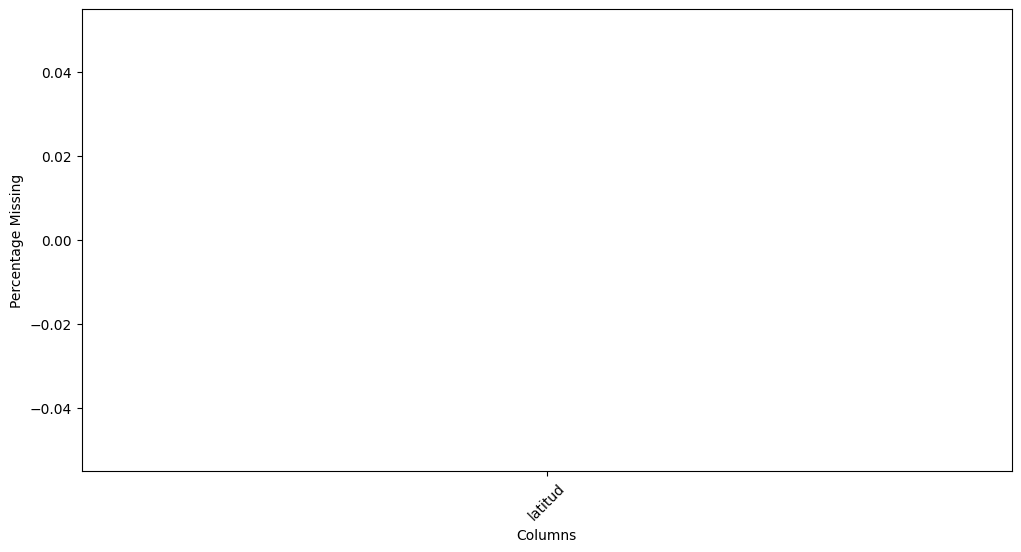

In [65]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


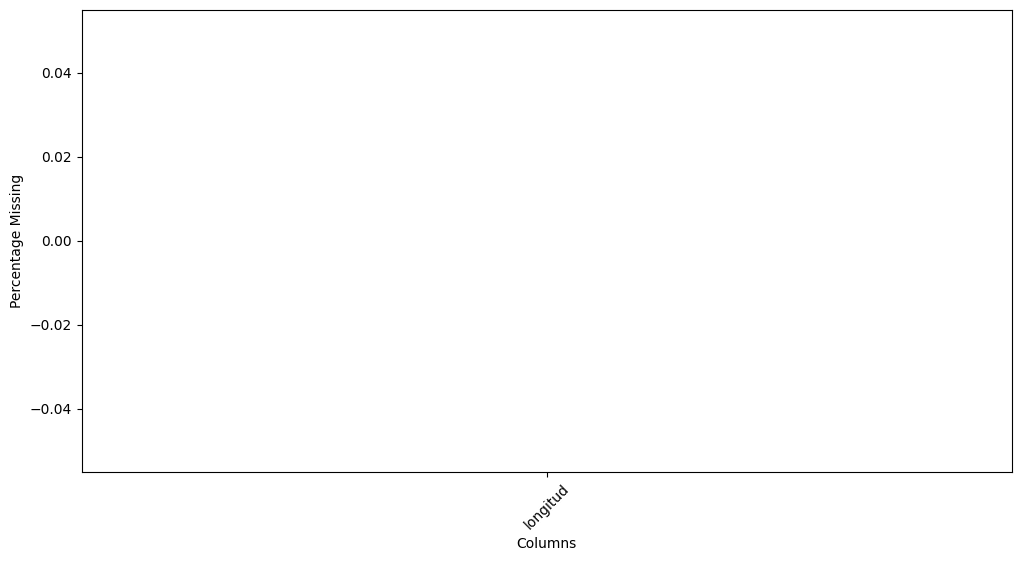

In [66]:
plot_missing_by_column(ds_train[['longitud']])

### Pre imputación de ambientes

property_rooms    1.0949
dtype: float64


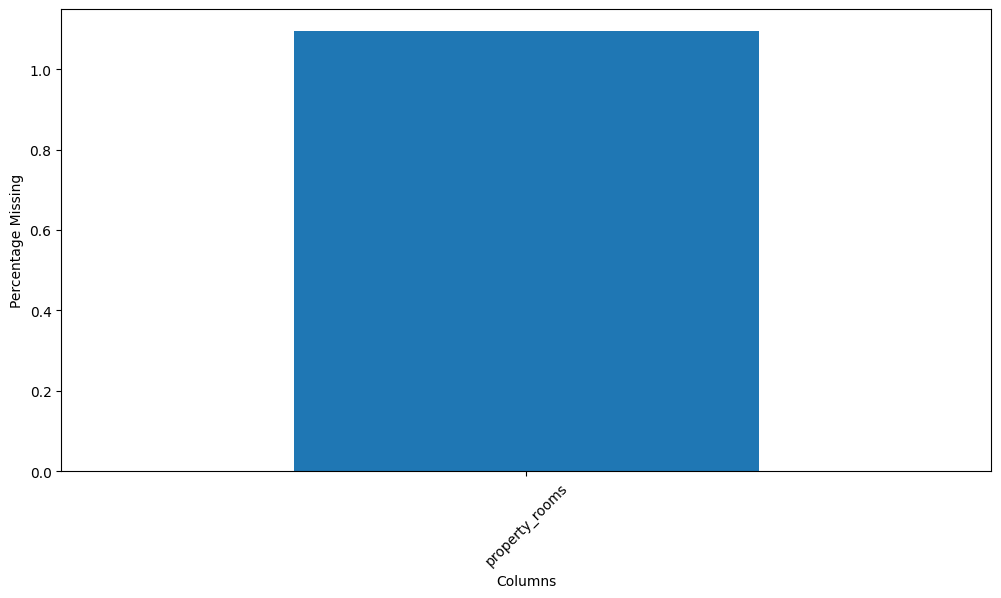

In [67]:
plot_missing_by_column(ds_train[['property_rooms']])

#### Reparacion de ambientes faltantes en base al titulo de la propiedad

In [68]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")


In [69]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 824
cantidad de ambientes faltantes post reparacion: 655
cantidad inicial de ambientes a reparar: 190
cantidad de ambientes faltantes post reparacion: 183


### Post Imputacion de ambientes

property_rooms    0.870339
dtype: float64


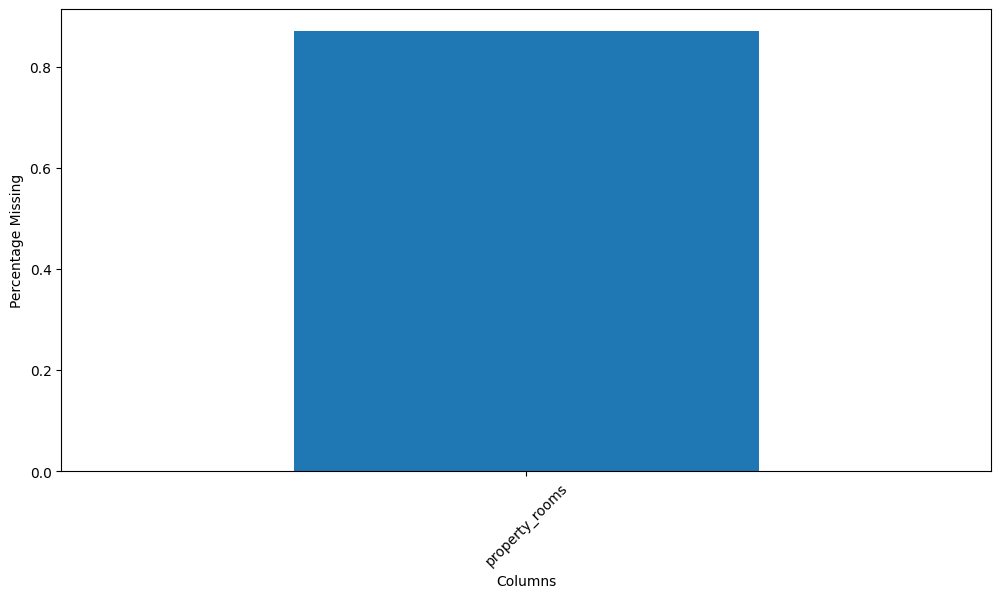

In [70]:
plot_missing_by_column(ds_train[['property_rooms']])

Como las que quedan sin datos son pocas observaciones, las eliminaremos

In [71]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


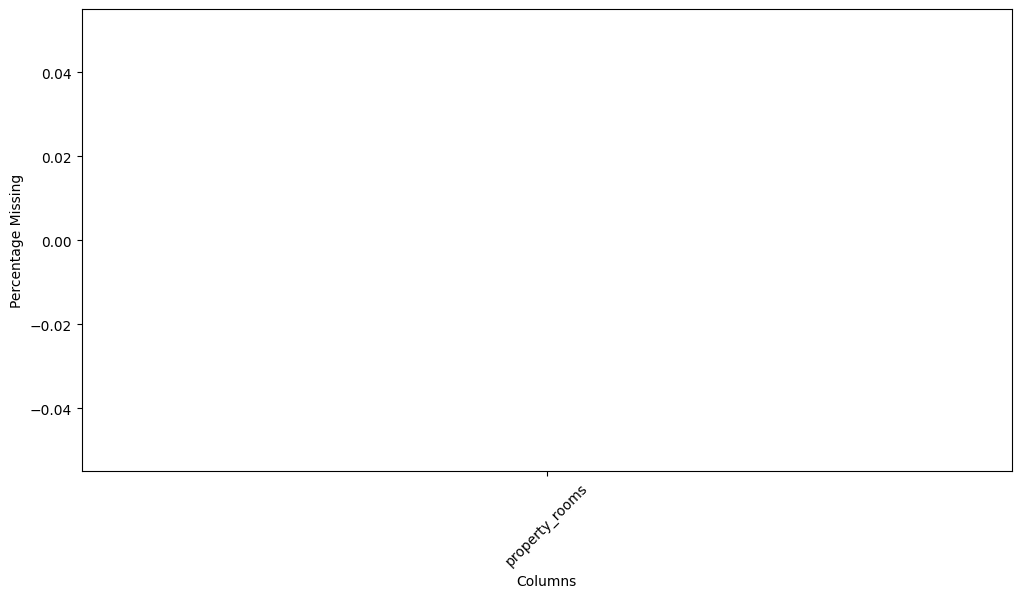

In [72]:
plot_missing_by_column(ds_train[['property_rooms']])

### Pre Imputacion de Habitaciones

property_bedrooms    11.392303
dtype: float64


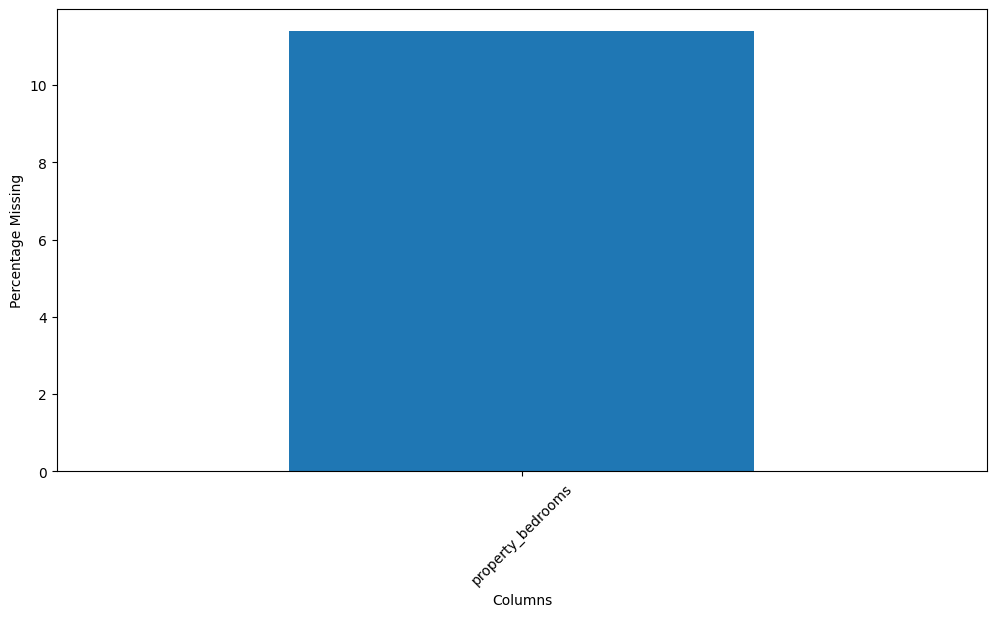

In [73]:
plot_missing_by_column(ds_train[['property_bedrooms']])

#### Reparacion de habitaciones faltantes en base a los ambientes

In [74]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas



El total de habitaciones en train es: 74603
El total de habitaciones invalidas es: 136. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18638
El total de habitaciones invalidas es: 27. Constituye al 0% de los datos del ds


id start_date end_date    latitud   longitud  \
41088   ngtAPqtsUhn8Y9+r/FgteA==        NaT      NaT -34.614573 -58.480650   
86014   pVG9sES9De/1eQ+tB90NjQ==        NaT      NaT -34.591110 -58.400685   
385580  48pQafgstnUSZLKK3E9u7A==        NaT      NaT -34.562518 -58.453855   
345928  YtZ92HeeTOj5vzYY05L7Cw==        NaT      NaT -34.577375 -58.413314   
399074  DS1iUNdl57jXeTtnrfNcow==        NaT      NaT -34.626357 -58.509107   
389699  /D5DqZYM2nZ/7R9a/Ty+Gw==        NaT      NaT -34.606923 -58.404533   
54021   hGQM/Ul+C0II9otOEBQnsA==        NaT      NaT -34.605454 -58.506832   
127231  wn7j0YSM4rEE0Tfl6S2lIQ==        NaT      NaT -34.618449 -58.505422   
115493  SdoETVOxVCpxrVP02+fxOA==        NaT      NaT -34.612641 -58.362758   
48332   /VjUSHWTdfV9lkqkj+SFvA==        NaT      NaT -34.613200 -58.471100   
148314  829VJfEw24JZQ8js/z/eGQ==        NaT      NaT -34.622874 -58.397855   
366821  4GyOVwbzH4+nOXZbkPwZKA==        NaT      NaT -34.621096 -58.431777   
48279   r3sXlEIiCgBG5TtUkN93mw==        NaT      NaT -34.608645 -58.485619   
24686   C3bkeU7dwuSasjU+dZfciw==        NaT      NaT -34.596455 -58.507433   
451218  7krE2YAxkwyebVtlLkuFcA==        NaT      NaT -34.557917 -58.459907   
274570  VBHHqooTIdGIODHk3X70og==        NaT      NaT -34.573022 -58.419735   
323765  axwZ6U4+1RIdVT+eKpht9w==        NaT      NaT -34.605374 -58.365343   
361800  U1B7lvnYtd4L18Ccb8mvhw==        NaT      NaT -34.580210 -58.412815   
204154  v4jFEcUT4A4X1EMIs8Nqjw==        NaT      NaT -34.591401 -58.378142   
49960   O/JMW/VVo7OmWF7SkXtBuA==        NaT      NaT -34.630186 -58.389156   
27849   indoHQClfn3r0gDuKdqgLQ==        NaT      NaT -34.592121 -58.401069   
115486  CQUUgcuoGUo3j/loc2+HGA==        NaT      NaT -34.613261 -58.361513   
2516    uKy3ZC5YQ9kPZ1ztj7CKjw==        NaT      NaT -34.557573 -58.459926   
13814   TnCilO6Upsd/m6vIdWSOLA==        NaT      NaT -34.594361 -58.382751   
337147  UVuiurLBb+DzTf73JSOI4g==        NaT      NaT -34.607511 -58.421824   
432156  bNrkEmRn2xrrFxVfXkhZ3A==        NaT      NaT -34.650316 -58.481964   
340427  uP+f4jupr3E/oT2T1TNTkg==        NaT      NaT -34.621660 -58.381734   

                   place_l3 property_type  property_rooms  property_bedrooms  \
41088      Villa del Parque  Departamento             2.0               11.0   
86014              Recoleta  Departamento             4.0               30.0   
385580             Belgrano  Departamento             4.0                6.0   
345928              Palermo  Departamento             5.0                6.0   
399074            Versalles  Departamento             1.0                2.0   
389699                 Once  Departamento             1.0                2.0   
54021          Villa Devoto  Departamento             4.0                5.0   
127231         Monte Castro  Departamento             1.0                2.0   
115493        Puerto Madero  Departamento             4.0                6.0   
48332   Villa General Mitre            PH             3.0                4.0   
148314        San Cristobal            PH             1.0                4.0   
366821            Caballito  Departamento             3.0                4.0   
48279      Villa del Parque  Departamento             4.0               32.0   
24686          Villa Devoto  Departamento             1.0                2.0   
451218             Belgrano  Departamento             1.0                2.0   
274570              Palermo  Departamento             5.0                6.0   
323765            San Telmo  Departamento             1.0                2.0   
361800              Palermo  Departamento             1.0                2.0   
204154             Recoleta  Departamento             3.0                4.0   
49960      Parque Patricios  Departamento             1.0               32.0   
27849              Recoleta  Departamento             2.0               10.0   
115486        Puerto Madero  Departamento             3.0                4.0   
2516 

Si tomamos en cuenta que 128 (train) y 35 (test) de los valores (0% aproximado) tienen mas habitaciones que ambientes, podriamos pensar en imputar los datos faltantes elimanando estas filas y haciendo que los valores que sean NAN, ahora sean habitaciones = ambientes - 1

In [75]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55709. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13982. Constituyen al 75% de los datos


Las habitaciones que son Ambientes - 1 son: 55797. Constituyen al 74% de los datos. Como notamos que es un valor muy representativo del dataset, optamos por imputar los datos faltantes como mencionamos antes, es decir, los ambientes que no esten vacios y que tengan habitaciones vacias, ahora tendran habitaciones = ambientes -1.

In [76]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8499
Valor inicial de habitaciones faltantes en el ds de test: 2027


In [77]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [78]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

### Post Imputacion de habitaciones

property_bedrooms    0.0
dtype: float64


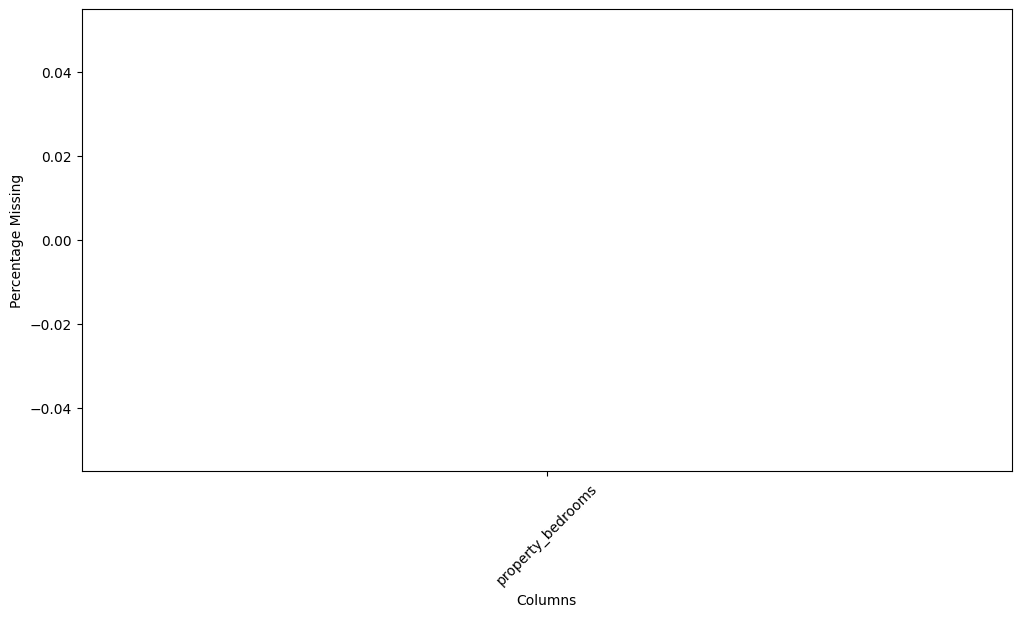

In [79]:
plot_missing_by_column(ds_train[['property_bedrooms']])

### Pre Imputación de Superficie total

property_surface_total    4.893905
dtype: float64


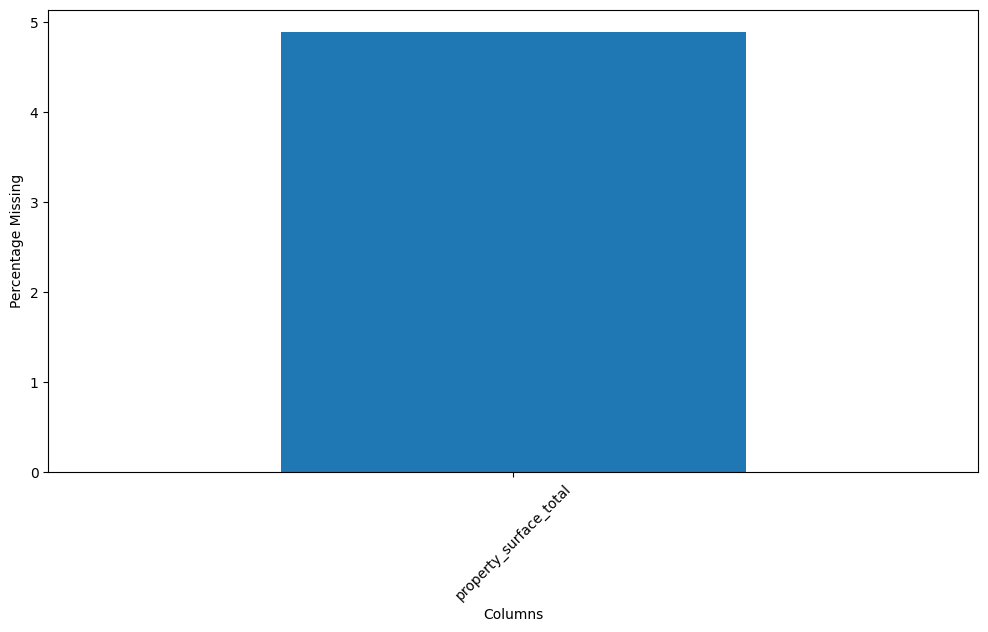

In [80]:
plot_missing_by_column(ds_train[['property_surface_total']])

Como a simple vista muchos registros tienen superficie cubierta, veremos en cuantos faltan ambos datos

In [81]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

#### Reparación de datos faltantes en superficie cubierta

Como todos los datos tienen la superficie cubierta, repararemos estos datos tomando ese valor como superficie total

In [82]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

### Post Imputación de Superficie total

property_surface_total    0.0
dtype: float64


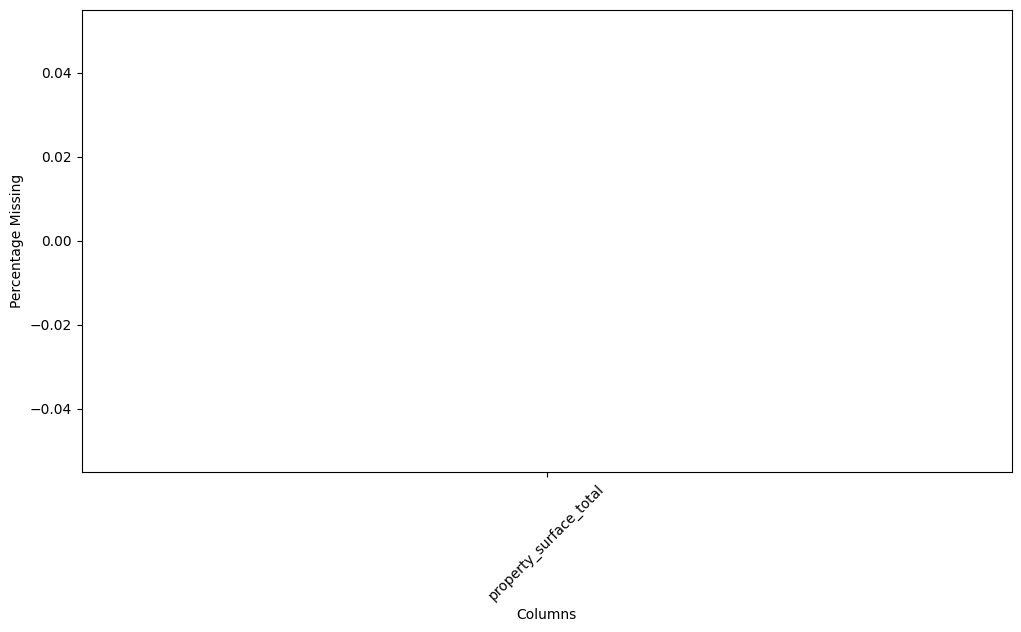

In [83]:
plot_missing_by_column(ds_train[['property_surface_total']])

### Pre Imputación de superficie cubierta

In [84]:
ds_train[ds_train.property_surface_covered.isna()]

id start_date                      end_date  \
162073  NPYdaf8EYuBg99m3hii2mg== 2021-10-07 2021-11-13 00:00:00.000000000   
257621  adeTyh1GMmmHNvjWL1qnrw== 2021-11-03 2022-01-27 00:00:00.000000000   
324327  /T62erRGJYwwPbAN9kCkjg== 2021-03-03 2021-06-05 00:00:00.000000000   
167703  cVw7xc+vTOTigorQ6eXmmg== 2021-04-30 2021-06-05 00:00:00.000000000   
384514  6cmiUnsZPS51fDJagipX3w== 2021-09-06 2022-01-27 00:00:00.000000000   
...                          ...        ...                           ...   
184209  fhI6Goe5GBKCxn0ZCDfsHw== 2021-05-23 2021-08-05 17:13:55.769257728   
388872  UANOY/S0CQ3M6pIZS8O3Fw== 2021-10-12 2021-12-25 17:13:55.769257728   
263228  69a1eBeCjjcoH44+jamXTA== 2021-02-26 2021-05-11 17:13:55.769257728   
53400   rn5a6SbSAf0jIQKEfa+fBA== 2021-09-22 2022-03-09 00:00:00.000000000   
262179  odDvVfE56fqn4JY6D+hYjg== 2021-11-06 2022-01-19 17:13:55.769257728   

          latitud   longitud          place_l3 property_type  property_rooms  \
162073 -34.583473 -58.433905           Palermo  Departamento             2.0   
257621 -34.576814 -58.465850        Colegiales  Departamento             5.0   
324327 -34.555616 -58.456728          Belgrano  Departamento             3.0   
167703 -34.560890 -58.452093          Belgrano  Departamento             5.0   
384514 -34.617273 -58.434544         Caballito  Departamento             5.0   
...           ...        ...               ...           ...             ...   
184209 -34.589990 -58.497083  Villa Pueyrredón  Departamento             3.0   
388872 -34.578025 -58.497501     Villa Urquiza  Departamento             1.0   
263228 -34.668021 -58.504543         Mataderos          Casa             1.0   
53400  -34.553492 -58.460979             Nuñez  Departamento             2.0   
262179 -34.591961 -58.392271          Recoleta  Departamento             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
162073                1.0                    67.0                       NaN   
257621                4.0                   300.0                       NaN   
324327                2.0                    72.0                       NaN   
167703                4.0                   193.0                       NaN   
384514                4.0                   172.0                       NaN   
...                   ...                     ...                       ...   
184209                2.0                    85.0                       NaN   
388872                1.0                    34.0                       NaN   
263228                1.0                   200.0                       NaN   
53400                 1.0                    52.0                       NaN   
262179                4.0                   185.0                       NaN   

        property_price                                     property_title  
162073        188760.0  Venta - Departamento - Palermo Hollywood - 2 a...  
257621        850000.0  Piso de categoria hecho a nuevo en pleno Belgr...  
324327        250000.0  3  Ambientes con cochera en el barrio de Belgr...  
167703        560000.0  Depto en torre de categoria - Hermoso 5 amb 19...  
384514        349000.0  Departamento - Venta- Caballito. Vista abierta...  
...                ...                                                ...  
184209        220000.0                                 Departamento venta  
388872         62000.0  MONOAMBIENTES EN POZO DESDE U$S 62.000 VILLA U...  
263228        220000.0                                         Casa venta  
53400         150000.0                               Departamento - Nuñez  
262179        495000.0                            Departamento - Recoleta  

[2603 rows x 13 columns]

property_surface_covered    3.489136
dtype: float64


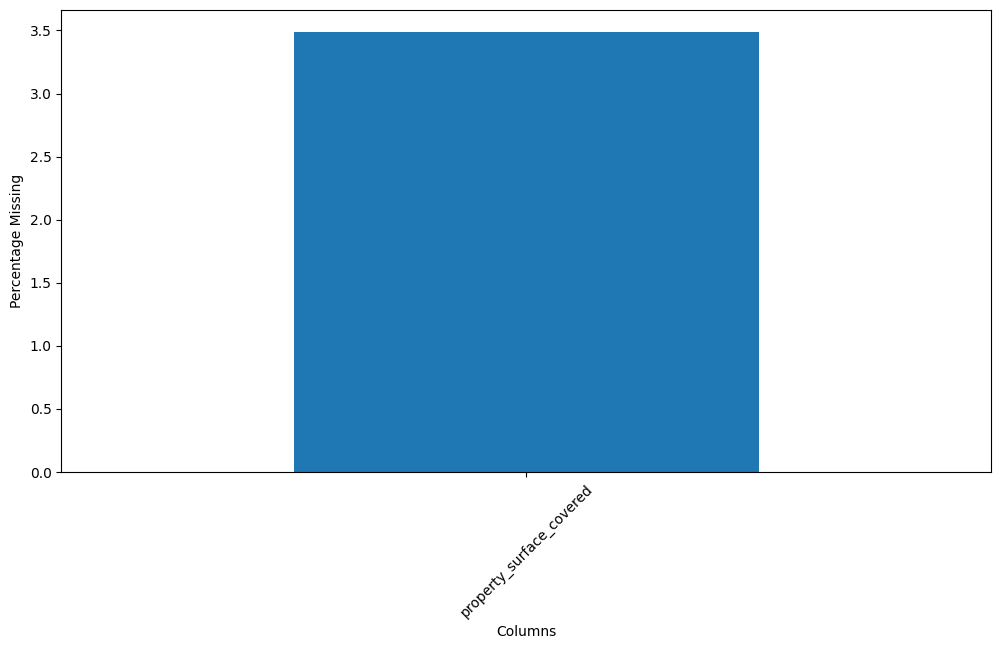

In [85]:
plot_missing_by_column(ds_train[['property_surface_covered']])

##### Reparación de datos faltantes en Superficie cubierta

Como tenemos 2672 registros nulos para la superficie cubierta, imputaremos de la misma forma los registros que son Departamentos porque su superficie total suele ser muy cercana a la cubierta

In [86]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2336
PH               185
Casa              82
Name: property_type, dtype: int64

In [87]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [88]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 267


In [89]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 662


Los 262 registros restantes de train los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

Los 651 registros restantes de test tambien los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

In [90]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

Volvemos a evaluar el porcentaje de datos faltantes

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.224656
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


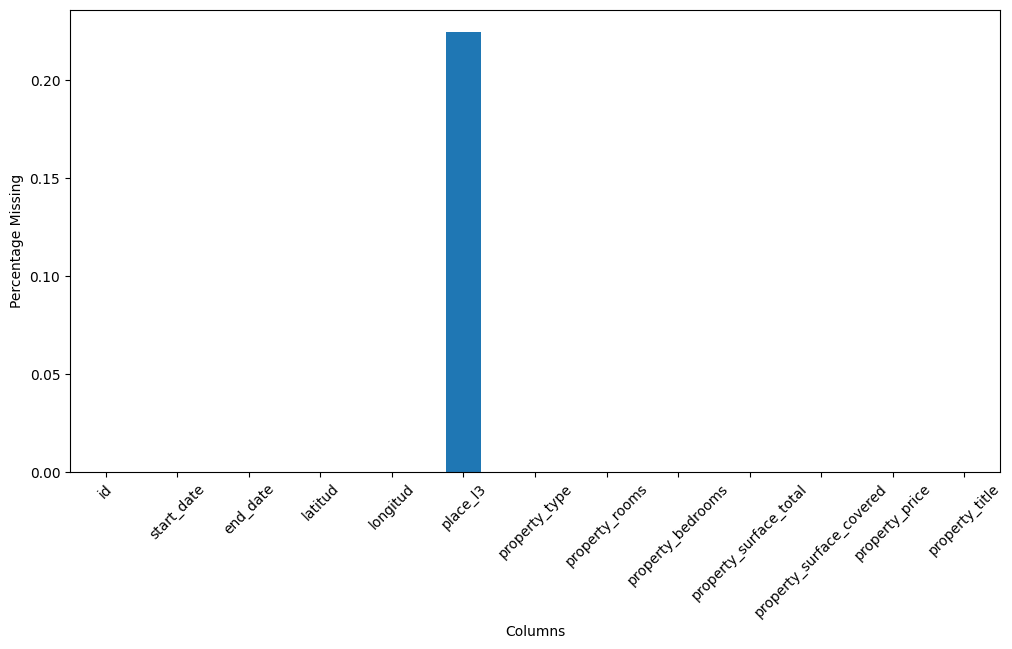

In [91]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

## Grafico de los barrios de CABA

In [92]:
# Proceso el archivo de los barrios de CABA
barrios = gpd.read_file('./barrios.geojson')
barrios.head()

NameError: name 'gpd' is not defined

In [ ]:
# Realizo el grafico de los barrios de CABA
fig, ax = plt.subplots(figsize=(8, 10))
barrios.plot(column='BARRIO', categorical=True, legend=True, ax=ax, cmap='tab20b')

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.4, 1.2))

ax.set(title='Barrios CABA')
plt.show()

## Analisis de Valores Atipicos

### Univariados

#### Metodo IQR

In [93]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()


In [94]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max

In [95]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

##### Ambientes

cantidad de datos del ds: 74336
outliers encontrados para los property_rooms: 1169
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


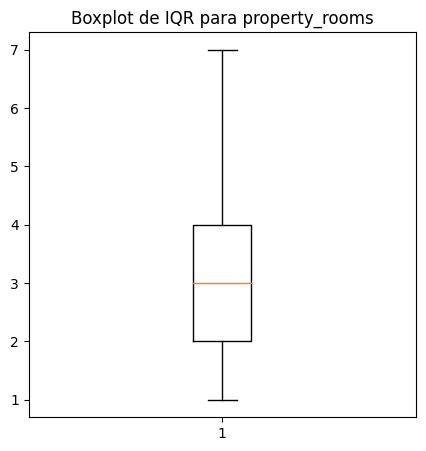

In [96]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

Tomaremos 7 como límite superior y 0 como límite inferior ya que no tiene sentido que haya cantidad de habitaciones negativas.

In [97]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")



Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 582. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 146. Constituyen al 0% de los datos


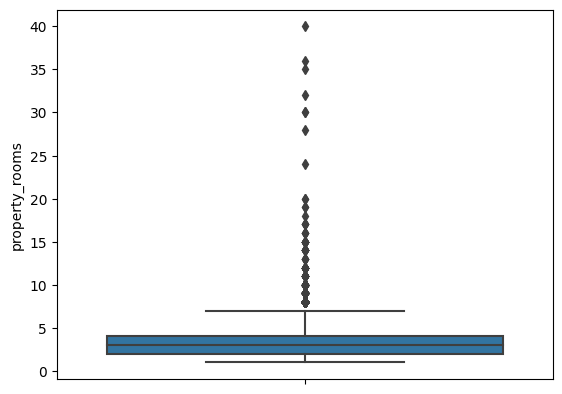

In [98]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Eliminamos los ambientes que son > 7 ya que rompen la media y representan solamente a un porcentaje minúsculo del dataset (1% sobre el 100% del ds).

In [99]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


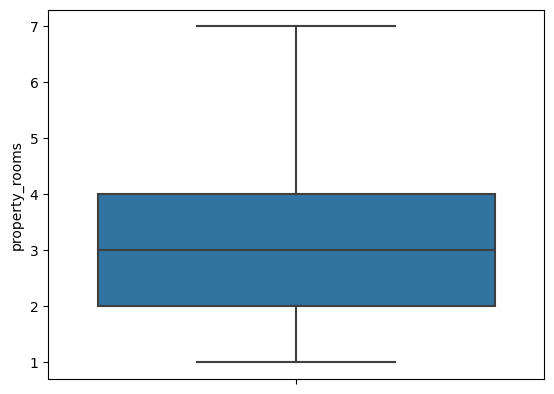

In [100]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Habitaciones

Moderated outliers limits [min: -0.5,max: 3.5]
Severe outliers limits [min: -2.0,max: 5.0]


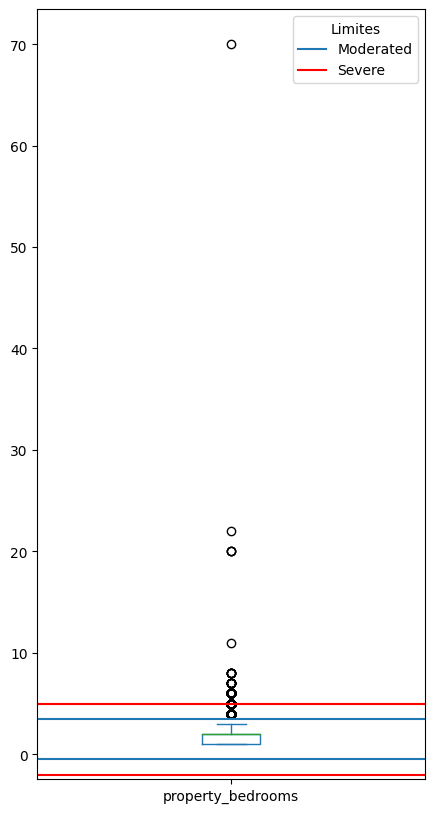

In [101]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73754
outliers encontrados para los property_bedrooms: 4299
hay 5% de outliers de property_bedrooms sobre el ds
limit sup: 3.5, limite inf: -0.5


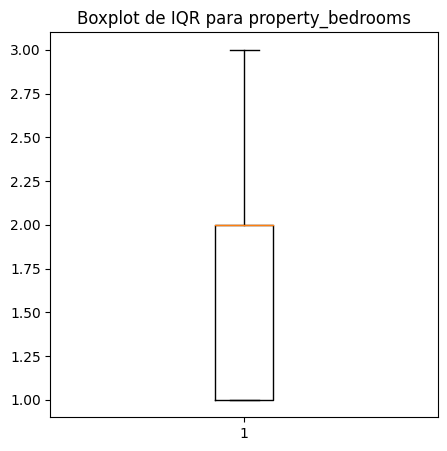

In [102]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [103]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")


Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 26. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 8. Constituyen al 0% de los datos


###### Eliminaremos una observacion en particular que fue detectada como outlier ya que dice tener -1 habitaciones. Este valor no tiene ningun sentido logico en nuestro domino de problema.


In [104]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en train
filas a eliminar:                               id start_date end_date    latitud   longitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg==        NaT      NaT -34.577595 -58.495185   

             place_l3 property_type  property_rooms  property_bedrooms  \
406880  Villa Urquiza  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en test


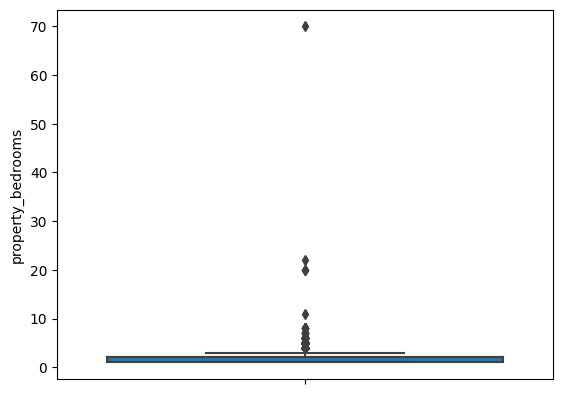

In [105]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

###### Cuando analizamos los valores atipicos detectados notamos que algunas observaciones eran mayores a los ambientes, esto no es posible en nuestro dominio de problema. Por ende, procederemos a eliminarlos. Podemos hacer esto ya que estos valores representan un valor minusculo del dataset.

In [106]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_bedrooms])}")

Ejemplos: 


14

In [107]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 26 registros en train
Se han eliminado: 8 registros en test


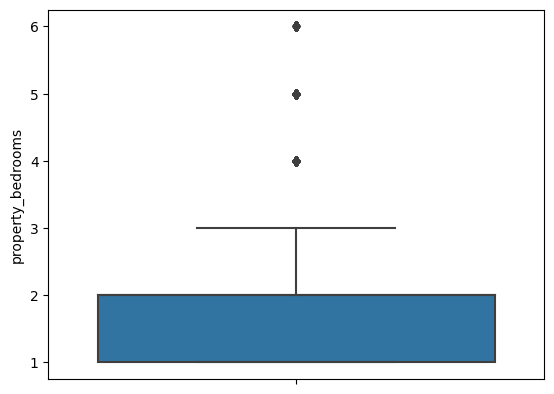

In [108]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

##### Superficie Total

cantidad de datos del ds: 73728
outliers encontrados para los property_surface_total: 5874
hay 7% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


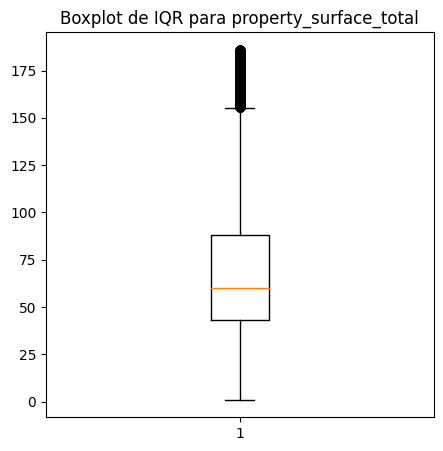

In [109]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

Elegimos tomar como outlier a viviendas que tengan una superifice menor a 18 ya que, en base a los documentos que leimos, este es el minimo necesario para que una persona viva en una vivienda. 18 m2 minimo. Observar los links adjuntos:

https://observatoriociudad.org/microdepartamentos-y-codigo-de-edificacion/

http://ssplan.buenosaires.gob.ar/webfiles/100_preguntas/ce_art_3_8_1_1_1_areas_y_lados_minimos_de_locales_de_vivienda_individual_y_colectiva.pdf

###### Eliminaremos las viviendas que tienen menos de 18 m2 de superficie

In [110]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 79 registros en train
Se han eliminado: 16 registros en test


In [111]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [112]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")


Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5558. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1367. Constituyen al 7% de los datos


Visualizamos nuevamente el box-plot para entender que valores tienen las nuevas observaciones atipicas y ver si debemos seguir eliminando

Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


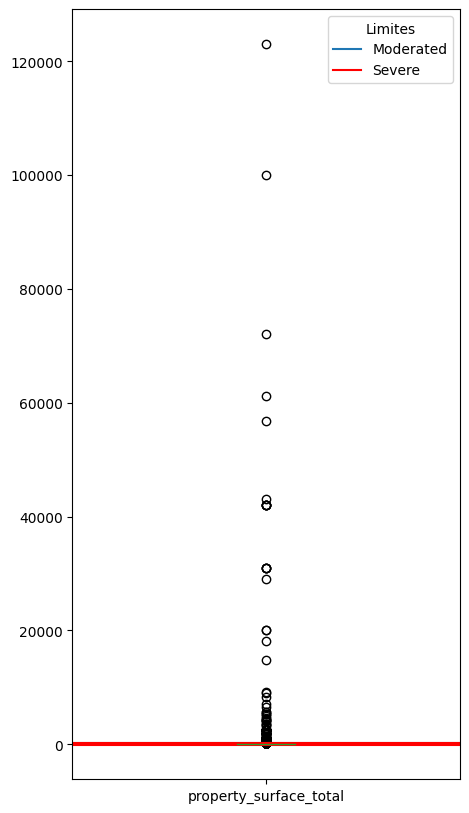

In [113]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

Como tenemos outliers muy altos, el boxplot no se aprecia. Tomaremos solo los outliers severos para un primer análisis

0-272       3216
272-500     2057
500-750      181
1000-inf      80
750-1000      24
Name: property_surface_total, dtype: int64


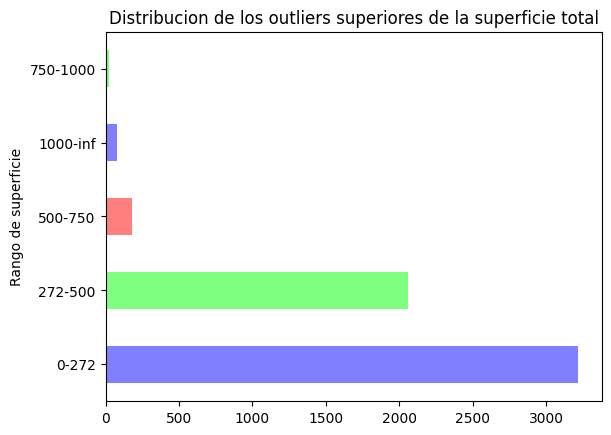

In [114]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [115]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")

Si bien la mediana de la superficite total es 223.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [116]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers superiores de sup total en train son: 285. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 285. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


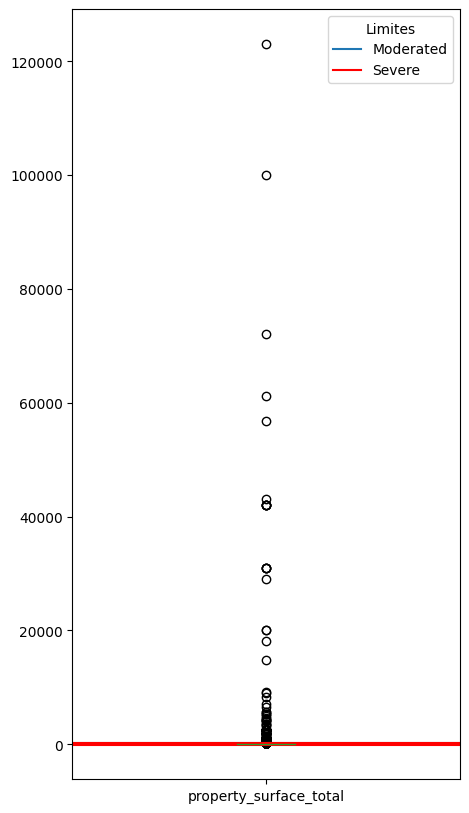

In [117]:
boxplot_with_outliers(ds_train, 'property_surface_total')

###### Procederemos a eliminar las superifices mayores a 500m^2

In [118]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 285 registros en train
Se han eliminado: 81 registros en test


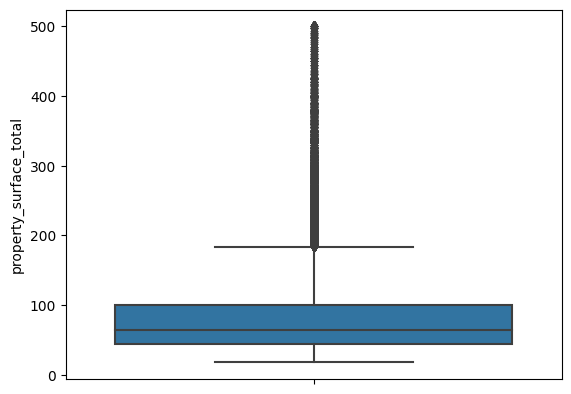

In [119]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

##### Superficie cubierta

cantidad de datos del ds: 73364
outliers encontrados para los property_surface_covered: 5766
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


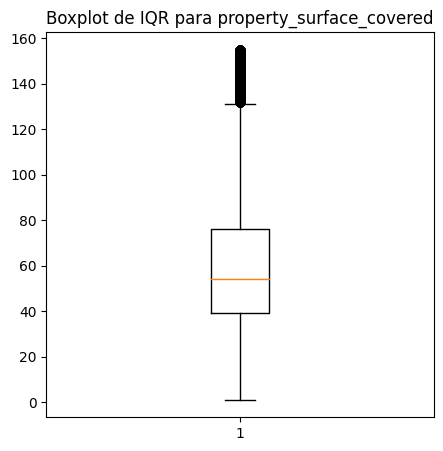

In [120]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [121]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5669. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1404. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


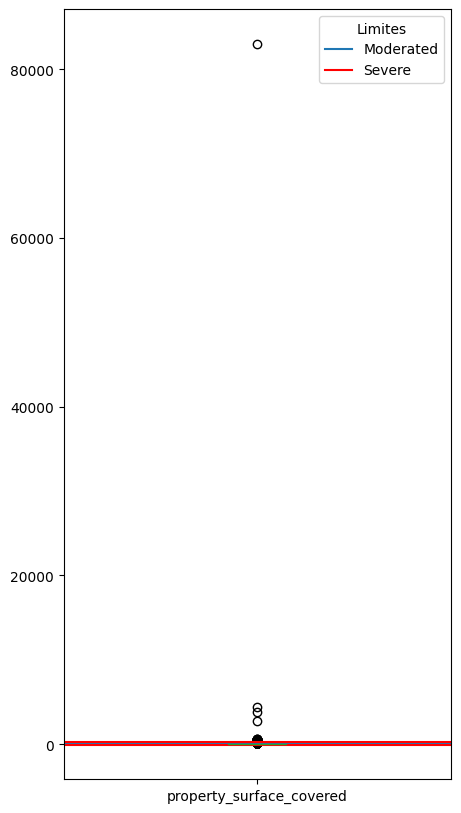

In [122]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Como hay algunas observacion demasiado anómalas, las excluímos para ver mejor

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


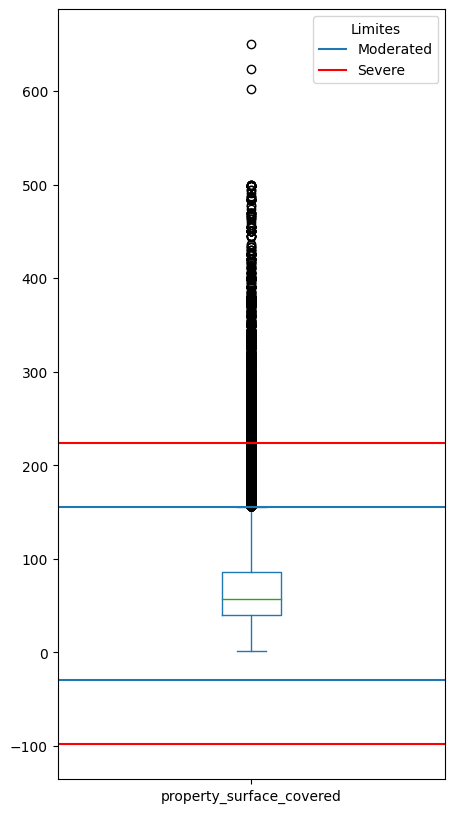

In [123]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3172
224-500     2305
500-750       53
1000-inf      19
750-1000       9
Name: property_surface_covered, dtype: int64


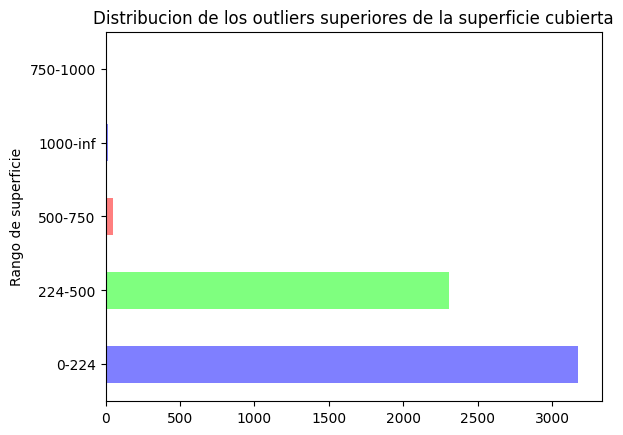

In [124]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

Inspeccionaremos los datos que se encuentran entre 224 y 500 $m^2$ de superficie cubierta

###### Como decidimos tomar como maximo valor de superificie total 500m^2, ese tambien va a ser nuestro maximo limite para la superificie cubierta para mantener la coherencia y el sentido en nuestro dominio. Procederemos a eliminar los valores que se encuentren por arriba. 

In [125]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 7 registros en train
Se han eliminado: 0 registros en test


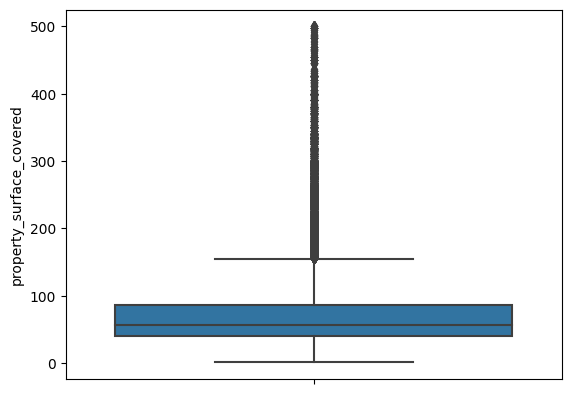

In [126]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

##### Latitud y longitud

cantidad de datos del ds: 73357
outliers encontrados para los latitud: 428
hay 0% de outliers de latitud sobre el ds
limit sup: -34.5201357, limite inf: -34.6727765


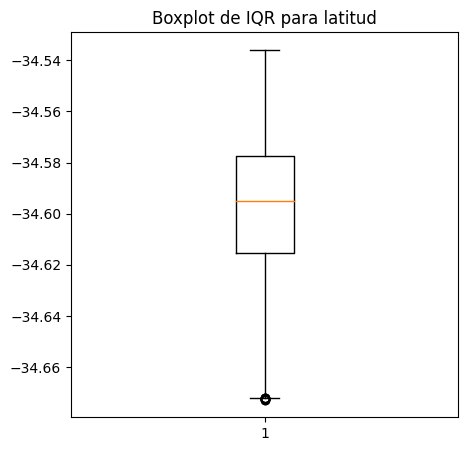

In [127]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73357
outliers encontrados para los longitud: 96
hay 0% de outliers de longitud sobre el ds
limit sup: -58.32484499999999, limite inf: -58.54973300000001


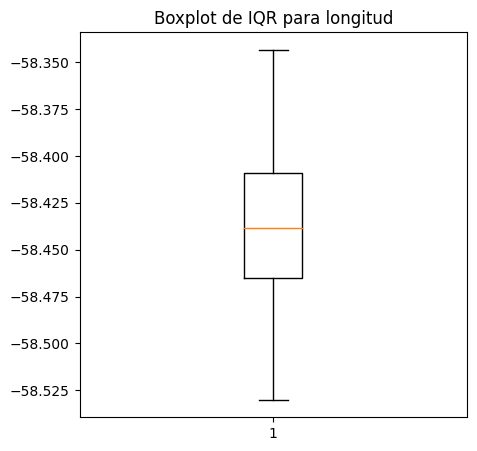

In [128]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

Los datos de latitud y longitud son dificiles de analizar por medio del rango intercuartil dado que los datos representan variaciones muy pequeñas y no son faciles de imaginar sin una ubicación en el mapa. Haremos este análisis más adelante.

In [129]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73273. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 84. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17712. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 12. Constituyen al 0% de los datos


#### Metodo Z score

In [130]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

Analisis de outliers con el metodo zscore para los ambientes

##### Ambientes

In [131]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para el caso de la variable Rooms

In [132]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 526. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 526. Constituyen al 2% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos


Aunque Zscore haya encontrado outliers, no consideramos que haya algun motivo valido para borrar estos datos. Por otro lado, corrimos Zscore modificado y despues de haber borrado los outliers por el metodo de IQR, no detecto ningun outlier. Proseguiremos sin borrar mas nada para rooms

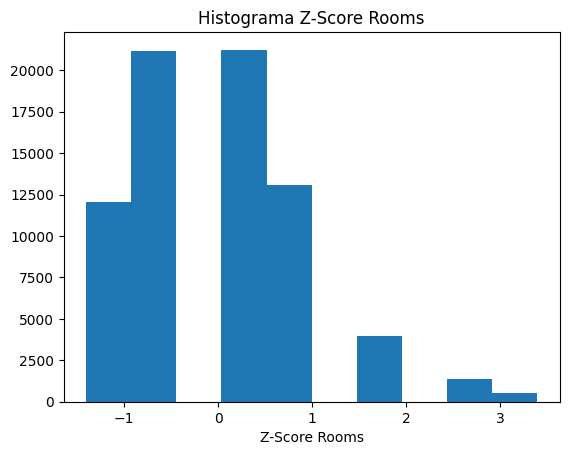

In [133]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

##### Habitaciones

In [134]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [135]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 636.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 636.Constituyen al 3% de los datos


id start_date   end_date    latitud   longitud  \
66629   w2uuAMH6KI36skYCXdwDkg== 2021-11-24 2022-01-27 -34.561229 -58.451047   
218024  PfsQ+ewdkGLHWWNt1AGmfA== 2021-11-30 2022-01-27 -34.609986 -58.401980   
456360  R5KbNkY7IHNkNiAIS5ybQA== 2021-12-16 2022-03-25 -34.577785 -58.501186   
145709  iIoIWdXmtizRoPEWeQmC7w== 2021-08-30 2022-01-27 -34.579921 -58.423914   
378523  hDXGlEpS2HXNQFBY+mEjLg== 2021-05-19 2021-06-05 -34.598438 -58.432395   
...                          ...        ...        ...        ...        ...   
158486  nGvx7+3C1Vzntup0lUxbtA== 2021-09-12 2021-09-19 -34.649700 -58.405818   
320181  QnQoowjHCfuOI7IlJqBnCw== 2021-09-03 2021-09-30 -34.625539 -58.464772   
140887  47ibm/t6tisvU9zlN1Qqxg== 2021-12-08 2022-01-26 -34.616231 -58.431795   
276451  Sg3aVy/01juOsLMcL7VpsA== 2021-12-23 2022-03-25 -34.563934 -58.505221   
253556  VSMnjNWpjlzmkumsxxSV5g== 2021-08-20 2021-08-23 -34.628994 -58.523351   

                place_l3 property_type  property_rooms  property_bedrooms  \
66629           Belgrano  Departamento             6.0                5.0   
218024         Balvanera            PH             6.0                5.0   
456360  Villa Pueyrredón          Casa             7.0                5.0   
145709           Palermo  Departamento             6.0                5.0   
378523      Villa Crespo            PH             7.0                5.0   
...                  ...           ...             ...                ...   
158486           Pompeya          Casa             7.0                6.0   
320181            Flores            PH             7.0                6.0   
140887         Caballito  Departamento             6.0                5.0   
276451          Saavedra          Casa             6.0                5.0   
253556         Versalles          Casa             7.0                5.0   

        property_surface_total  property_surface_covered  property_price  \
66629                    260.0                     187.0        690000.0   
218024                   180.0                     180.0        175000.0   
456360                   321.0                     260.0        445000.0   
145709                   158.0                     152.0        480000.0   
378523                   238.0                     238.0        600000.0   
...                        ...                       ...             ...   
158486                   182.0                     142.0        101800.0   
320181                   355.0                     255.0        165000.0   
140887                   239.0                     239.0        549000.0   
276451                   250.0                     250.0        650000.0   
253556                   335.0                     300.0        349000.0   

                                           property_title  z_property_bedrooms  
66629                             Departamento - Belgrano             3.303984  
218024   PH 180 m2 - 6 ambientes con Cochera en Balvanera             3.303984  
456360       Casa con jardin y Garage en Villa Pueyrredon             3.303984  
145709                             Departamento - Palermo             3.303984  
378523               PH - Villa Crespo - Apto profesional             3.303984  
...                                                   ...                  ...  
158486  CASA 7 AMBIENTES EN VENTA EN POMPEYA IDEAL 2 F...             4.355834  
320181         PH FLORES 7 AMB. PATRIMONIO HISTORICO CABA             4.355834  
140887  Reservado-Venta departamento en duplex, 6 ambi...             3.303984  
276451   VENTA CASA BARRIO PARQUE SAAVEDRA 6 AMB! PISCINA             3.303984  
253556  Oportunidad!! Venta Bloque, Versalles, lote 26...             3.303984  

[636 rows x 14 columns]

In [136]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

Mismo caso que para los rooms, al haber borrado los outliers de bedrooms por el metodo IQR notamos que al correr Zscore modificado ya no hay outliers aunque Zscore si detecta algunos. No los eliminaremos porque tras analizar el dataset resultante no vemos ningun valor extraño en nuestro dominio.

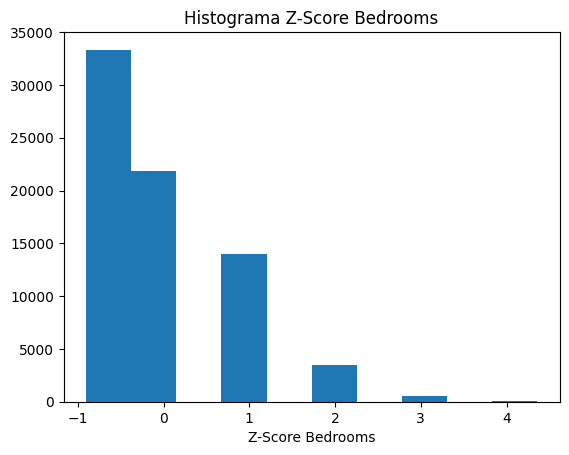

In [137]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

##### Superficie Total

In [138]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [139]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1836. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1836. Constituyen al 10% de los datos


id start_date   end_date    latitud   longitud  \
386854  PObmb1r/thsUEgSxhNMtiA== 2021-03-30 2021-06-06 -34.621379 -58.471203   
393096  jSxlVnvIq5iLDTI+1XYgzg== 2021-02-13 2021-03-01 -34.634816 -58.360406   
197597  fFG3B/MAz07BvYY4kC7WIA== 2021-04-17 2021-05-01 -34.636172 -58.475338   
146122  ZxgLLwcw9EqRl6fM5k2/PA== 2021-08-30 2021-09-27 -34.610497 -58.360296   
212025  C0q8scy7DjBV2Uf8pO9/qw== 2021-03-22 2021-05-10 -34.564829 -58.497503   

             place_l3 property_type  property_rooms  property_bedrooms  \
386854         Flores          Casa             5.0                2.0   
393096           Boca            PH             4.0                2.0   
197597       Floresta          Casa             5.0                3.0   
146122  Puerto Madero  Departamento             4.0                3.0   
212025  Villa Urquiza          Casa             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
386854                   360.0                     300.0        550000.0   
393096                   304.0                     163.0        239000.0   
197597                   390.0                     240.0        370000.0   
146122                   334.0                     334.0       3100000.0   
212025                   296.0                     296.0        595000.0   

                                           property_title  \
386854                              VENTA terreno FLORES    
393096               PH 4 AMBIENTES CON QUINCHO Y TERRAZA   
197597         Venta casa con jardín y pileta en Floresta   
146122  Venta Departamento Puerto Madero Renoir II 335...   
212025  Islandia 5500, Villa Urquiza - Acepta Permuta ...   

        z_property_surface_total  
386854                  4.170444  
393096                  3.319100  
197597                  4.626521  
146122                  3.775177  
212025                  3.197480

In [140]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore como outliers son aquellas viviendas que tienen mas de 200 m^2 pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

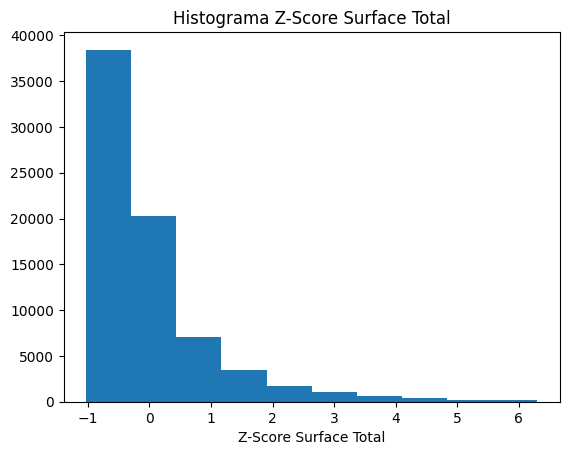

In [141]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

##### Superficie Cubierta

In [142]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [143]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1751. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1751. Constituyen al 9% de los datos


id start_date                      end_date  \
386854  PObmb1r/thsUEgSxhNMtiA== 2021-03-30 2021-06-06 00:00:00.000000000   
185287  qW83hS7UAIZVyDjYKtxQIA== 2021-06-06 2021-08-19 17:13:55.769257728   
157477  GnEwZpH5ikcgNQTHQ+Qnkw== 2021-02-17 2021-03-16 00:00:00.000000000   
146122  ZxgLLwcw9EqRl6fM5k2/PA== 2021-08-30 2021-09-27 00:00:00.000000000   
212025  C0q8scy7DjBV2Uf8pO9/qw== 2021-03-22 2021-05-10 00:00:00.000000000   
...                          ...        ...                           ...   
355435  Lpe7MyJR46wZFUCN50YpCQ== 2021-03-31 2021-04-27 00:00:00.000000000   
178134  7X4uPL50+C14kBLX+07c2w== 2021-03-23 2021-06-05 00:00:00.000000000   
301556  IptKOsNX8T0rwzG76+y4pQ== 2021-08-10 2021-09-03 00:00:00.000000000   
253556  VSMnjNWpjlzmkumsxxSV5g== 2021-08-20 2021-08-23 00:00:00.000000000   
289111  eRyVfvZ/u/yUJvNim8MH1g== 2021-02-25 2021-03-08 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
386854 -34.621379 -58.471203         Flores          Casa             5.0   
185287 -34.588004 -58.387756       Recoleta  Departamento             5.0   
157477 -34.618972 -58.359509  Puerto Madero  Departamento             4.0   
146122 -34.610497 -58.360296  Puerto Madero  Departamento             4.0   
212025 -34.564829 -58.497503  Villa Urquiza          Casa             5.0   
...           ...        ...            ...           ...             ...   
355435 -34.582251 -58.427540        Palermo  Departamento             5.0   
178134 -34.591590 -58.385946       Recoleta  Departamento             4.0   
301556 -34.592282 -58.378571         Retiro  Departamento             7.0   
253556 -34.628994 -58.523351      Versalles          Casa             7.0   
289111 -34.567686 -58.446284       Belgrano  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
386854                2.0                   360.0                     300.0   
185287                3.0                   275.0                     265.0   
157477                3.0                   277.0                     254.0   
146122                3.0                   334.0                     334.0   
212025                4.0                   296.0                     296.0   
...                   ...                     ...                       ...   
355435                4.0                   340.0                     253.0   
178134                3.0                   271.0                     271.0   
301556                4.0                   390.0                     390.0   
253556                5.0                   335.0                     300.0   
289111                3.0                   380.0                     380.0   

        property_price                                     property_title  \
386854        550000.0                              VENTA terreno FLORES    
185287        750000.0                            Departamento - Recoleta   
157477       2146750.0                Harbour Tower Puerto Madero Dique 1   
146122       3100000.0  Venta Departamento Puerto Madero Renoir II 335...   
212025        595000.0  Islandia 5500, Villa Urquiza - Acepta Permuta ...   
...                ...                                                ...   
355435        699900.0                     TRIPLEX 5 AMB+COCHERAS PALERMO   
178134        990000.0                            Departamento - Recoleta   
301556       1300000.0  RETASADO VENTA en PALACIO ESTRUGAMOU !! impeca...   
253556        349000.0  Oportunidad!! Venta Bloque, Versalles, lote 26...   
289111       1600000.0  VENTA TORRE AISENSON   Piso ALTO con excelente...   

        z_property_surface_covered  
386854                    4.037610  
185287                    3.410871  
157477                    3.213896  
146122                    4.646442  
212025                    3.965983  
...                            ...  
355435                    3.195989  
178134    

In [144]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

Los outliers encontrados por Zscore son los valores que decidimos mantener. Se encuentran en el rango de > 200m^2 y < 500m^2. No eliminaremos nada. 

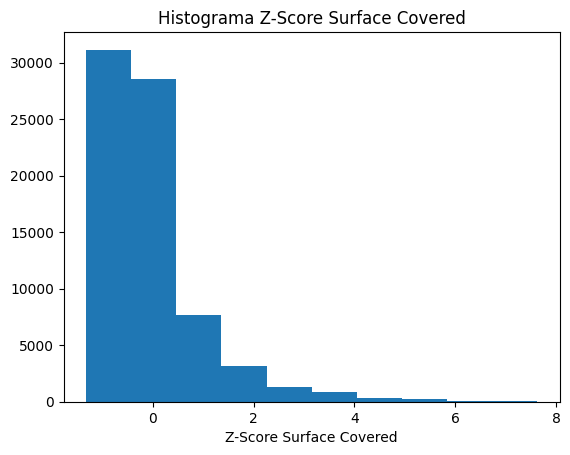

In [145]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

##### Latitud y Longitud

In [146]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [147]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 85. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 85. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
32735   +D2nh7iX0GjhWOC99ja96g== 2021-02-08 2021-03-15 -31.678900 -63.879640   
102566  08Jx+RHmViielHOkOSn0dA== 2021-05-28 2021-06-05 -32.966425 -60.629975   
393091  Ve3P4+jsLB/c9cIZQ2VaQQ== 2021-02-13 2021-03-18 -33.081030 -68.468140   
32726   +FDpBzP4FF/KqX+qnnnbgA== 2021-02-08 2021-04-06 -33.060356 -68.479394   
248011  dYekUDR/71AGhrqQBjeSHw== 2021-09-13 2022-01-27 -32.888004 -60.710540   
...                          ...        ...        ...        ...        ...   
226090  iT7XhFkKBzbzUngbpRPXtg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
190872  i4/0KG7vU2s7mHcWwZjgHA== 2021-11-01 2022-01-27 -31.343807 -64.336648   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.616670 -54.133330   
12962   PxTxkVaOSszP5lWImkFyyw== 2021-03-01 2021-03-01 -27.469213 -58.830635   
324539  lu3nDLUIBxwzOWaltbhNqg== 2021-03-03 2021-03-18 -24.372960 -65.027110   

       place_l3 property_type  property_rooms  property_bedrooms  \
32735       NaN          Casa             4.0                3.0   
102566      NaN  Departamento             3.0                2.0   
393091      NaN            PH             3.0                2.0   
32726       NaN            PH             2.0                1.0   
248011      NaN  Departamento             4.0                2.0   
...         ...           ...             ...                ...   
226090      NaN  Departamento             2.0                1.0   
190872      NaN          Casa             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
12962       NaN  Departamento             2.0                1.0   
324539      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
32735                    485.0                     108.0        115000.0   
102566                    65.0                      65.0        145000.0   
393091                    44.0                      37.0         85000.0   
32726                     49.0                      49.0         57000.0   
248011                    67.0                      67.0         40000.0   
...                        ...                       ...             ...   
226090                    27.0                      27.0         59000.0   
190872                   212.0                     140.0         65000.0   
405382                   205.0                     102.0        125000.0   
12962                     55.0                      55.0        120000.0   
324539                   174.0                     174.0        150000.0   

                                           property_title  z_latitud  
32735   VENTA CASA BARRIO SAN EDUARDO PILAR OPORTUNIDA...  18.055296  
102566  VENTA DEPARTAMENTO 2 DORMITORIOS República de ...  10.078806  
393091           RETASADO VENTA PH 3 AMB PATIO SAN MARTIN   9.368804  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA   9.496883  
248011  Departamento en venta en Rucci de 2 dormitorio...  10.564643  
...                                                   ...        ...  
226090              OFICINA COMERCIAL,San Martin -en pozo   9.368804  
190872                                  Casa en La Calera  20.131270  
405382      Depto Venta, Fincas de San Vicente II,  3 amb  49.416883  
12962          Depto Apto Profesional 70mt2 - Microcentro  44.135198  
324539        VENTA CASA COUNTRY EL PARAISO SOBRE 2 LOTES  63.317142  

[85 rows x 14 columns]

In [148]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 10. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 10. Constituyen al 0% de los datos


id start_date                      end_date  \
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 17:13:55.769257728   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 17:13:55.769257728   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
208085 -41.085373 -71.185766      NaN  Departamento             2.0   
10486  -41.163826 -71.438923      NaN          Casa             4.0   
106297 -41.086352 -71.185720      NaN  Departamento             2.0   
324200 -38.940227 -68.073865      NaN  Departamento             3.0   
457631 -53.788624 -67.718089      NaN  Departamento             3.0   
131188 -41.083002 -71.182747      NaN  Departamento             2.0   
410404 -38.964493 -68.075830      NaN          Casa             7.0   
105792 -41.084900 -71.187159      NaN  Departamento             1.0   
155333 -41.164123 -71.415420      NaN          Casa             3.0   
106288 -40.131723 -71.299436      NaN  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
208085                1.0                    60.0                      50.0   
10486                 3.0                   100.0                     100.0   
106297                1.0                    53.0                      53.0   
324200                2.0                    55.0                      55.0   
457631                2.0                   121.0                     100.0   
131188                1.0                    66.0                      56.0   
410404                5.0                   218.0                     218.0   
105792                1.0                    53.0                      53.0   
155333                2.0                    70.0                      70.0   
106288                1.0                    44.0                      44.0   

        property_price                                     property_title  \
208085        142000.0  Excelente departamento en venta en Dina Huapi ...   
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   
324200        120000.0  DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...   
457631        375000.0                Depto 3 ambientes Arboris Las Lomas   
131188        135000.0  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO    
410404        230000.0  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...   
105792        145000.0  Villa Huapi - Dina Huapi - Río Negro - APTO CR...   
155333        380000.0  HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C...   
106288        105000.0  Hermoso departamento en venta, totalmente equi...   

         z_latitud  
208085  -40.219800  
10486   -40.705828  
106297  -40.225863  
324200  -26.930163  
457631 -118.919128  
131188  -40.205108  
410404  -27.080498  
105792  -40.216865  
155333  -40.707672  
106288  -34.311734

Comprarandolo con los valores de lat/long del gráfico de CABA, podemos ver que los datos corresponden a valores que no están dentro del rango. Procederemos a eliminarlos en base al zscore.

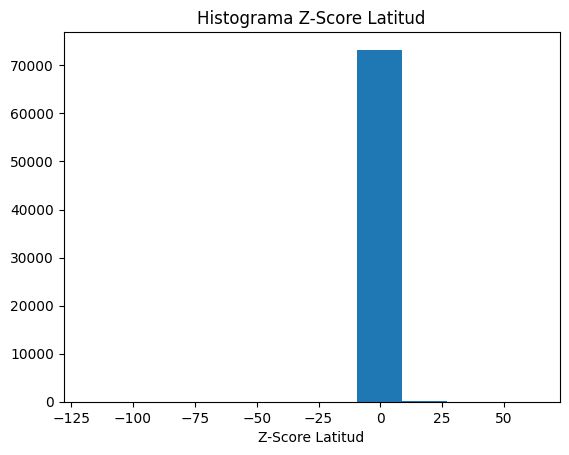

In [149]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [150]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id start_date   end_date    latitud   longitud  \
432209  FKIxy8qbdHC9mBdr87cwkg== 2021-12-16 2022-03-25 -34.579459 -58.509449   
142141  p+EpLalshuc9JY0aQKDiNw== 2021-03-10 2021-07-10 -34.597240 -58.396295   
181613  hZNkZze0dYz3AvIMj7S2lw== 2021-08-06 2021-09-10 -34.629933 -58.452190   
194510  hInPSiHerbiDxcTYA9WXCA== 2021-11-02 2022-01-27 -34.582420 -58.498516   
327682  j36OUp15ZaR9LaxdMRfqtg== 2021-12-14 2022-01-27 -34.555293 -58.458527   

                place_l3 property_type  property_rooms  property_bedrooms  \
432209  Villa Pueyrredón  Departamento             4.0                3.0   
142141          Recoleta  Departamento             1.0                1.0   
181613            Flores  Departamento             3.0                2.0   
194510  Villa Pueyrredón  Departamento             3.0                2.0   
327682          Belgrano  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
432209                   120.0                      79.0        230000.0   
142141                    25.0                      25.0         68500.0   
181613                    68.0                      65.0        148500.0   
194510                    54.0                      54.0        119000.0   
327682                    56.0                      50.0        299000.0   

                                           property_title  z_latitud  
432209    VENTA 4 AMBIENTES VILLA PUEYRREDON CON PARRILLA   0.085722  
142141           MONOAMBIENTE EN RECOLETA, BAJAS EXPENSAS  -0.024437  
181613  VENTA DPTO FLORES 3AMB 70M2 BALCON COCHERA BAU...  -0.226977  
194510  Departamento de 3 ambientes muy luminoso, muy ...   0.067372  
327682  RETASADO ! U$S 299.000 - VER VIDEO - 2 amb en ...   0.235431

In [151]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 6. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 6. Constituyen al 0% de los datos


id start_date   end_date   latitud   longitud  \
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   

       place_l3 property_type  property_rooms  property_bedrooms  \
220851      NaN          Casa             4.0                2.0   
241662      NaN          Casa             4.0                3.0   
173667      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
134196      NaN          Casa             4.0                2.0   
405382      NaN          Casa             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
220851                   105.0                     105.0        190000.0   
241662                   230.0                     200.0        255000.0   
173667                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   
134196                   105.0                     105.0        200000.0   
405382                   205.0                     102.0        125000.0   

                                           property_title  z_longitud  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    6.711672  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   16.410327  
173667  Venta departamento 4 amb Vicente Lopez con cochea   11.224123  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    3.384843  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    6.711672  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   16.410327

In [152]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 87. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 87. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
32735   +D2nh7iX0GjhWOC99ja96g== 2021-02-08 2021-03-15 -31.678900 -63.879640   
102566  08Jx+RHmViielHOkOSn0dA== 2021-05-28 2021-06-05 -32.966425 -60.629975   
393091  Ve3P4+jsLB/c9cIZQ2VaQQ== 2021-02-13 2021-03-18 -33.081030 -68.468140   
32726   +FDpBzP4FF/KqX+qnnnbgA== 2021-02-08 2021-04-06 -33.060356 -68.479394   
248011  dYekUDR/71AGhrqQBjeSHw== 2021-09-13 2022-01-27 -32.888004 -60.710540   
...                          ...        ...        ...        ...        ...   
396853  KEMpCo3rKcVGlO3gSQRbDA== 2021-02-13 2021-04-13 -33.081030 -68.468140   
226090  iT7XhFkKBzbzUngbpRPXtg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 -40.131723 -71.299436   
190872  i4/0KG7vU2s7mHcWwZjgHA== 2021-11-01 2022-01-27 -31.343807 -64.336648   
324539  lu3nDLUIBxwzOWaltbhNqg== 2021-03-03 2021-03-18 -24.372960 -65.027110   

       place_l3 property_type  property_rooms  property_bedrooms  \
32735       NaN          Casa             4.0                3.0   
102566      NaN  Departamento             3.0                2.0   
393091      NaN            PH             3.0                2.0   
32726       NaN            PH             2.0                1.0   
248011      NaN  Departamento             4.0                2.0   
...         ...           ...             ...                ...   
396853      NaN  Departamento             4.0                3.0   
226090      NaN  Departamento             2.0                1.0   
106288      NaN  Departamento             2.0                1.0   
190872      NaN          Casa             4.0                3.0   
324539      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
32735                    485.0                     108.0        115000.0   
102566                    65.0                      65.0        145000.0   
393091                    44.0                      37.0         85000.0   
32726                     49.0                      49.0         57000.0   
248011                    67.0                      67.0         40000.0   
...                        ...                       ...             ...   
396853                   112.0                     100.0        259900.0   
226090                    27.0                      27.0         59000.0   
106288                    44.0                      44.0        105000.0   
190872                   212.0                     140.0         65000.0   
324539                   174.0                     174.0        150000.0   

                                           property_title  z_longitud  
32735   VENTA CASA BARRIO SAN EDUARDO PILAR OPORTUNIDA...  -20.673565  
102566  VENTA DEPARTAMENTO 2 DORMITORIOS República de ...   -8.308863  
393091           RETASADO VENTA PH 3 AMB PATIO SAN MARTIN  -38.132423  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA  -38.175243  
248011  Departamento en venta en Rucci de 2 dormitorio...   -8.615405  
...                                                   ...         ...  
396853       VENTA depto 4 amb +AMENITIES Villa Ballester  -38.132423  
226090              OFICINA COMERCIAL,San Martin -en pozo  -38.132423  
106288  Hermoso departamento en venta, totalmente equi...  -48.905268  
190872                                  Casa en La Calera  -22.412442  
324539        VENTA CASA COUNTRY EL PARAISO SOBRE 2 LOTES  -25.039592  

[87 rows x 14 columns]

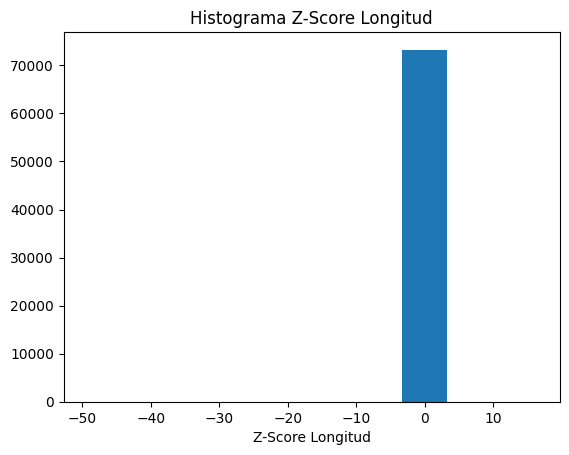

In [153]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

#### Metodo Z Score modificado

In [154]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

##### Ambientes

In [155]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para la variable Rooms en el zscore modificado

In [156]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [157]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

Notamos que despues de haber borrado los outliers por el metodo de IQR para rooms, no se detectan outliers por este metodo. Lo mas seguro es que hayan sido outliers compartidos, al borrarlos por un metodo la interseccion nos da vacio.

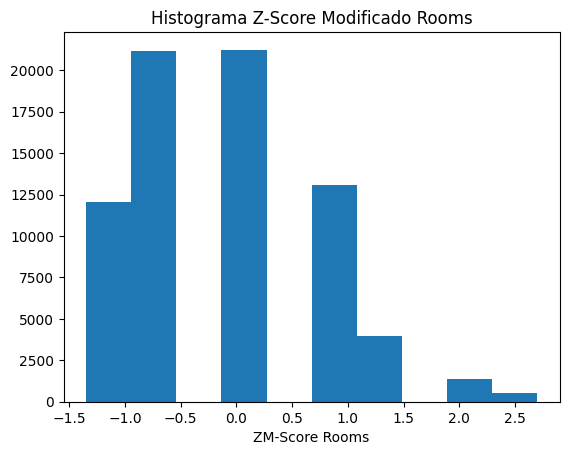

In [158]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

##### Habitaciones

In [159]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [160]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [161]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

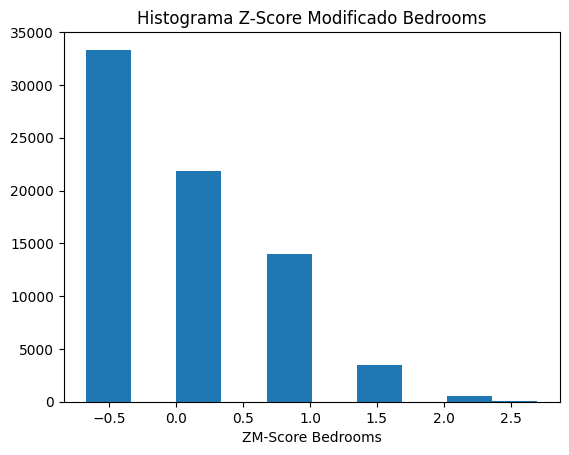

In [162]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

##### Superficie Total

In [163]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id start_date   end_date    latitud   longitud  \
432209  FKIxy8qbdHC9mBdr87cwkg== 2021-12-16 2022-03-25 -34.579459 -58.509449   
142141  p+EpLalshuc9JY0aQKDiNw== 2021-03-10 2021-07-10 -34.597240 -58.396295   
181613  hZNkZze0dYz3AvIMj7S2lw== 2021-08-06 2021-09-10 -34.629933 -58.452190   
194510  hInPSiHerbiDxcTYA9WXCA== 2021-11-02 2022-01-27 -34.582420 -58.498516   
327682  j36OUp15ZaR9LaxdMRfqtg== 2021-12-14 2022-01-27 -34.555293 -58.458527   

                place_l3 property_type  property_rooms  property_bedrooms  \
432209  Villa Pueyrredón  Departamento             4.0                3.0   
142141          Recoleta  Departamento             1.0                1.0   
181613            Flores  Departamento             3.0                2.0   
194510  Villa Pueyrredón  Departamento             3.0                2.0   
327682          Belgrano  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
432209                   120.0                      79.0        230000.0   
142141                    25.0                      25.0         68500.0   
181613                    68.0                      65.0        148500.0   
194510                    54.0                      54.0        119000.0   
327682                    56.0                      50.0        299000.0   

                                           property_title  \
432209    VENTA 4 AMBIENTES VILLA PUEYRREDON CON PARRILLA   
142141           MONOAMBIENTE EN RECOLETA, BAJAS EXPENSAS   
181613  VENTA DPTO FLORES 3AMB 70M2 BALCON COCHERA BAU...   
194510  Departamento de 3 ambientes muy luminoso, muy ...   
327682  RETASADO ! U$S 299.000 - VER VIDEO - 2 amb en ...   

        zm_property_surface_total  
432209                   1.573833  
142141                  -1.096062  
181613                   0.112417  
194510                  -0.281042  
327682                  -0.224833

Verificamos si se cumple la regla de oro para la variable sup total en el zscore modificado

In [164]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5469. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5469. Constituyen al 30% de los datos


id start_date                      end_date  \
386854  PObmb1r/thsUEgSxhNMtiA== 2021-03-30 2021-06-06 00:00:00.000000000   
207262  wwBejClkbUP5HUeERbSV2Q== 2021-04-02 2021-04-07 00:00:00.000000000   
343478  4DxAHb+vcH4tqiF+Qu1JdA== 2021-08-11 2021-09-15 00:00:00.000000000   
185287  qW83hS7UAIZVyDjYKtxQIA== 2021-06-06 2021-08-19 17:13:55.769257728   
153973  jGg5fiqWyxpeJaXL8GAdcg== 2021-02-03 2022-03-29 00:00:00.000000000   
...                          ...        ...                           ...   
253556  VSMnjNWpjlzmkumsxxSV5g== 2021-08-20 2021-08-23 00:00:00.000000000   
452855  35sd/X4GF9QTw9lU5wLJVg== 2021-12-16 2022-02-09 00:00:00.000000000   
289111  eRyVfvZ/u/yUJvNim8MH1g== 2021-02-25 2021-03-08 00:00:00.000000000   
326356  Tvf3Mdf7bmxXJxTrbtgaNg== 2021-08-27 2021-12-01 00:00:00.000000000   
88280   XspmDC+ZJqEvK1/ykHkQLg== 2021-05-14 2022-02-09 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
386854 -34.621379 -58.471203         Flores          Casa             5.0   
207262 -34.563104 -58.441952       Belgrano  Departamento             5.0   
343478 -34.581902 -58.424696        Palermo  Departamento             5.0   
185287 -34.588004 -58.387756       Recoleta  Departamento             5.0   
153973 -34.589213 -58.447174      Chacarita          Casa             4.0   
...           ...        ...            ...           ...             ...   
253556 -34.628994 -58.523351      Versalles          Casa             7.0   
452855 -34.610632 -58.431415      Caballito          Casa             6.0   
289111 -34.567686 -58.446284       Belgrano  Departamento             4.0   
326356 -34.614584 -58.361621  Puerto Madero  Departamento             3.0   
88280  -34.630274 -58.471447         Flores            PH             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
386854                2.0                   360.0                     300.0   
207262                4.0                   230.0                     210.0   
343478                4.0                   215.0                     215.0   
185287                3.0                   275.0                     265.0   
153973                3.0                   196.0                      94.0   
...                   ...                     ...                       ...   
253556                5.0                   335.0                     300.0   
452855                4.0                   313.0                     218.0   
289111                3.0                   380.0                     380.0   
326356                2.0                   194.0                     171.0   
88280                 4.0                   291.0                     155.0   

        property_price                                     property_title  \
386854        550000.0                              VENTA terreno FLORES    
207262        690000.0  Soldado de la Independencia 1400 P11 Belgrano ...   
343478        770000.0                             Departamento - Palermo   
185287        750000.0                            Departamento - Recoleta   
153973        270000.0          Casa de 4 ambientes en Venta en Chacarita   
...                ...                                                ...   
253556        349000.0  Oportunidad!! Venta Bloque, Versalles, lote 26...   
452855        459000.0  Venta Casa 6 amb Caballito Cochera y Patio Jardín   
289111       1600000.0  VENTA TORRE AISENSON   Piso ALTO con excelente...   
326356       1500000.0  VENTA I 3 ambientes I amoblado I con cochera I...   
88280         249000.0    PH 6 Amb en Flores. Con patio quincho y terraza   

        zm_property_surface_total  
386854                   8.318833  
207262                   4.665292  
343478                   4.243729  
185287                   5.929979  
153973                   3.709750  
...                           ...  
253556                   7.616229  
452855            

In [165]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore Modificado, asi como tambien el Zscore, son aquellas viviendas que tienen mas de 200 m^2 y menos de 500m^2pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

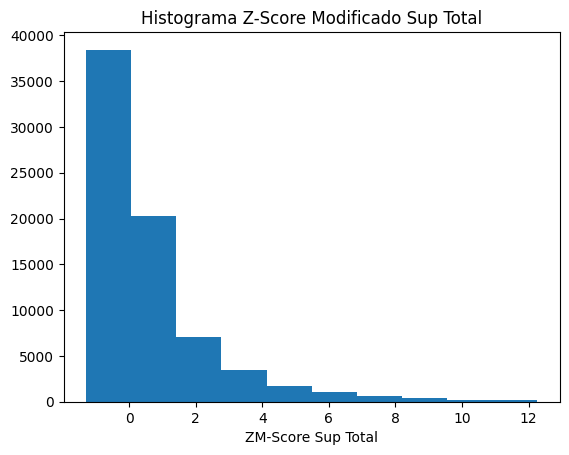

In [166]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

##### Superficie Cubierta

In [167]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

Verificamos si se cumple la regla de oro para la variable sup cubierta en el zscore modificado

In [168]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id start_date                      end_date  \
386854  PObmb1r/thsUEgSxhNMtiA== 2021-03-30 2021-06-06 00:00:00.000000000   
207262  wwBejClkbUP5HUeERbSV2Q== 2021-04-02 2021-04-07 00:00:00.000000000   
343478  4DxAHb+vcH4tqiF+Qu1JdA== 2021-08-11 2021-09-15 00:00:00.000000000   
185287  qW83hS7UAIZVyDjYKtxQIA== 2021-06-06 2021-08-19 17:13:55.769257728   
393096  jSxlVnvIq5iLDTI+1XYgzg== 2021-02-13 2021-03-01 00:00:00.000000000   
...                          ...        ...                           ...   
452855  35sd/X4GF9QTw9lU5wLJVg== 2021-12-16 2022-02-09 00:00:00.000000000   
289111  eRyVfvZ/u/yUJvNim8MH1g== 2021-02-25 2021-03-08 00:00:00.000000000   
326356  Tvf3Mdf7bmxXJxTrbtgaNg== 2021-08-27 2021-12-01 00:00:00.000000000   
86598   r2sNOpKfDWTodRHsDqVPcA== 2021-03-26 2021-07-02 00:00:00.000000000   
262179  odDvVfE56fqn4JY6D+hYjg== 2021-11-06 2022-01-19 17:13:55.769257728   

          latitud   longitud       place_l3 property_type  property_rooms  \
386854 -34.621379 -58.471203         Flores          Casa             5.0   
207262 -34.563104 -58.441952       Belgrano  Departamento             5.0   
343478 -34.581902 -58.424696        Palermo  Departamento             5.0   
185287 -34.588004 -58.387756       Recoleta  Departamento             5.0   
393096 -34.634816 -58.360406           Boca            PH             4.0   
...           ...        ...            ...           ...             ...   
452855 -34.610632 -58.431415      Caballito          Casa             6.0   
289111 -34.567686 -58.446284       Belgrano  Departamento             4.0   
326356 -34.614584 -58.361621  Puerto Madero  Departamento             3.0   
86598  -34.596526 -58.445114   Villa Crespo  Departamento             1.0   
262179 -34.591961 -58.392271       Recoleta  Departamento             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
386854                2.0                   360.0                     300.0   
207262                4.0                   230.0                     210.0   
343478                4.0                   215.0                     215.0   
185287                3.0                   275.0                     265.0   
393096                2.0                   304.0                     163.0   
...                   ...                     ...                       ...   
452855                4.0                   313.0                     218.0   
289111                3.0                   380.0                     380.0   
326356                2.0                   194.0                     171.0   
86598                 1.0                   165.0                     165.0   
262179                4.0                   185.0                     185.0   

        property_price                                     property_title  \
386854        550000.0                              VENTA terreno FLORES    
207262        690000.0  Soldado de la Independencia 1400 P11 Belgrano ...   
343478        770000.0                             Departamento - Palermo   
185287        750000.0                            Departamento - Recoleta   
393096        239000.0               PH 4 AMBIENTES CON QUINCHO Y TERRAZA   
...                ...                                                ...   
452855        459000.0  Venta Casa 6 amb Caballito Cochera y Patio Jardín   
289111       1600000.0  VENTA TORRE AISENSON   Piso ALTO con excelente...   
326356       1500000.0  VENTA I 3 ambientes I amoblado I con cochera I...   
86598         120000.0                           venta piso Villa Crespo    
262179        495000.0                            Departamento - Recoleta   

        zm_property_surface_covered  
386854                     8.195175  
207262                     5.159925  
343478                     5.328550  
185287                     7.014800  
393096                     3.574850  
...                             ...  
452855                     5.429725  
28

In [169]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

Mismo caso que el explicado para Zscore, Zscore modificado esta tomando como outliers a las superificies cubiertas que estan entre 200 y 500 m^2, nosotros optamos por mantener este valor ya nos parece valido, no eliminaremos nada.

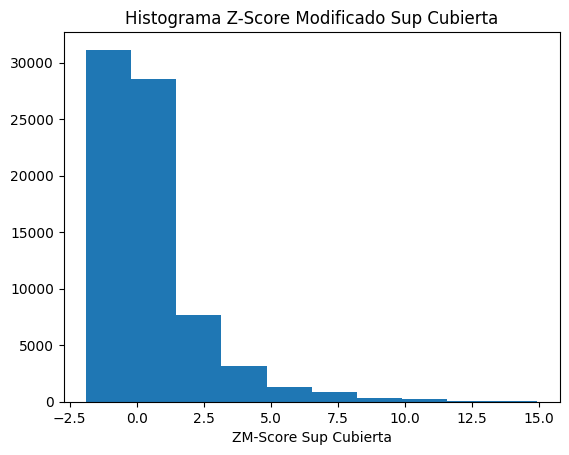

In [170]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

##### Latitud y longitud

In [171]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

Verificamos si se cumple la regla de oro para la variable latitud en el zscore modificado

In [172]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id start_date   end_date    latitud   longitud  \
32735   +D2nh7iX0GjhWOC99ja96g== 2021-02-08 2021-03-15 -31.678900 -63.879640   
102566  08Jx+RHmViielHOkOSn0dA== 2021-05-28 2021-06-05 -32.966425 -60.629975   
393091  Ve3P4+jsLB/c9cIZQ2VaQQ== 2021-02-13 2021-03-18 -33.081030 -68.468140   
32726   +FDpBzP4FF/KqX+qnnnbgA== 2021-02-08 2021-04-06 -33.060356 -68.479394   
248011  dYekUDR/71AGhrqQBjeSHw== 2021-09-13 2022-01-27 -32.888004 -60.710540   
...                          ...        ...        ...        ...        ...   
226090  iT7XhFkKBzbzUngbpRPXtg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
190872  i4/0KG7vU2s7mHcWwZjgHA== 2021-11-01 2022-01-27 -31.343807 -64.336648   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.616670 -54.133330   
12962   PxTxkVaOSszP5lWImkFyyw== 2021-03-01 2021-03-01 -27.469213 -58.830635   
324539  lu3nDLUIBxwzOWaltbhNqg== 2021-03-03 2021-03-18 -24.372960 -65.027110   

       place_l3 property_type  property_rooms  property_bedrooms  \
32735       NaN          Casa             4.0                3.0   
102566      NaN  Departamento             3.0                2.0   
393091      NaN            PH             3.0                2.0   
32726       NaN            PH             2.0                1.0   
248011      NaN  Departamento             4.0                2.0   
...         ...           ...             ...                ...   
226090      NaN  Departamento             2.0                1.0   
190872      NaN          Casa             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
12962       NaN  Departamento             2.0                1.0   
324539      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
32735                    485.0                     108.0        115000.0   
102566                    65.0                      65.0        145000.0   
393091                    44.0                      37.0         85000.0   
32726                     49.0                      49.0         57000.0   
248011                    67.0                      67.0         40000.0   
...                        ...                       ...             ...   
226090                    27.0                      27.0         59000.0   
190872                   212.0                     140.0         65000.0   
405382                   205.0                     102.0        125000.0   
12962                     55.0                      55.0        120000.0   
324539                   174.0                     174.0        150000.0   

                                           property_title  zm_latitud  
32735   VENTA CASA BARRIO SAN EDUARDO PILAR OPORTUNIDA...  103.087911  
102566  VENTA DEPARTAMENTO 2 DORMITORIOS República de ...   57.576950  
393091           RETASADO VENTA PH 3 AMB PATIO SAN MARTIN   53.525935  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA   54.256712  
248011  Departamento en venta en Rucci de 2 dormitorio...   60.348961  
...                                                   ...         ...  
226090              OFICINA COMERCIAL,San Martin -en pozo   53.525935  
190872                                  Casa en La Calera  114.932666  
405382      Depto Venta, Fincas de San Vicente II,  3 amb  282.025760  
12962          Depto Apto Profesional 70mt2 - Microcentro  251.890379  
324539        VENTA CASA COUNTRY EL PARAISO SOBRE 2 LOTES  361.335598  

[86 rows x 14 columns]

In [173]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 19. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 19. Constituyen al 0% de los datos


id start_date                      end_date  \
208451  r5h8YGMTL3OG6u8wekYDWg== 2021-02-01 2021-05-02 00:00:00.000000000   
82540   j0CggSFoqC9J+F1N9h91wg== 2021-03-12 2021-03-13 00:00:00.000000000   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 17:13:55.769257728   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 17:13:55.769257728   
65844   0tGMaOsXgkOAnx8GSH1pmA== 2021-05-15 2021-05-25 00:00:00.000000000   
317537  x1BlLb49Up0aSX9yuzhrMw== 2021-09-29 2022-03-25 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
351916  BKk+pz+G7Tajvr6LE+9UZw== 2021-06-25 2021-07-17 00:00:00.000000000   
270589  tQfZpYXLoOwWd990nrLpBg== 2021-07-13 2021-10-16 00:00:00.000000000   
271609  pMxqmA1WxzslUoiQPG4qFg== 2021-06-19 2021-07-05 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
250707  n/VGq/lp+AH1XRd4RSHphg== 2021-04-29 2021-05-15 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
308365  j4l0DxeSfN6KnNMYSo6bSg== 2021-04-28 2021-05-01 00:00:00.000000000   

          latitud   longitud         place_l3 property_type  property_rooms  \
208451 -34.694366 -58.468208     Villa Lugano  Departamento             2.0   
82540  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
208085 -41.085373 -71.185766              NaN  Departamento             2.0   
10486  -41.163826 -71.438923              NaN          Casa             4.0   
65844  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
317537 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
106297 -41.086352 -71.185720              NaN  Departamento             2.0   
351916 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
270589 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
271609 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
324200 -38.940227 -68.073865              NaN  Departamento             3.0   
457631 -53.788624 -67.718089              NaN  Departamento             3.0   
131188 -41.083002 -71.182747              NaN  Departamento             2.0   
410404 -38.964493 -68.075830              NaN          Casa             7.0   
105792 -41.084900 -71.187159              NaN  Departamento             1.0   
250707 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
155333 -41.164123 -71.415420              NaN          Casa             3.0   
106288 -40.131723 -71.299436              NaN  Departamento             2.0   
308365 -34.694900 -58.469161     Villa Lugano          Casa             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
208451                1.0                    74.0                      42.0   
82540                 3.0                    91.0                      79.0   
208085                1.0                    60.0                      50.0   
10486                 3.0                   100.0                     100.0   
65844                 3.0                    91.0                      79.0   
317537                3.0                    91.0                      79.0   
106297                1.0                    53.0                      53.0   
351916                1.0                    72.0                      72.0   
270589                2.0                    70.0                      50.0   
271609                2.0                    70.0                      50.0   
324200                2.0              

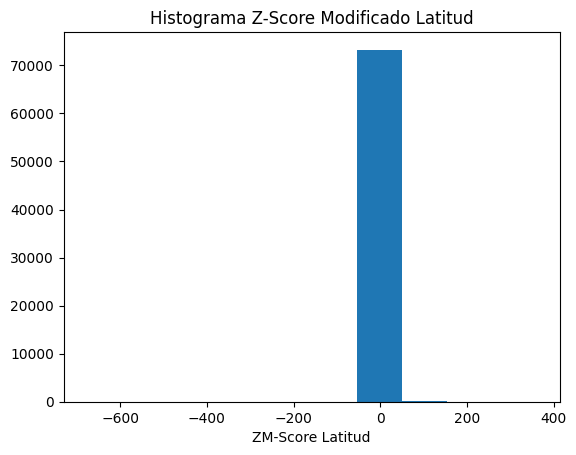

In [174]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [175]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

Verificamos si se cumple la regla de oro para la variable longitud en el zscore modificado

In [176]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id start_date   end_date   latitud   longitud  \
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   

       place_l3 property_type  property_rooms  property_bedrooms  \
220851      NaN          Casa             4.0                2.0   
241662      NaN          Casa             4.0                3.0   
173667      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
134196      NaN          Casa             4.0                2.0   
405382      NaN          Casa             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
220851                   105.0                     105.0        190000.0   
241662                   230.0                     200.0        255000.0   
173667                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   
134196                   105.0                     105.0        200000.0   
405382                   205.0                     102.0        125000.0   

                                           property_title  zm_longitud  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.350516  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   103.811595  
173667  Venta departamento 4 amb Vicente Lopez con cochea    70.946249  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    21.268164  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.350516  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   103.811595

In [177]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 90. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 90. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
32735   +D2nh7iX0GjhWOC99ja96g== 2021-02-08 2021-03-15 -31.678900 -63.879640   
102566  08Jx+RHmViielHOkOSn0dA== 2021-05-28 2021-06-05 -32.966425 -60.629975   
393091  Ve3P4+jsLB/c9cIZQ2VaQQ== 2021-02-13 2021-03-18 -33.081030 -68.468140   
32726   +FDpBzP4FF/KqX+qnnnbgA== 2021-02-08 2021-04-06 -33.060356 -68.479394   
248011  dYekUDR/71AGhrqQBjeSHw== 2021-09-13 2022-01-27 -32.888004 -60.710540   
...                          ...        ...        ...        ...        ...   
226090  iT7XhFkKBzbzUngbpRPXtg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 -40.131723 -71.299436   
190872  i4/0KG7vU2s7mHcWwZjgHA== 2021-11-01 2022-01-27 -31.343807 -64.336648   
12962   PxTxkVaOSszP5lWImkFyyw== 2021-03-01 2021-03-01 -27.469213 -58.830635   
324539  lu3nDLUIBxwzOWaltbhNqg== 2021-03-03 2021-03-18 -24.372960 -65.027110   

       place_l3 property_type  property_rooms  property_bedrooms  \
32735       NaN          Casa             4.0                3.0   
102566      NaN  Departamento             3.0                2.0   
393091      NaN            PH             3.0                2.0   
32726       NaN            PH             2.0                1.0   
248011      NaN  Departamento             4.0                2.0   
...         ...           ...             ...                ...   
226090      NaN  Departamento             2.0                1.0   
106288      NaN  Departamento             2.0                1.0   
190872      NaN          Casa             4.0                3.0   
12962       NaN  Departamento             2.0                1.0   
324539      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
32735                    485.0                     108.0        115000.0   
102566                    65.0                      65.0        145000.0   
393091                    44.0                      37.0         85000.0   
32726                     49.0                      49.0         57000.0   
248011                    67.0                      67.0         40000.0   
...                        ...                       ...             ...   
226090                    27.0                      27.0         59000.0   
106288                    44.0                      44.0        105000.0   
190872                   212.0                     140.0         65000.0   
12962                     55.0                      55.0        120000.0   
324539                   174.0                     174.0        150000.0   

                                           property_title  zm_longitud  
32735   VENTA CASA BARRIO SAN EDUARDO PILAR OPORTUNIDA...  -131.191710  
102566  VENTA DEPARTAMENTO 2 DORMITORIOS República de ...   -52.835697  
393091           RETASADO VENTA PH 3 AMB PATIO SAN MARTIN  -241.829753  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA  -242.101110  
248011  Departamento en venta en Rucci de 2 dormitorio...   -54.778278  
...                                                   ...          ...  
226090              OFICINA COMERCIAL,San Martin -en pozo  -241.829753  
106288  Hermoso departamento en venta, totalmente equi...  -310.098054  
190872                                  Casa en La Calera  -142.211097  
12962          Depto Apto Profesional 70mt2 - Microcentro    -9.449955  
324539        VENTA CASA COUNTRY EL PARAISO SOBRE 2 LOTES  -158.859539  

[90 rows x 14 columns]

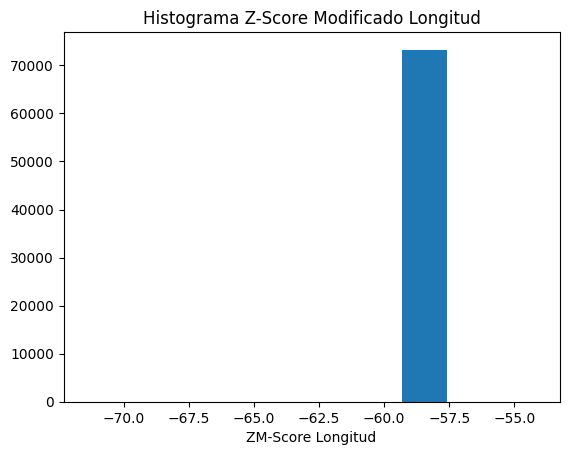

In [178]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

### Multivariados

#### Clustering - Mahalanobis

In [179]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X


In [180]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [181]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

##### Analisis entre ambientes y habitaciones de valores atipicos

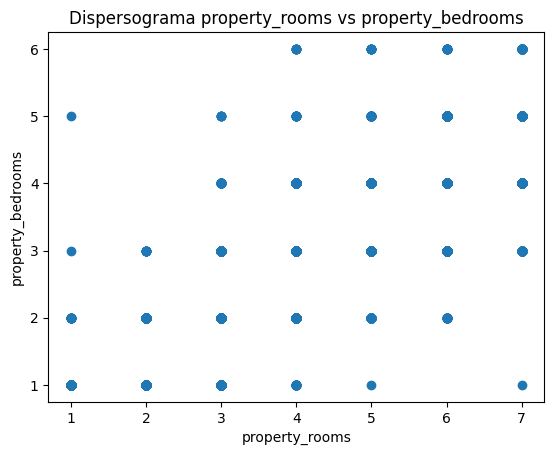

In [182]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

Parecerían exisitir algunas observaciones anómalas. Vamos a calcular la distancia de mahalanobis para cada observación.

In [183]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
432209             4.0                3.0     1.454201
142141             1.0                1.0     3.048163
181613             3.0                2.0     0.039744
194510             3.0                2.0     0.039744
327682             2.0                1.0     1.198671

Tenemos que seleccionar un valor umbral para definir qué observaciones podrían ser anómalas según la distancia de mahalanobis.

<AxesSubplot: ylabel='mahalanobis'>

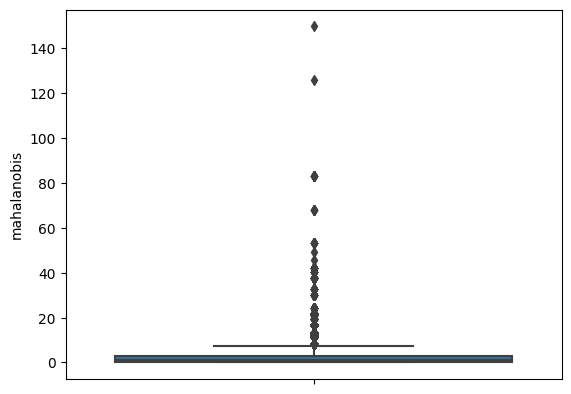

In [184]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

Seleccionamos 35 como valor umbral

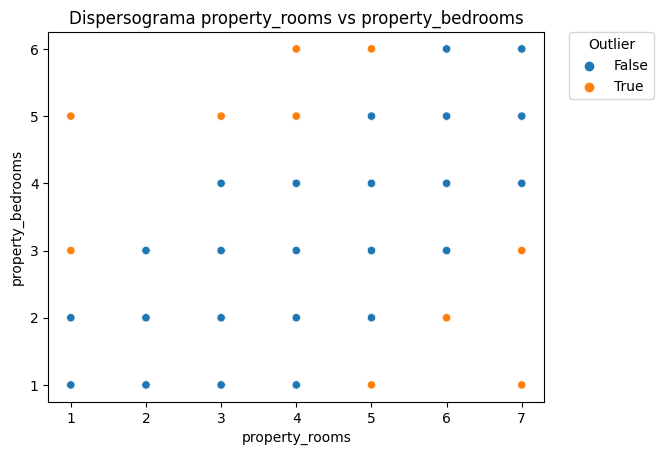

Los outliers para mahalanobis con un umbral de 35 son: 148. Constituyen el 0% de los datos


In [185]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot: ylabel='mahalanobis'>

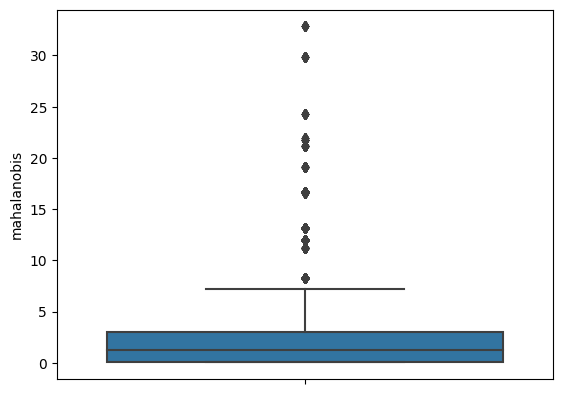

In [186]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [187]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
452275             4.0                5.0    40.367498
188497             7.0                3.0    37.573025
365332             7.0                3.0    37.573025
150143             3.0                5.0    67.919889
273564             7.0                3.0    37.573025
...                ...                ...          ...
213441             7.0                3.0    37.573025
239955             7.0                3.0    37.573025
100370             5.0                6.0    53.440041
401390             7.0                3.0    37.573025
31151              7.0                3.0    37.573025

[148 rows x 3 columns]

Como podemos observar en el scatter plot, quedan bien marcados los outliers que en nuestro dominio de problema no tienen ningun sentido.
Por ejemplo, tener 7 ambientes y 1 habitacion...
Procederemos a eliminar estos outliers.

###### Eliminamos dichas observaciones

In [188]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 148 registros en train
Se han eliminado: 37 registros en test


Dispersograma sin los outliers mencionados


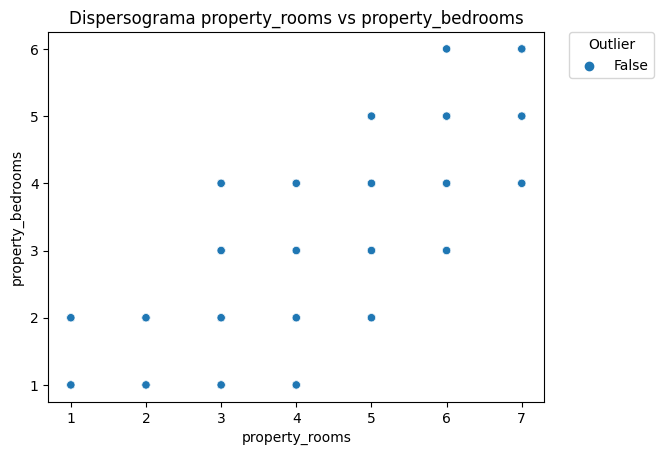

In [189]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

##### Analisis entre superficie total y superificie cubierta de valores atipicos

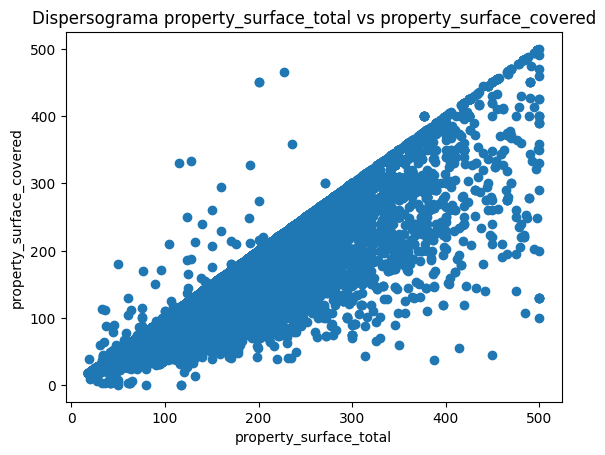

In [190]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [191]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
432209                   120.0                      79.0     1.906767
142141                    25.0                      25.0     0.906712
181613                    68.0                      65.0     0.136614
194510                    54.0                      54.0     0.304476
327682                    56.0                      50.0     0.211553

<AxesSubplot: ylabel='mahalanobis'>

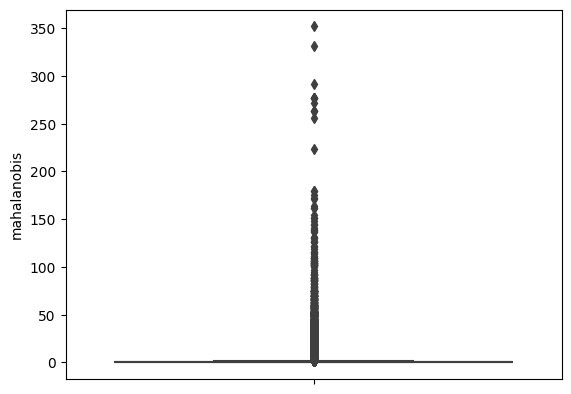

In [192]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [193]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [194]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered  mahalanobis
32735                    485.0                     108.0   291.121687
394706                   227.0                     466.0   255.679153
138208                   500.0                     100.0   330.857165
393711                   414.0                      56.0   271.237336
104359                   200.0                     450.0   263.395238
104592                   200.0                     450.0   263.395238
45540                    420.0                     120.0   178.895744
445383                   500.0                     130.0   276.292798
97083                    500.0                     130.0   276.292798
430838                   350.0                      60.0   175.226613
310407                   388.0                      38.0   262.788204
387598                   475.0                     140.0   222.907059
52468                    450.0                      45.0   351.804371
121279                   500.0                     130.0   276.292798
97055                    500.0                     130.0   276.292798
450430                   442.0                     140.0   179.021097

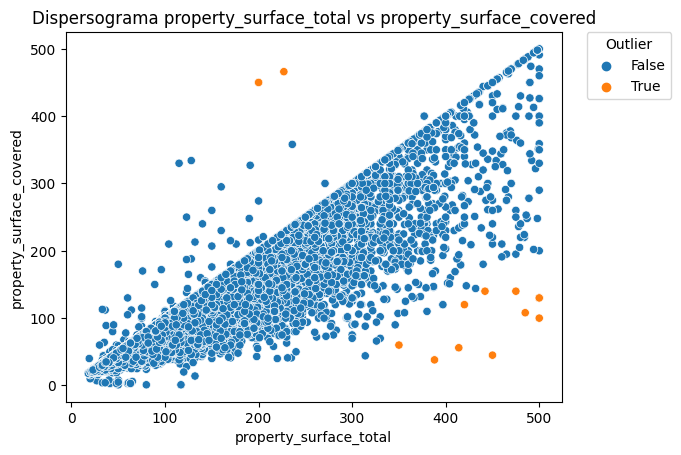

In [195]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

###### Como podemos observar, con mahalanobis pudimos detectar dos escenarios de outliers. Son outliers aquellas viviendas que tengan una superificie cubierta > superificie total Y son outliers tambien aquellas viviendas que tengan una brecha importante entre la superificie total y la cubierta. Por ejemplo: $380 m^2$ de total VS $80 m^2$ de cubierta. Procederemos a eliminarlos.

In [196]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 16 registros en train
Se han eliminado: 2 registros en test


Dispersograma sin los outliers mencionados


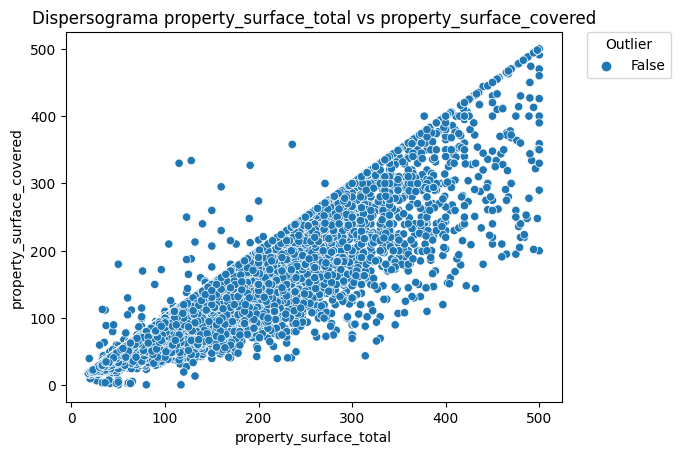

In [197]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

##### Analisis entre latitud y logitud de valores atipicos

In [198]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')


In [199]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 189.2872162146057


latitud   longitud  mahalanobis
102566 -32.966425 -60.629975   198.472823
393091 -33.081030 -68.468140  1745.078747
32726  -33.060356 -68.479394  1752.145729
248011 -32.888004 -60.710540   216.112868
234297 -31.302107 -64.254654  1055.907896
...           ...        ...          ...
106288 -40.131723 -71.299436  3580.969917
190872 -31.343807 -64.336648  1060.010704
405382 -26.616670 -54.133330  2760.787715
12962  -27.469213 -58.830635  2093.203877
324539 -24.372960 -65.027110  5240.554398

[93 rows x 3 columns]

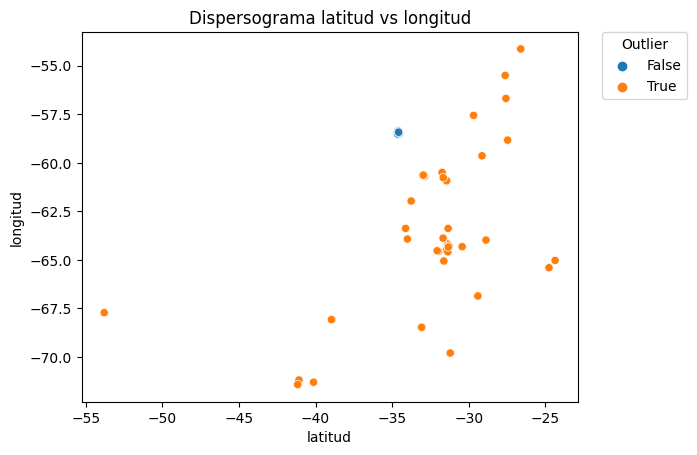

El grafico muestra 93 outliers
El mínimo según el umbral es de: 189.2872162146057


In [200]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


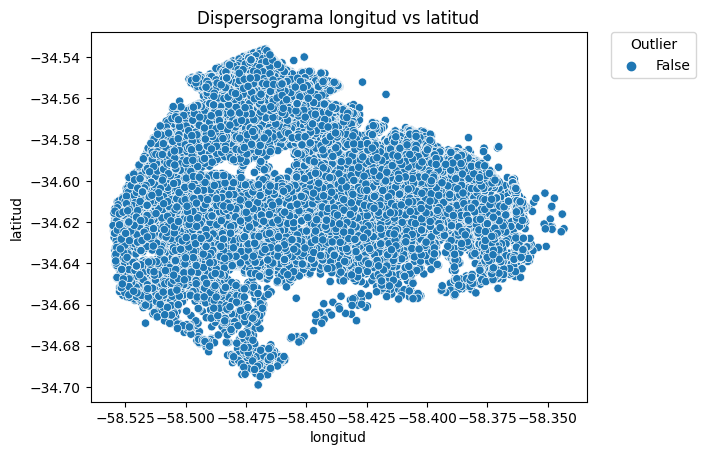

In [201]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'longitud', 'latitud',
                   umbral)

A simple vista se nota como el dispersograma cambió mucho y ahora se parece un poco a CABA. Notar además que tomamos como umbral 1 y sin embargo el valor mínimo de la distancia de estos outliers era de 106.

Como estos 1684 outliers tienen valores demasiado alejados del dataset, procederemos a borrarlos

In [202]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 93 registros en train
Se han eliminado: 5999 registros en test


Ahora que eliminamos los outliers de latitud y longitud, eliminaremos los datos nulos de place_l3.

In [203]:
ds_train.place_l3.isna().sum()

39

In [204]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

#### Analisis entre superficie total y precio

In [205]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    73061.000000
mean         1.768759
std         10.642557
min          0.000036
25%          0.175313
50%          0.389017
75%          0.671566
max       1586.815714
Name: mahalanobis, dtype: float64

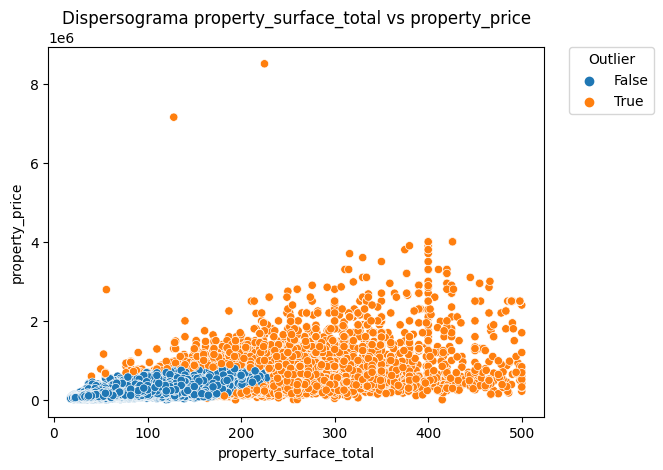

El grafico muestra 4601 outliers
El mínimo según el umbral es de: 5.0005188683613495
Los outliers representan un 6.2974774503497075%


In [206]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot: ylabel='mahalanobis'>

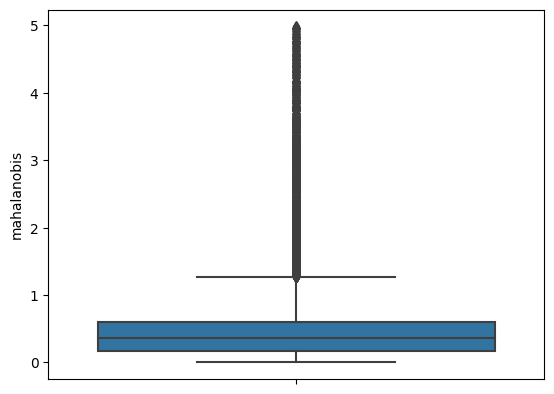

In [207]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

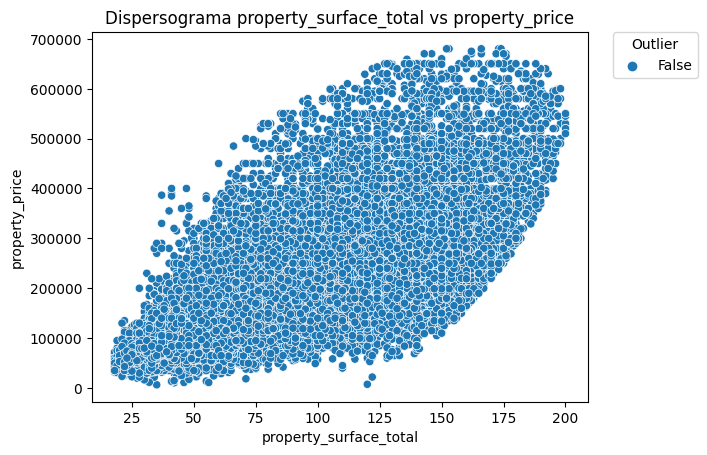

In [208]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

No llegamos a una buena conclusión para decidir el umbral por lo que tomaremos otro camino. Investigaremos acerca del precio por $m^2$ y realizaremos un análisis con el método de IQR sobre eso.

In [209]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 73061
outliers encontrados para los price_m2: 3384
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4279.069767441861, limite inf: 334.8837209302326


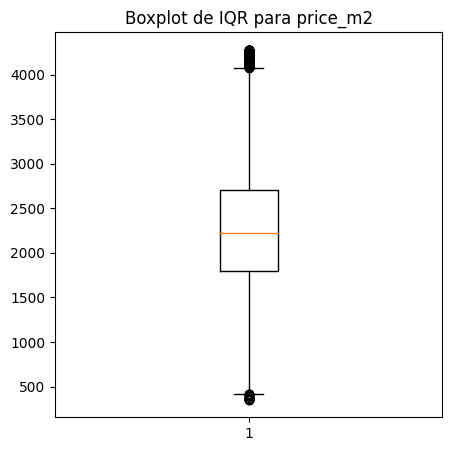

cantidad de datos del ds: 11686
outliers encontrados para los price_m2: 638
hay 5% de outliers de price_m2 sobre el ds
limit sup: 4240.284013605442, limite inf: 424.9234693877554


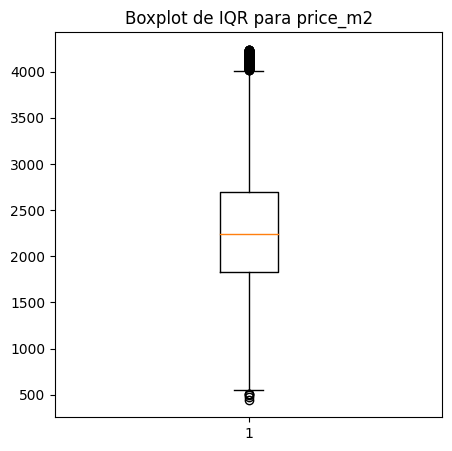

In [210]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3353 registros en train por encima del límite superior en train (4.589315777227249)
Hay 31 registros en train por debajo del límite inferior en train  (0.042430297970189296)
Hay 614 registros en train por encima del límite superior en train (0.8403936436676203)%
Hay 3 registros en train por debajo del límite inferior en train  (0.004106157868082835%)


Text(0.5, 1.0, 'Distribución sin outliers')

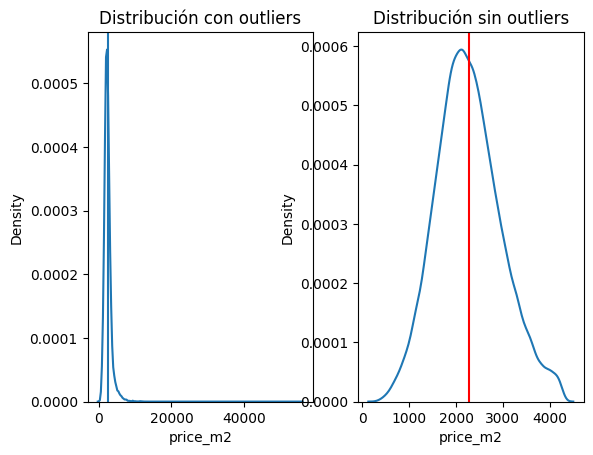

In [211]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

Como podemos ver, quitar estos outliers nos acerca el grafico a algo parecido a una distribución normal. Procederemos a borrar tanto los outliers superiores como inferiores.

In [212]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3353 registros en train
Se han eliminado: 614 registros en test


In [213]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 31 registros en train
Se han eliminado: 3 registros en test


#### LOF

In [214]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [215]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [216]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

##### Analisis de outliers para ambientes y habitaciones

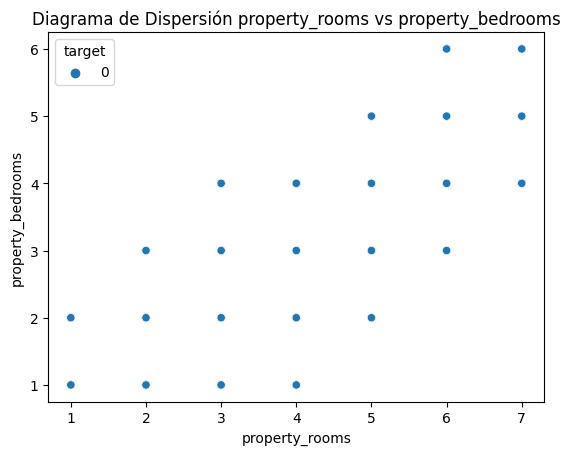

In [217]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [218]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id start_date   end_date    latitud   longitud  \
432209  FKIxy8qbdHC9mBdr87cwkg== 2021-12-16 2022-03-25 -34.579459 -58.509449   
142141  p+EpLalshuc9JY0aQKDiNw== 2021-03-10 2021-07-10 -34.597240 -58.396295   
181613  hZNkZze0dYz3AvIMj7S2lw== 2021-08-06 2021-09-10 -34.629933 -58.452190   
194510  hInPSiHerbiDxcTYA9WXCA== 2021-11-02 2022-01-27 -34.582420 -58.498516   
431358  GZsNz3mRsWC53rITjIIJYA== 2021-12-16 2022-02-09 -34.565938 -58.490112   
...                          ...        ...        ...        ...        ...   
53482   re/HLlkCSYOfVic/w8LqyQ== 2021-09-22 2021-10-07 -34.587976 -58.412134   
366919  cFY0Zz7n02iZNi7XJ+iNCw== 2021-04-10 2021-04-16 -34.616786 -58.389132   
398108  /z1xBw+Y+fYg9XT+RMt34g== 2021-02-13 2021-05-11 -34.552969 -58.460130   
184998  iX+AStzf/nLf3BkQ8N1ozg== 2021-06-06 2021-07-08 -34.592683 -58.376125   
25877   csvdaRqpKAakoTjvMMUGpg== 2021-06-24 2022-03-24 -34.584074 -58.422690   

                place_l3 property_type  property_rooms  property_bedrooms  \
432209  Villa Pueyrredón  Departamento             4.0                3.0   
142141          Recoleta  Departamento             1.0                1.0   
181613            Flores  Departamento             3.0                2.0   
194510  Villa Pueyrredón  Departamento             3.0                2.0   
431358     Villa Urquiza  Departamento             3.0                2.0   
...                  ...           ...             ...                ...   
53482            Palermo  Departamento             5.0                4.0   
366919         Monserrat  Departamento             3.0                2.0   
398108          Belgrano  Departamento             2.0                1.0   
184998            Retiro  Departamento             4.0                3.0   
25877            Palermo  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
432209                   120.0                      79.0        230000.0   
142141                    25.0                      25.0         68500.0   
181613                    68.0                      65.0        148500.0   
194510                    54.0                      54.0        119000.0   
431358                    76.0                      65.0        169900.0   
...                        ...                       ...             ...   
53482                    150.0                     141.0        339000.0   
366919                    63.0                      63.0        115000.0   
398108                    58.0                      42.0        168000.0   
184998                    96.0                      88.0        300000.0   
25877                     55.0                      55.0        170000.0   

                                           property_title  target  scores  
432209    VENTA 4 AMBIENTES VILLA PUEYRREDON CON PARRILLA       0    -1.0  
142141           MONOAMBIENTE EN RECOLETA, BAJAS EXPENSAS       0    -1.0  
181613  VENTA DPTO FLORES 3AMB 70M2 BALCON COCHERA BAU...       0    -1.0  
194510  Departamento de 3 ambientes muy luminoso, muy ...       0    -1.0  
431358  DPTO 3 AMB CON COCHERA Y AMENITIES - VILLA URQ...       0    -1.0  
...                                                   ...     ...     ...  
53482   RETASADO! U$S 339.000 - 5 amb - Palermo - Sant...       0    -1.0  
366919  DEPTO en VENTA  MONSERRAT 3 AMBIENTES OPORTUNI...       0    -1.0  
398108  VENTA 2 AMB. AL FRENTE - BALCON TERRAZA - BELG...       0    -1.0  
184998  Departamento - Venta -  4 Ambientes -  Retiro ...       0    -1.0  
25877                      Charcas y Gurruchaga - Palermo       0    -1.0  

[69677 rows x 15 columns]

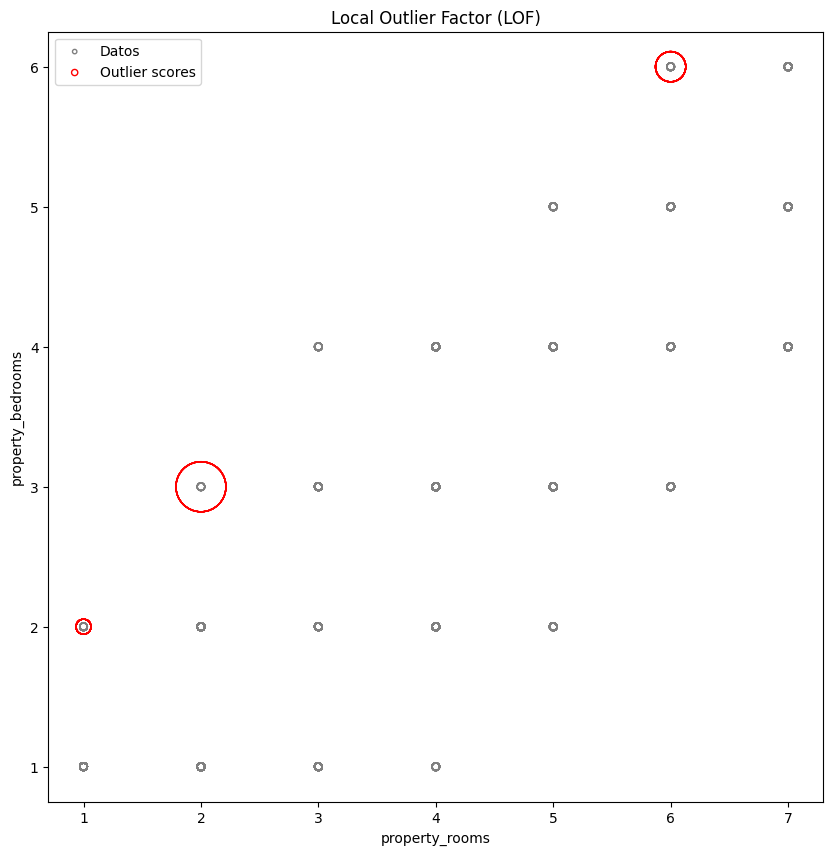

In [219]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

Como podemos observar, LOF parece estar marcandonos 3 outliers. Pareceria estar cumpliendo que un ambiente no puede ser mayor o igual al numero de habitaciones. No vimos un patro grande en el dataset que se rija bajo este criterio asi que en prinicpio no vamos a tomar accion al respecto. Lo grueso fue eliminado con mahalanobis.

##### Analisis de outliers para superficie total y superficie cubierta

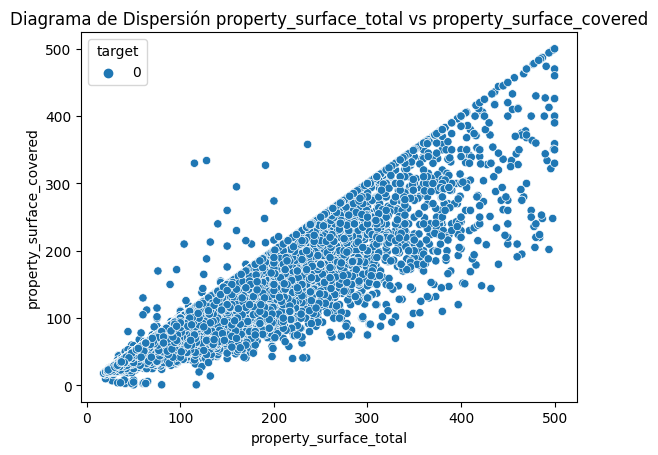

In [220]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [221]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id start_date   end_date    latitud   longitud  \
432209  FKIxy8qbdHC9mBdr87cwkg== 2021-12-16 2022-03-25 -34.579459 -58.509449   
142141  p+EpLalshuc9JY0aQKDiNw== 2021-03-10 2021-07-10 -34.597240 -58.396295   
181613  hZNkZze0dYz3AvIMj7S2lw== 2021-08-06 2021-09-10 -34.629933 -58.452190   
194510  hInPSiHerbiDxcTYA9WXCA== 2021-11-02 2022-01-27 -34.582420 -58.498516   
431358  GZsNz3mRsWC53rITjIIJYA== 2021-12-16 2022-02-09 -34.565938 -58.490112   
...                          ...        ...        ...        ...        ...   
53482   re/HLlkCSYOfVic/w8LqyQ== 2021-09-22 2021-10-07 -34.587976 -58.412134   
366919  cFY0Zz7n02iZNi7XJ+iNCw== 2021-04-10 2021-04-16 -34.616786 -58.389132   
398108  /z1xBw+Y+fYg9XT+RMt34g== 2021-02-13 2021-05-11 -34.552969 -58.460130   
184998  iX+AStzf/nLf3BkQ8N1ozg== 2021-06-06 2021-07-08 -34.592683 -58.376125   
25877   csvdaRqpKAakoTjvMMUGpg== 2021-06-24 2022-03-24 -34.584074 -58.422690   

                place_l3 property_type  property_rooms  property_bedrooms  \
432209  Villa Pueyrredón  Departamento             4.0                3.0   
142141          Recoleta  Departamento             1.0                1.0   
181613            Flores  Departamento             3.0                2.0   
194510  Villa Pueyrredón  Departamento             3.0                2.0   
431358     Villa Urquiza  Departamento             3.0                2.0   
...                  ...           ...             ...                ...   
53482            Palermo  Departamento             5.0                4.0   
366919         Monserrat  Departamento             3.0                2.0   
398108          Belgrano  Departamento             2.0                1.0   
184998            Retiro  Departamento             4.0                3.0   
25877            Palermo  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
432209                   120.0                      79.0        230000.0   
142141                    25.0                      25.0         68500.0   
181613                    68.0                      65.0        148500.0   
194510                    54.0                      54.0        119000.0   
431358                    76.0                      65.0        169900.0   
...                        ...                       ...             ...   
53482                    150.0                     141.0        339000.0   
366919                    63.0                      63.0        115000.0   
398108                    58.0                      42.0        168000.0   
184998                    96.0                      88.0        300000.0   
25877                     55.0                      55.0        170000.0   

                                           property_title  target    scores  
432209    VENTA 4 AMBIENTES VILLA PUEYRREDON CON PARRILLA       0 -1.005278  
142141           MONOAMBIENTE EN RECOLETA, BAJAS EXPENSAS       0 -1.000000  
181613  VENTA DPTO FLORES 3AMB 70M2 BALCON COCHERA BAU...       0 -1.000000  
194510  Departamento de 3 ambientes muy luminoso, muy ...       0 -1.000000  
431358  DPTO 3 AMB CON COCHERA Y AMENITIES - VILLA URQ...       0 -1.000000  
...                                                   ...     ...       ...  
53482   RETASADO! U$S 339.000 - 5 amb - Palermo - Sant...       0 -1.000000  
366919  DEPTO en VENTA  MONSERRAT 3 AMBIENTES OPORTUNI...       0 -1.000000  
398108  VENTA 2 AMB. AL FRENTE - BALCON TERRAZA - BELG...       0 -1.000000  
184998  Departamento - Venta -  4 Ambientes -  Retiro ...       0 -1.000000  
25877                      Charcas y Gurruchaga - Palermo       0 -1.000000  

[69677 rows x 15 columns]

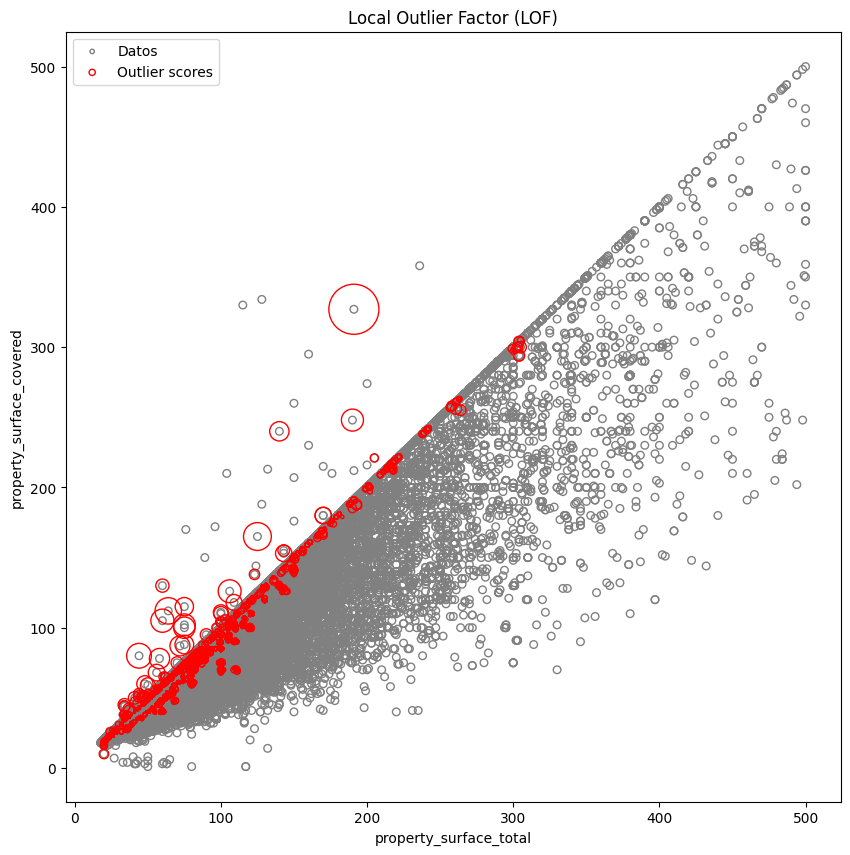

In [222]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

Como vemos en el grafico de LOF pareceria que la superifice total no puede ser exactamente igual a la superificie cubierta, por eso la deteccion de outiers a lo largo de la recta con pendiente creciente. Como no tenemos especificaciones tecnicas de cuantos metros menos deberia tener una superificie cubierta con respecto a la total, no vamos a tocar los datos.

#### Isolation Forest

##### Analisis de outliers para ambientes y habitaciones

Estos plots los hicimos meramente para probar el algoritmos de Isolation Forest pero no fue tomado en cuenta para tomar ninguna decision.

De hecho noatr que no se trabajaron el resto de las variables.

In [223]:
rooms_bedrooms_iforest = ds_train[['property_rooms', 'property_bedrooms']]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_rooms'].isna())]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_bedrooms'].isna())]

iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=2,
                          bootstrap=False, n_jobs=-1, random_state=1)

pred = iforest.fit_predict(rooms_bedrooms_iforest)
#Almaceno scores y etiquetas
rooms_bedrooms_iforest['scores'] = iforest.decision_function(rooms_bedrooms_iforest)
rooms_bedrooms_iforest['outlier_label'] = pred

#Observaciones anómalas
rooms_bedrooms_iforest[rooms_bedrooms_iforest.outlier_label == -1]

property_rooms  property_bedrooms    scores  outlier_label
386854             5.0                2.0 -0.053646             -1
393096             4.0                2.0 -0.023476             -1
168459             3.0                1.0 -0.006194             -1
66629              6.0                5.0 -0.130946             -1
218024             6.0                5.0 -0.130946             -1
...                ...                ...       ...            ...
253556             7.0                5.0 -0.151596             -1
452855             6.0                4.0 -0.051827             -1
398545             4.0                2.0 -0.023476             -1
262179             7.0                4.0 -0.102433             -1
88280              6.0                4.0 -0.051827             -1

[3245 rows x 4 columns]

In [224]:
rooms_bedrooms_iforest.outlier_label.value_counts()

 1    66432
-1     3245
Name: outlier_label, dtype: int64

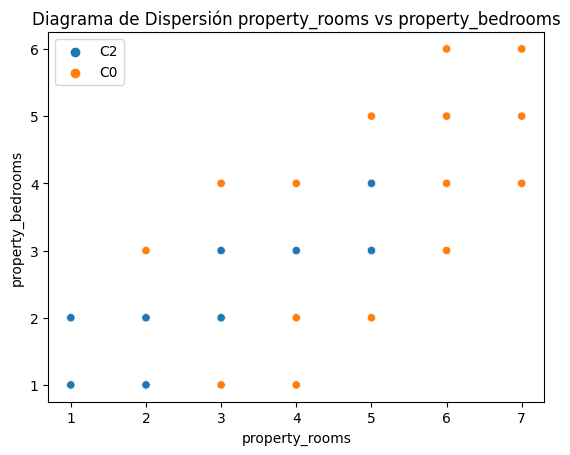

In [225]:
#Grafico dispersograma
color = [f"C{n + 1}" for n in (rooms_bedrooms_iforest['outlier_label'].values)]

sns.scatterplot(x=rooms_bedrooms_iforest['property_rooms'], y=rooms_bedrooms_iforest['property_bedrooms'], hue=color)
plt.title('Diagrama de Dispersión property_rooms vs property_bedrooms')
plt.show()

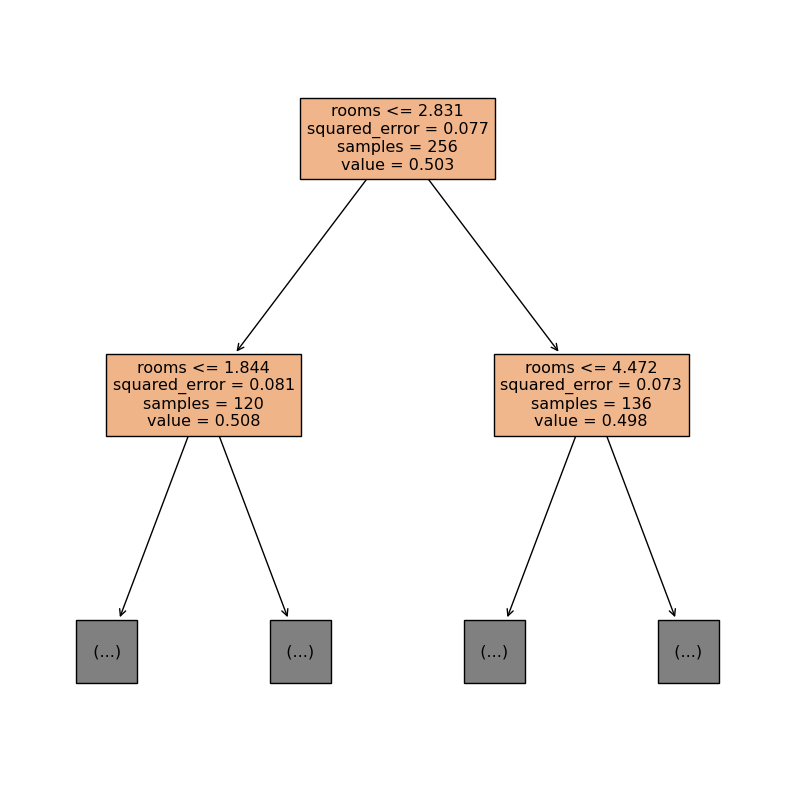

In [226]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['rooms', 'bedrooms'], filled=True, max_depth=1)
plt.show()

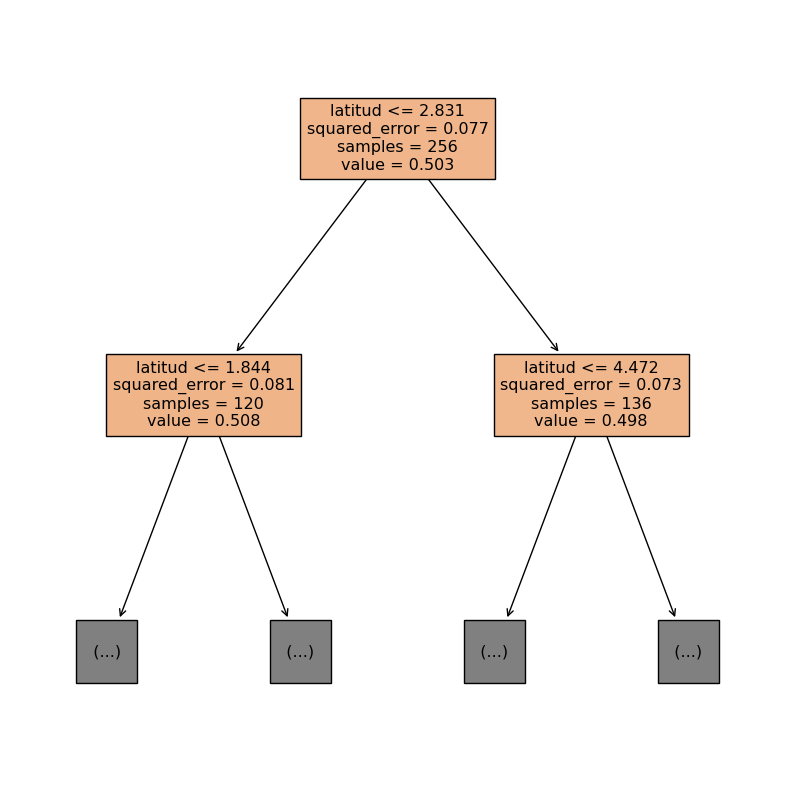

In [227]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['latitud', 'longitud'], filled=True, max_depth=1)
plt.show()

Habiendo hecho el análisis de valores atípicos y las imputaciones necesarias, finalmente eliminamos la columna id que usamos para hacer algunos merges.

In [228]:
# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

## Reduccion de la Dimensionalidad

### Analisis PCA

Para poder realizar el análisis PCA del dataset es necesario que todos los campos sean numéricos.
Vamos a deshacernos de las siguientes columnas:
- ID: no aporta información
- Fechas y título: no pueden adaptarse a un formato numérico
- place_l3: es información redundante cuando tenemos latitud y longitud.
- property_price: es la variable que queremos predecir


In [229]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
432209 -34.579459 -58.509449             4.0                3.0   
142141 -34.597240 -58.396295             1.0                1.0   
181613 -34.629933 -58.452190             3.0                2.0   
194510 -34.582420 -58.498516             3.0                2.0   
431358 -34.565938 -58.490112             3.0                2.0   
...           ...        ...             ...                ...   
53482  -34.587976 -58.412134             5.0                4.0   
366919 -34.616786 -58.389132             3.0                2.0   
398108 -34.552969 -58.460130             2.0                1.0   
184998 -34.592683 -58.376125             4.0                3.0   
25877  -34.584074 -58.422690             4.0                3.0   

        property_surface_total  property_surface_covered  
432209                   120.0                      79.0  
142141                    25.0                      25.0  
181613                    68.0                      65.0  
194510                    54.0                      54.0  
431358                    76.0                      65.0  
...                        ...                       ...  
53482                    150.0                     141.0  
366919                    63.0                      63.0  
398108                    58.0                      42.0  
184998                    96.0                      88.0  
25877                     55.0                      55.0  

[69677 rows x 6 columns]

In [230]:
ds_reducido.shape

(69677, 6)

Procedemos ahora a normalizar las columnas del dataframe

In [231]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0      0.642756 -1.861687        1.040685           1.240372   
1     -0.032102  1.172451       -1.397971          -0.889539   
2     -1.272905 -0.326344        0.227800           0.175416   
3      0.530345 -1.568539        0.227800           0.175416   
4      1.155907 -1.343180        0.227800           0.175416   
...         ...       ...             ...                ...   
69672  0.319481  0.747743        1.853571           2.305327   
69673 -0.773936  1.364517        0.227800           0.175416   
69674  1.648119 -0.539245       -0.585086          -0.889539   
69675  0.140855  1.713295        1.040685           1.240372   
69676  0.467568  0.464673        1.040685           1.240372   

       property_surface_total  property_surface_covered  
0                    0.618270                  0.157613  
1                   -0.935942                 -0.914104  
2                   -0.232457                 -0.120240  
3                   -0.461499                 -0.338552  
4                   -0.101576                 -0.120240  
...                       ...                       ...  
69672                1.109074                  1.388102  
69673               -0.314257                 -0.159933  
69674               -0.396058                 -0.576711  
69675                0.225627                  0.336232  
69676               -0.445138                 -0.318706  

[69677 rows x 6 columns]

#### Replicamos para test las mismas transformaciones

In [232]:
ds_reducido_test = ds_test.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido_test

latitud   longitud  property_rooms  property_bedrooms  \
330133 -34.600597 -58.387820             2.0                1.0   
163138 -34.619913 -58.443092             2.0                1.0   
115508 -34.623337 -58.397710             3.0                2.0   
303214 -34.603571 -58.437463             5.0                4.0   
329854 -34.608320 -58.394823             1.0                1.0   
...           ...        ...             ...                ...   
74814  -34.586930 -58.418783             2.0                1.0   
76669  -34.566251 -58.466023             3.0                2.0   
187407 -34.575928 -58.455463             4.0                3.0   
89193  -34.570682 -58.433252             2.0                1.0   
87751  -34.612420 -58.416518             4.0                3.0   

        property_surface_total  property_surface_covered  
330133                    33.0                      33.0  
163138                    48.0                      40.0  
115508                    48.0                      48.0  
303214                   199.0                     199.0  
329854                    31.0                      31.0  
...                        ...                       ...  
74814                     35.0                      35.0  
76669                     60.0                      50.0  
187407                   131.0                     111.0  
89193                     60.0                      55.0  
87751                     65.0                      65.0  

[11069 rows x 6 columns]

In [233]:
ds_reducido_test_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido_test), columns=ds_reducido.columns)
ds_reducido_test_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -0.350448  1.164332       -0.537161          -0.856089   
1     -1.616152 -0.362593       -0.537161          -0.856089   
2     -1.840531  0.891120        0.275778           0.221715   
3     -0.545294 -0.207080        1.901654           2.377322   
4     -0.856515  0.970878       -1.350099          -0.856089   
...         ...       ...             ...                ...   
11064  0.545093  0.308954       -0.537161          -0.856089   
11065  1.900163 -0.996082        0.275778           0.221715   
11066  1.266043 -0.704350        1.088716           1.299518   
11067  1.609772 -0.090754       -0.537161          -0.856089   
11068 -1.125177  0.371518        1.088716           1.299518   

       property_surface_total  property_surface_covered  
0                   -0.785053                 -0.734534  
1                   -0.527336                 -0.590132  
2                   -0.527336                 -0.425100  
3                    2.067015                  2.689876  
4                   -0.819416                 -0.775792  
...                       ...                       ...  
11064               -0.750691                 -0.693276  
11065               -0.321163                 -0.383842  
11066                0.898698                  0.874526  
11067               -0.321163                 -0.280697  
11068               -0.235257                 -0.074407  

[11069 rows x 6 columns]

Armamos ahora la matriz de correlación del dataset normalizado

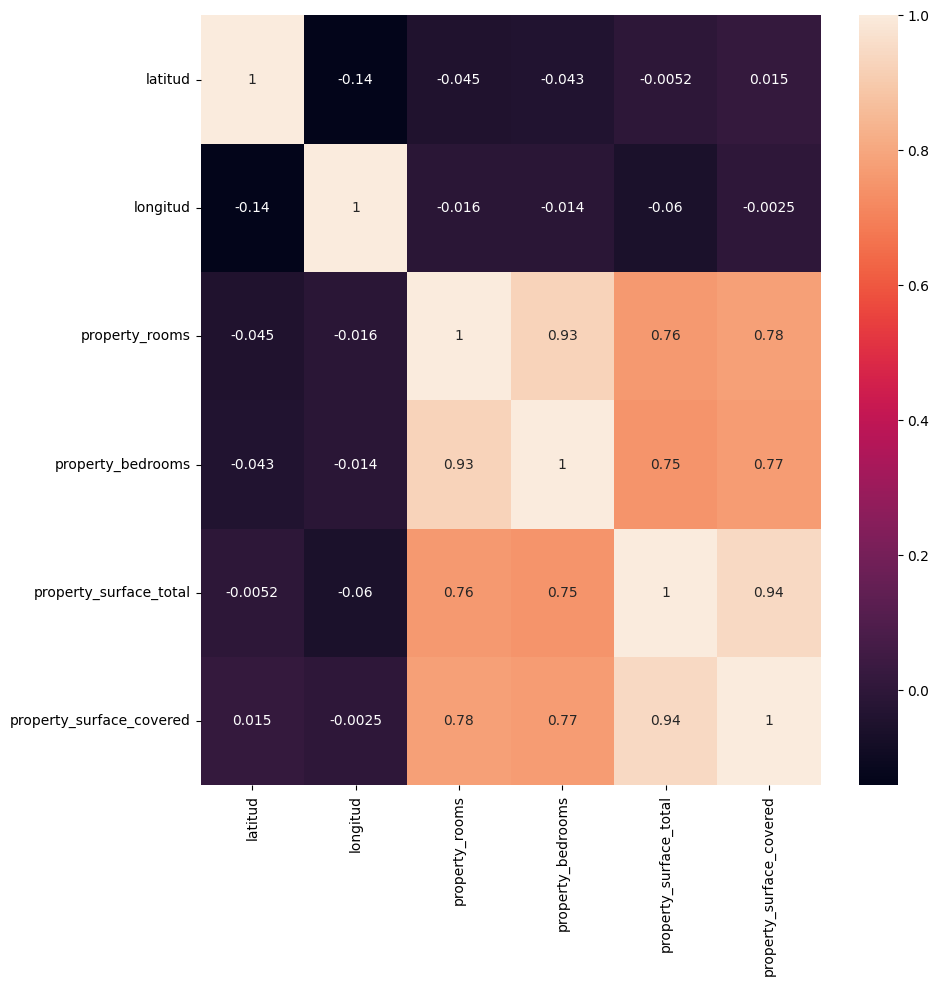

In [234]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

Como era de esperarse, podemos ver que existe una correlación muy fuerte entre property_surface_total y property_surface_covered y entre property_rooms y property_bedrooms

Ahora si comenzamos con PCA y calculamos las componentes principales, elegimos el mismo número de variables que en el dataframe anterior

In [235]:
ds_reducido_normalizado.shape

(69677, 6)

In [236]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0      1.548449 -1.719702  0.886537 -0.814643  0.124027 -0.296004
1     -2.089184  0.829861 -0.773636  0.228627  0.358281 -0.018452
2      0.049686  0.696595  1.138651 -0.282878 -0.043186  0.108732
3     -0.179013 -1.439758  0.770171 -0.660402 -0.053834  0.121254
4      0.096875 -1.743363  0.155482 -0.415383 -0.047223  0.006753
...         ...       ...       ...       ...       ...       ...
69672  3.307065  0.362817 -0.799349 -0.871601  0.302307  0.099827
69673 -0.048754  1.536994 -0.407208 -0.364371 -0.049469  0.046068
69674 -1.237631 -1.566616 -0.751732  0.130296 -0.215733 -0.124540
69675  1.386371  1.163925 -1.307589 -0.859103  0.116919 -0.049658
69676  0.739821  0.094853 -0.604198 -1.557178  0.097062 -0.014060

[69677 rows x 6 columns]

In [237]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.19
0.14
0.07
0.01
0.01


In [238]:
varianza_explicada.cumsum()

array([0.57752732, 0.76830584, 0.91166981, 0.97890532, 0.99083887,
       1.        ])

Podemos ver que con 3 componentes llegamos a un 91% de la varianza, trataremos de ver esto en un gráfico

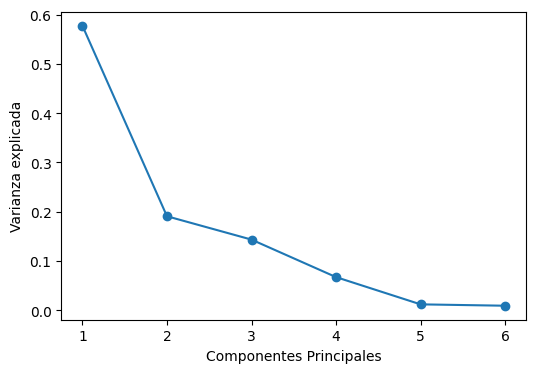

In [239]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

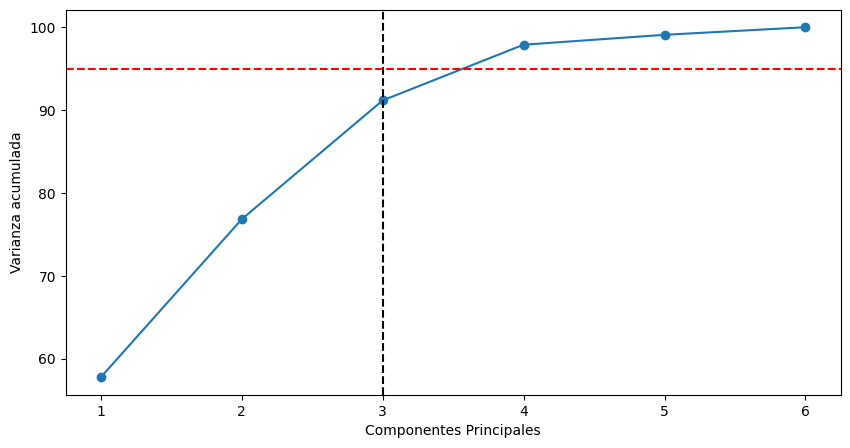

In [240]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

Con 3 componentes logramos explicar más del 90% de la varianza, por lo que nos quedaremos con esta reducción.

In [241]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0  1.548449 -1.719702  0.886537
1 -2.089184  0.829861 -0.773636
2  0.049686  0.696595  1.138651
3 -0.179013 -1.439758  0.770171
4  0.096875 -1.743363  0.155482

## Agrupamiento

Importamos librerías de agrupamiento.

In [242]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from pyclustertend import hopkins

ModuleNotFoundError: No module named 'yellowbrick'

Para el analisis de agrupamiento incorporaremos el precio

In [243]:
ds_agrupamiento = ds_reducido.copy()
ds_agrupamiento['property_price'] = ds_train.property_price
ds_agrupamiento

latitud   longitud  property_rooms  property_bedrooms  \
432209 -34.579459 -58.509449             4.0                3.0   
142141 -34.597240 -58.396295             1.0                1.0   
181613 -34.629933 -58.452190             3.0                2.0   
194510 -34.582420 -58.498516             3.0                2.0   
431358 -34.565938 -58.490112             3.0                2.0   
...           ...        ...             ...                ...   
53482  -34.587976 -58.412134             5.0                4.0   
366919 -34.616786 -58.389132             3.0                2.0   
398108 -34.552969 -58.460130             2.0                1.0   
184998 -34.592683 -58.376125             4.0                3.0   
25877  -34.584074 -58.422690             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  
432209                   120.0                      79.0        230000.0  
142141                    25.0                      25.0         68500.0  
181613                    68.0                      65.0        148500.0  
194510                    54.0                      54.0        119000.0  
431358                    76.0                      65.0        169900.0  
...                        ...                       ...             ...  
53482                    150.0                     141.0        339000.0  
366919                    63.0                      63.0        115000.0  
398108                    58.0                      42.0        168000.0  
184998                    96.0                      88.0        300000.0  
25877                     55.0                      55.0        170000.0  

[69677 rows x 7 columns]

In [ ]:
sns.pairplot(ds_agrupamiento, diag_kind='kde');

In [ ]:
hopkins(ds_agrupamiento, ds_agrupamiento.shape[0])

Para la estadística de Hopkins, un valor cercano a cero indica que la distribución es bastante uniforme y que hay poca tendencia al clustering.

Si bien es dificil identificar agrupamientos en estos gráficos, probaremos buscarlos mediante el uso de KMeans

#### Método de Elbow

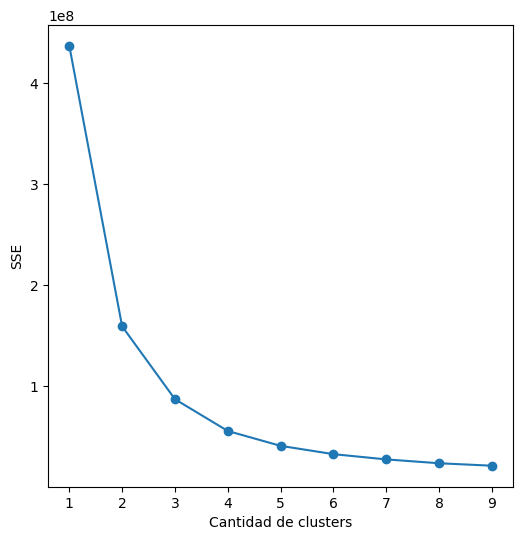

In [244]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_reducido)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Podemos ver que para 2 o 3 clusters la pendiente cambia de forma bastante significativa. Probaremos predicciones con KMeans para esas cantidades.

#### KMeans

In [245]:
kmeans = KMeans(2, random_state=0)
kmeans.fit(ds_reducido)

y_2_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters', index=ds_reducido.index)

In [246]:
y_2_clusters.value_counts()

0    60357
1     9320
Name: clusters, dtype: int64

In [ ]:
sns.pairplot(pd.concat([ds_agrupamiento, y_2_clusters], axis=1), hue='clusters');

In [247]:
kmeans = KMeans(3, random_state=0)
kmeans.fit(ds_reducido)

y_3_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters', index=ds_reducido.index)

In [ ]:
sns.pairplot(pd.concat([ds_agrupamiento, y_3_clusters], axis=1), hue='clusters');

Podemos ver como en varios de los graficos los datos se agrupan de la misma manera convirtiéndose en más caros a medida que crecen principialmente los ambientes y los metros cuadrados (superficie total y cubierta).

### Analisis de Silhouette

Realizaremos un analisis de Silhouette para evaluar la calidad de los clusters.

In [248]:
list_k = list(range(2, 5))
sse = []

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_agrupamiento)
    score = silhouette_score(ds_agrupamiento, preds)
    print(f"Para {n_clusters} el puntaje de Silhouette es " + str(score))

Para 2 el puntaje de Silhouette es 0.743580584157101
Para 3 el puntaje de Silhouette es 0.6574243379934509
Para 4 el puntaje de Silhouette es 0.6057987314038413


El mejor puntaje es el de 2 clusters. Cuanto más cerca de 1 mayor tendencia a agruparse. Evaluaremos la calidad de los clusters mediante el gráfico de silueta

#### Para 2 clusters

In [ ]:
model = KMeans(2, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(ds_agrupamiento)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_2_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

#### Para 3 clusters

In [ ]:
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')  # Instancio el visualizador
visualizer.fit(ds_agrupamiento)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_3_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

Luego de analizar los datos, vemos que en este dominio de problema se forman tres clusters a partir de la relacion de los ambientes y las habitaciones y la superifice total y cubierta. Es decir, vemos que se forman grupos con un precio acorde a a la cantidad de metros cuadrados que tenga la vivienda y a su vez, los metros cuadrados van a tener una estrecha correlacion con los metros cuadrados. Por ejemplo, dentro de un cluster podriamos encontrar un 2 ambientes con una habitacion de 70 metros cuadrados vendiendose a 70 usd.

## Clasificación

In [249]:
def precio_metro_cuadrado(dataset):
    pxm2 = dataset['property_price'] / dataset['property_surface_total']
    sorted_pxm2 = pxm2.sort_values(ascending=True)
    return (pxm2, sorted_pxm2)

(pxm2, sorted_pxm2) = precio_metro_cuadrado(ds_train)
pxm2.describe()

count    69677.000000
mean      2269.572458
std        692.835845
min        352.380952
25%       1792.452830
50%       2223.684211
75%       2707.182320
max       4278.846154
dtype: float64

Definiremos la variable tipo_precio con 3 valores posibles, alto, medio y bajo.

#### Primera variable (33% bajo, 33% medio, 33% alto)

La primera clasificación tiene que tener la misma cantidad de registros en las 3 diferentes categorias

In [250]:
def agregar_variable(dataset, categoria, nombre_categoria, pxm2, sorted_pxm2):
    nueva_categoria = pd.DataFrame()
    nueva_categoria['pxm2'] = sorted_pxm2
    nueva_categoria[nombre_categoria] = categoria
    dataset[nombre_categoria] = pxm2
    dataset[nombre_categoria] = nueva_categoria[nombre_categoria]
    return dataset

def imprimir_limites(dataset, categoria):
    valores_bajos = dataset[dataset[categoria]== 'Bajo']
    valores_medios = dataset[dataset[categoria] == 'Medio']
    valores_altos = dataset[dataset[categoria] == 'Alto']
    print(f'Minimo bajo: {valores_bajos.pxm2.min()}, Maximo bajo: {valores_bajos.pxm2.max()}')
    print(f'Minimo medio: {valores_medios.pxm2.min()}, Maximo medio: {valores_medios.pxm2.max()}')
    print(f'Minimo alto: {valores_altos.pxm2.min()}, Maximo alto: {valores_altos.pxm2.max()}')

In [251]:
ds_train['pxm2'] = pxm2
categoria = []
for i in range(0, len(sorted_pxm2) // 3):
    categoria.append('Bajo')
for i in range(len(sorted_pxm2) // 3, 2 * len(sorted_pxm2) // 3):
    categoria.append('Medio')
for i in range(2 * len(sorted_pxm2) // 3, len(sorted_pxm2)):
    categoria.append('Alto')

ds_train = agregar_variable(ds_train, categoria, 'clasificacion_1', pxm2, sorted_pxm2)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de la categoria 1'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

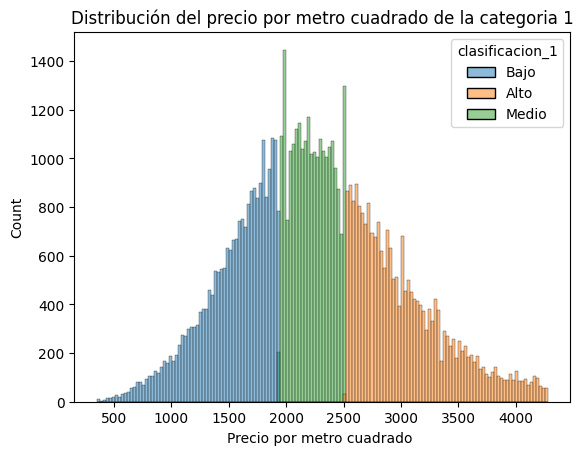

In [252]:
sns.histplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_1, bins=150).set(title='Distribución del precio por metro cuadrado de la categoria 1', xlabel='Precio por metro cuadrado ')

In [253]:
ds_train.clasificacion_1.value_counts()

Alto     23226
Medio    23226
Bajo     23225
Name: clasificacion_1, dtype: int64

In [254]:
imprimir_limites(ds_train,'clasificacion_1')

Minimo bajo: 352.3809523809524, Maximo bajo: 1943.0555555555557
Minimo medio: 1943.0555555555557, Maximo medio: 2523.804347826087
Minimo alto: 2523.809523809524, Maximo alto: 4278.846153846154


#### Segunda variable (25% bajo, 50% medio, 25% alto)

In [255]:
def separar_25_50_25(dataset):
    categoria = []
    for i in range(0, len(dataset) // 4):
        categoria.append('Bajo')
    for i in range(len(dataset) // 4, 3 * len(dataset) // 4):
        categoria.append('Medio')
    for i in range(3 * len(dataset) // 4, len(dataset)):
        categoria.append('Alto')

    return categoria

In [256]:
categoria = separar_25_50_25(ds_train)
ds_train = agregar_variable(ds_train, categoria, 'clasificacion_2', pxm2, sorted_pxm2)

[Text(0.5, 1.0, 'Distribución de las categorías en relación al precio por metro cuadrado'),
 Text(0.5, 0, 'Precio por metro cuadrado'),
 Text(0, 0.5, 'Cantidad')]

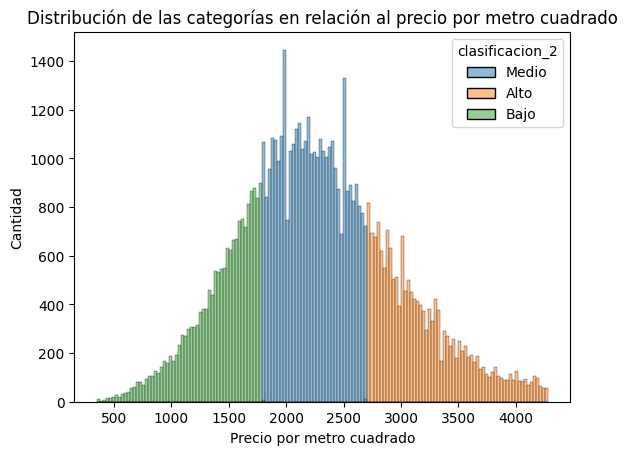

In [257]:
sns.histplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_2, bins=150).set(title='Distribución de las categorías en relación al precio por metro cuadrado', xlabel='Precio por metro cuadrado', ylabel='Cantidad')

In [258]:
ds_train.clasificacion_2.value_counts()

Medio    34838
Alto     17420
Bajo     17419
Name: clasificacion_2, dtype: int64

In [259]:
imprimir_limites(ds_train, 'clasificacion_2')

Minimo bajo: 352.3809523809524, Maximo bajo: 1792.4137931034484
Minimo medio: 1792.4528301886792, Maximo medio: 2707.182320441989
Minimo alto: 2707.182320441989, Maximo alto: 4278.846153846154


#### Tercera variable (25-50-25 por tipo de propiedad)

##### Casas

In [260]:
casas = ds_train[ds_train.property_type == 'Casa'].copy()
dptos = ds_train[ds_train.property_type == 'Departamento'].copy()
phs = ds_train[ds_train.property_type == 'PH'].copy()

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

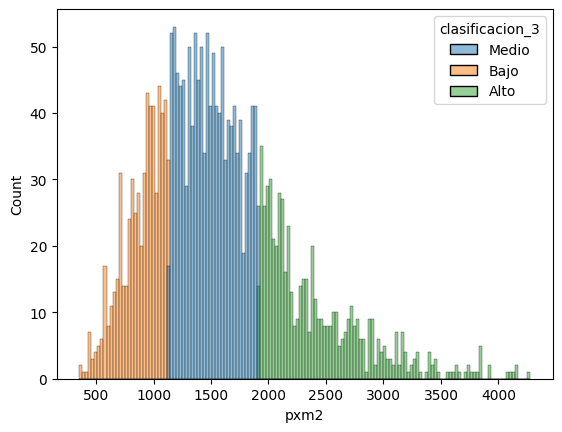

In [261]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(casas)
categoria = separar_25_50_25(casas)
casas = agregar_variable(casas, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=casas, x=casas.pxm2, hue=casas.clasificacion_3, bins=150)

##### Departamentos

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

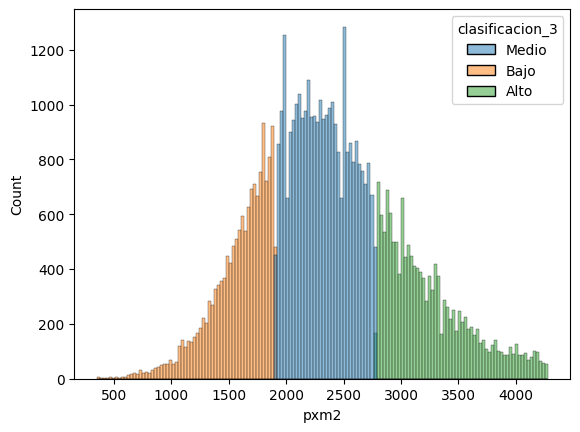

In [262]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(dptos)
categoria = separar_25_50_25(dptos)
dptos = agregar_variable(dptos, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=dptos, x=dptos.pxm2, hue=dptos.clasificacion_3, bins=150)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de departamentos'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

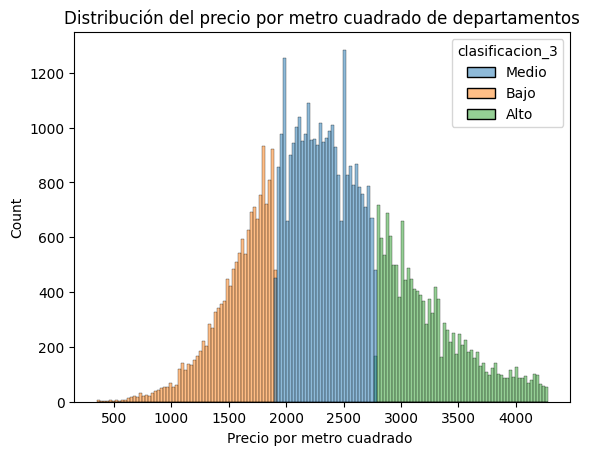

In [263]:
sns.histplot(data=dptos, x=dptos.pxm2, hue=dptos.clasificacion_3, bins=150).set(title='Distribución del precio por metro cuadrado de departamentos', xlabel='Precio por metro cuadrado ')

##### PH

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

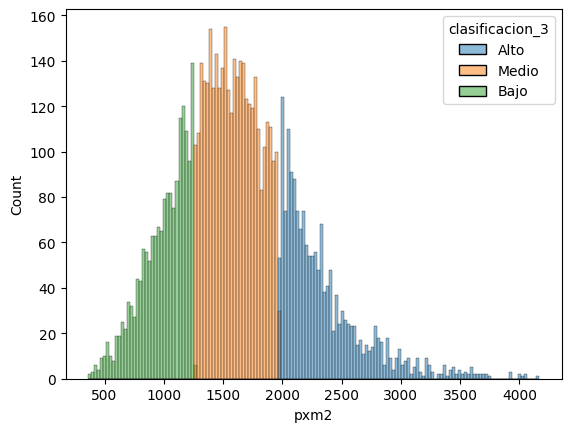

In [264]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(phs)
categoria = separar_25_50_25(phs)
phs = agregar_variable(phs, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=phs, x=phs.pxm2, hue=phs.clasificacion_3, bins=150)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de Phs'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

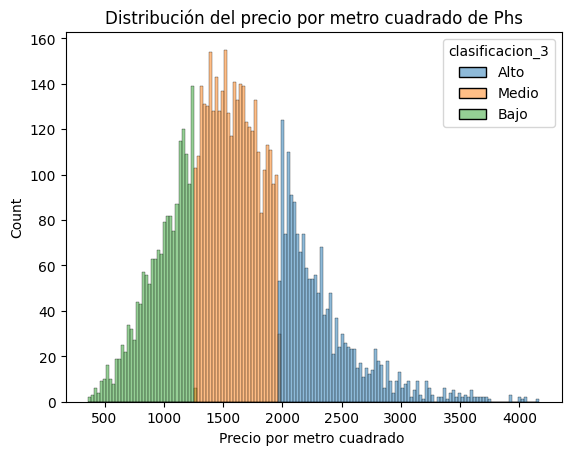

In [265]:
sns.histplot(data=phs, x=phs.pxm2, hue=phs.clasificacion_3, bins=150).set(title='Distribución del precio por metro cuadrado de Phs', xlabel='Precio por metro cuadrado ')

##### Union de las 3 al dataset

In [266]:
nueva_categoria = pd.concat([casas,dptos, phs])
ds_train['clasificacion_3'] = nueva_categoria['clasificacion_3']

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de toda propiedad'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

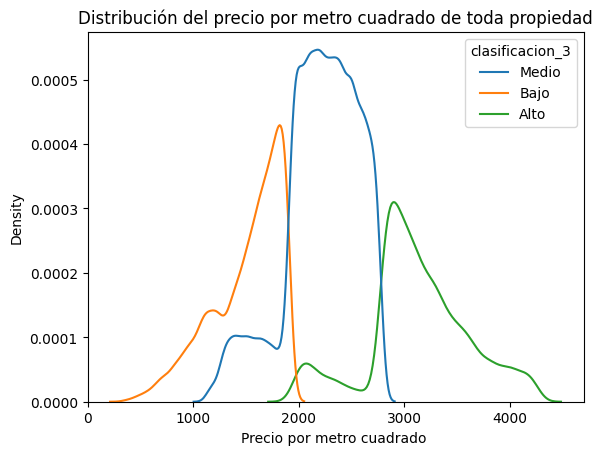

In [267]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_3).set(title='Distribución del precio por metro cuadrado de toda propiedad', xlabel='Precio por metro cuadrado ')

In [268]:
ds_train.clasificacion_3.value_counts()

Medio    34839
Alto     17420
Bajo     17418
Name: clasificacion_3, dtype: int64

##### Distribución del precio por metro cuadrado

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado'),
 Text(0.5, 0, 'Precio por metro cuadrado de departamentos')]

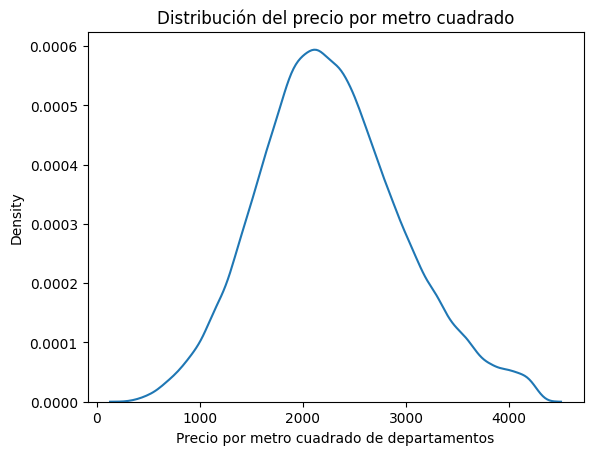

In [269]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2).set(title='Distribución del precio por metro cuadrado', xlabel='Precio por metro cuadrado de departamentos')

##### Distribución del precio por metro cuadrado por tipo de propiedad

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de cada tipo de propiedad'),
 Text(0.5, 0, 'Precio por metro cuadrado')]

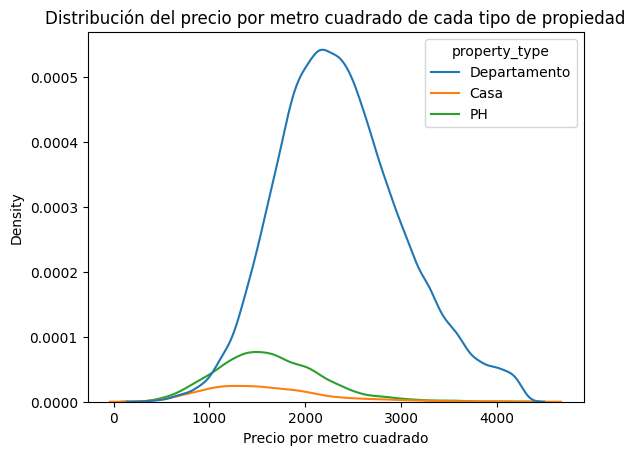

In [270]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.property_type).set(title='Distribución del precio por metro cuadrado de cada tipo de propiedad', xlabel='Precio por metro cuadrado')

#### Conclusión

Viendo como el precio por metro cuadrado de departamentos es mayor al de casas y phs tiene sentido el tomar la tercera variable por sobre las otras 2. Ya que caso contrario la categorización de las casas y phs se vería contaminada por el de los departamentos, ya que algunos casos de casas que serían caras por si mismas terminan siendo de precio medio ya que el mismo número para los
departamentos no es caro.

In [282]:
ds_train.drop(axis=1, columns=['clasificacion_1', 'clasificacion_2'], inplace=True)
ds_train.rename(columns= {'clasificacion_3':'tipo_precio'}, inplace=True)

KeyError: "['clasificacion_1', 'clasificacion_2'] not found in axis"

#### Construccion de la variable en Test

In [283]:
ds_test['pxm2'] = ds_test['property_price'] / ds_test['property_surface_total']

In [284]:
lista_tipo_precio_test = []
for registro in ds_test.itertuples():
    #print(registro.Index)
    if registro.property_type == 'Casa':
        if registro.pxm2 < casas[casas['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > casas[casas['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'Departamento':
        if registro.pxm2 < dptos[dptos['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > dptos[dptos['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'PH':
        if registro.pxm2 < phs[phs['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > phs[phs['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')




In [285]:
len(lista_tipo_precio_test)

11069

In [286]:
len(ds_test)

11069

In [287]:
ds_test['tipo_precio'] = pd.Series(data=lista_tipo_precio_test, name='tipo_precio', index=ds_test.index)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado en el dataset de testeo'),
 Text(0.5, 0, 'Precio por metro cuadrado')]

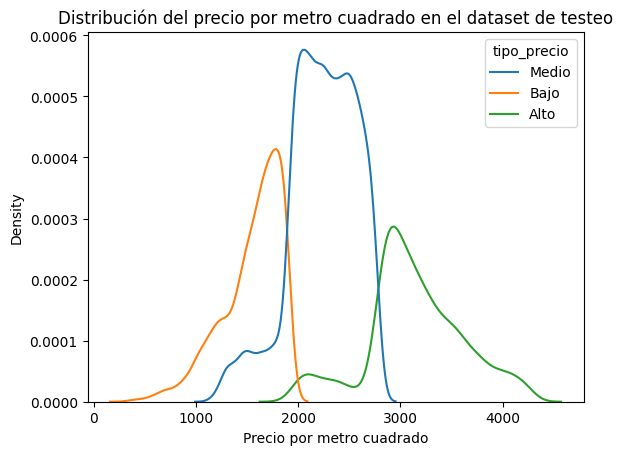

In [288]:
sns.kdeplot(data=ds_test, x=ds_test.pxm2, hue=ds_test.tipo_precio).set(title='Distribución del precio por metro cuadrado en el dataset de testeo', xlabel='Precio por metro cuadrado')

#### Comparación con los resultados de Kmeans

In [289]:
copia_3_clusters = y_3_clusters.copy()
copia_3_clusters.replace(to_replace=0, value='Medio', inplace= True)
copia_3_clusters.replace(to_replace=1, value='Bajo', inplace= True)
copia_3_clusters.replace(to_replace=2, value='Alto', inplace= True)
ds_comparacion = pd.concat([ds_train, copia_3_clusters], axis=1)
print(f"Porcentaje de semejanza de clusters: {round(len(np.where(ds_comparacion.tipo_precio == ds_comparacion.clusters)[0]) / len(ds_comparacion) * 100, 2)} %")

Porcentaje de semejanza de clusters: 46.05 %


In [290]:
y_3_clusters.value_counts()

0    50800
2    15297
1     3580
Name: clusters, dtype: int64

Vemos que el porcentaje no parece ser lo suficientemente alto (Tomando el cluster más chico como el 'Alto', el más grande como el 'Medio' y como bajo el tercero, siendo esta la combinación que mejor porcentaje de semejanza da con 45,9 %) como para intuir que están relacionados los clusters.
Vamos a recrear uno de los gráficos hechos arriba de precio total contra superficie esta vez coloreando la clasificación de precio en vez a ver si los graficos se parecen.

[Text(0.5, 1.0, 'Analisis del tipo de precio en relacion al precio total y la superficie'),
 Text(0.5, 0, 'Superficie total'),
 Text(0, 0.5, 'Precio de la propiedad')]

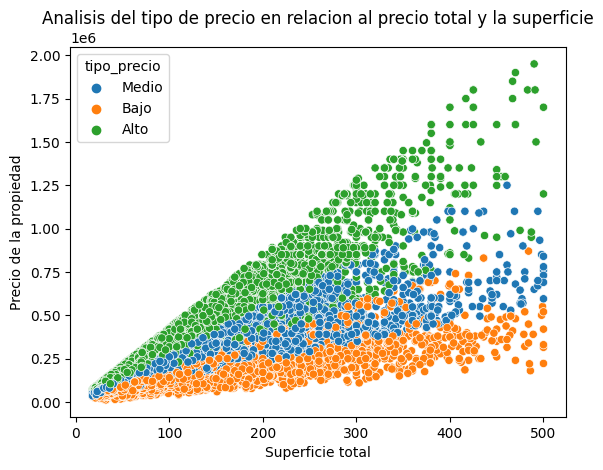

In [291]:
sns.scatterplot(data=ds_train, x=ds_train.property_surface_total, y=ds_train.property_price, hue=ds_train.tipo_precio).set(title='Analisis del tipo de precio en relacion al precio total y la superficie', xlabel='Superficie total', ylabel= 'Precio de la propiedad')

En efecto comparando el gráfico de tipo_precio con el de clusters de superficie total contra precio vemos que se tratan de 2 clasificaciones diferentes

NameError: name 'barrios' is not defined

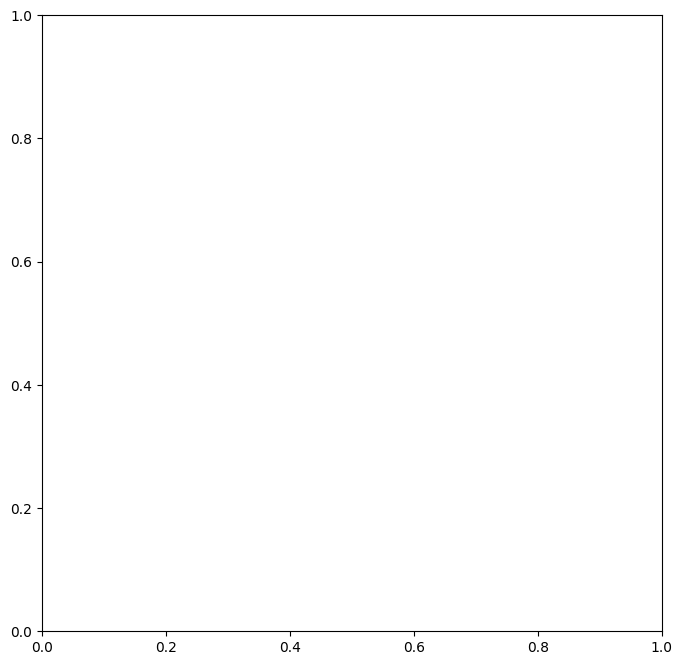

In [292]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=ds_train['tipo_precio'])

ax.set(title='Avisos en CABA segun tipo_precio')
plt.show()

## Arbol de Decision - Clasificacion

En esta etapa, a la hora de crear el dataset con el cual vamos a predecir, tenemos que asegurarnos de borrar todas las variables que tengan una implicancia con el precio.

Factorizamos el tipo de precio para que pueda ser una variable numerica y podamos entrenar el modelo. 
No optamos por usar one hot encoding ya que sino tendriamos 3 variables de target y es muy dificil predecir y mantener todos esos valores.

In [336]:
#Creo un dataset con los features que voy a usar para clasificar
ds_train_x = ds_train.drop(['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price', 'pxm2', 'tipo_precio'], axis=1)

#Creo un dataset con la variable target
ds_train_y = pd.Series(pd.factorize(ds_train.tipo_precio)[0], index=ds_train.index)

#Genero los conjuntos de train y de test (proporcion 80/20)
x_train, x_test, y_train, y_test = train_test_split(ds_train_x, ds_train_y, test_size=0.2, random_state=2) #semilla


In [337]:
#Creamos un clasificador
tree_model = tree.DecisionTreeClassifier()

#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

In [338]:
#Obtenemos la maxima profundidad del arbol para luego evaluar hiperparametros
tree_model.get_depth()

41

In [339]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)

In [340]:
#Valores Predichos
y_pred

array([2, 2, 1, ..., 2, 2, 0])

In [341]:
#Valores Reales
y_test.values

array([2, 2, 0, ..., 0, 0, 2])

In [342]:
#Probamos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test, y_pred),columns=['test','pred'])
ds_resultados.head()

test  pred
0     2     2
1     2     2
2     0     1
3     2     2
4     0     0

Text(37.08333333333333, 0.5, 'True')

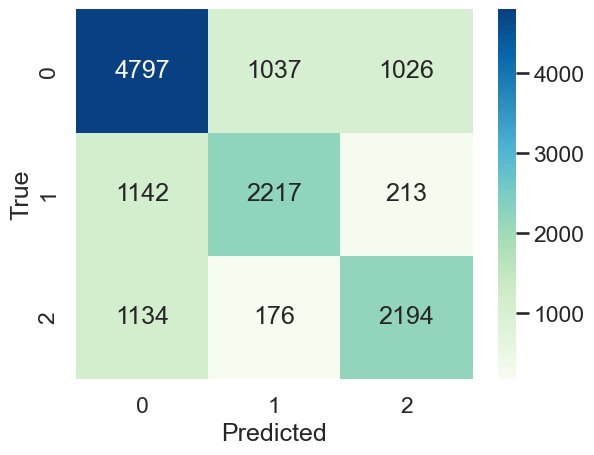

In [343]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [344]:
#Calculo las métricas en el conjunto de evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      6860
           1       0.65      0.62      0.63      3572
           2       0.64      0.63      0.63      3504

    accuracy                           0.66     13936
   macro avg       0.65      0.65      0.65     13936
weighted avg       0.66      0.66      0.66     13936



In [345]:
#Realizamos una predicción sobre el set de train
x_pred = model.predict(x_train)

In [346]:
#Calculo las métricas en el conjunto de train
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27979
           1       0.99      0.96      0.97     13846
           2       0.99      0.96      0.97     13916

    accuracy                           0.97     55741
   macro avg       0.98      0.97      0.97     55741
weighted avg       0.97      0.97      0.97     55741



Como podemos observar, el conjunto de datos esta overfitteando. Mas adelante buscaremos mejores hiper parametros y podaremos el arbol para obtener mejores resultados y para poder cortar este overfitting.

In [347]:
model.classes_

array([0, 1, 2])

#### Grafico del arbol de decision

Realizamos un grafico del arbol entero, es decir, el arbol que venimos previamente analizado no sufrio ninguna modificacion ni ningun recorte. A partir de este arbol base vamos a tratar de buscar mejores resultados. Primero vemos un grafico para ver como luce el arbol. Elegimos un max_depth = 2 para mostrar una porcion representativa ya que el arbol es muy grande.

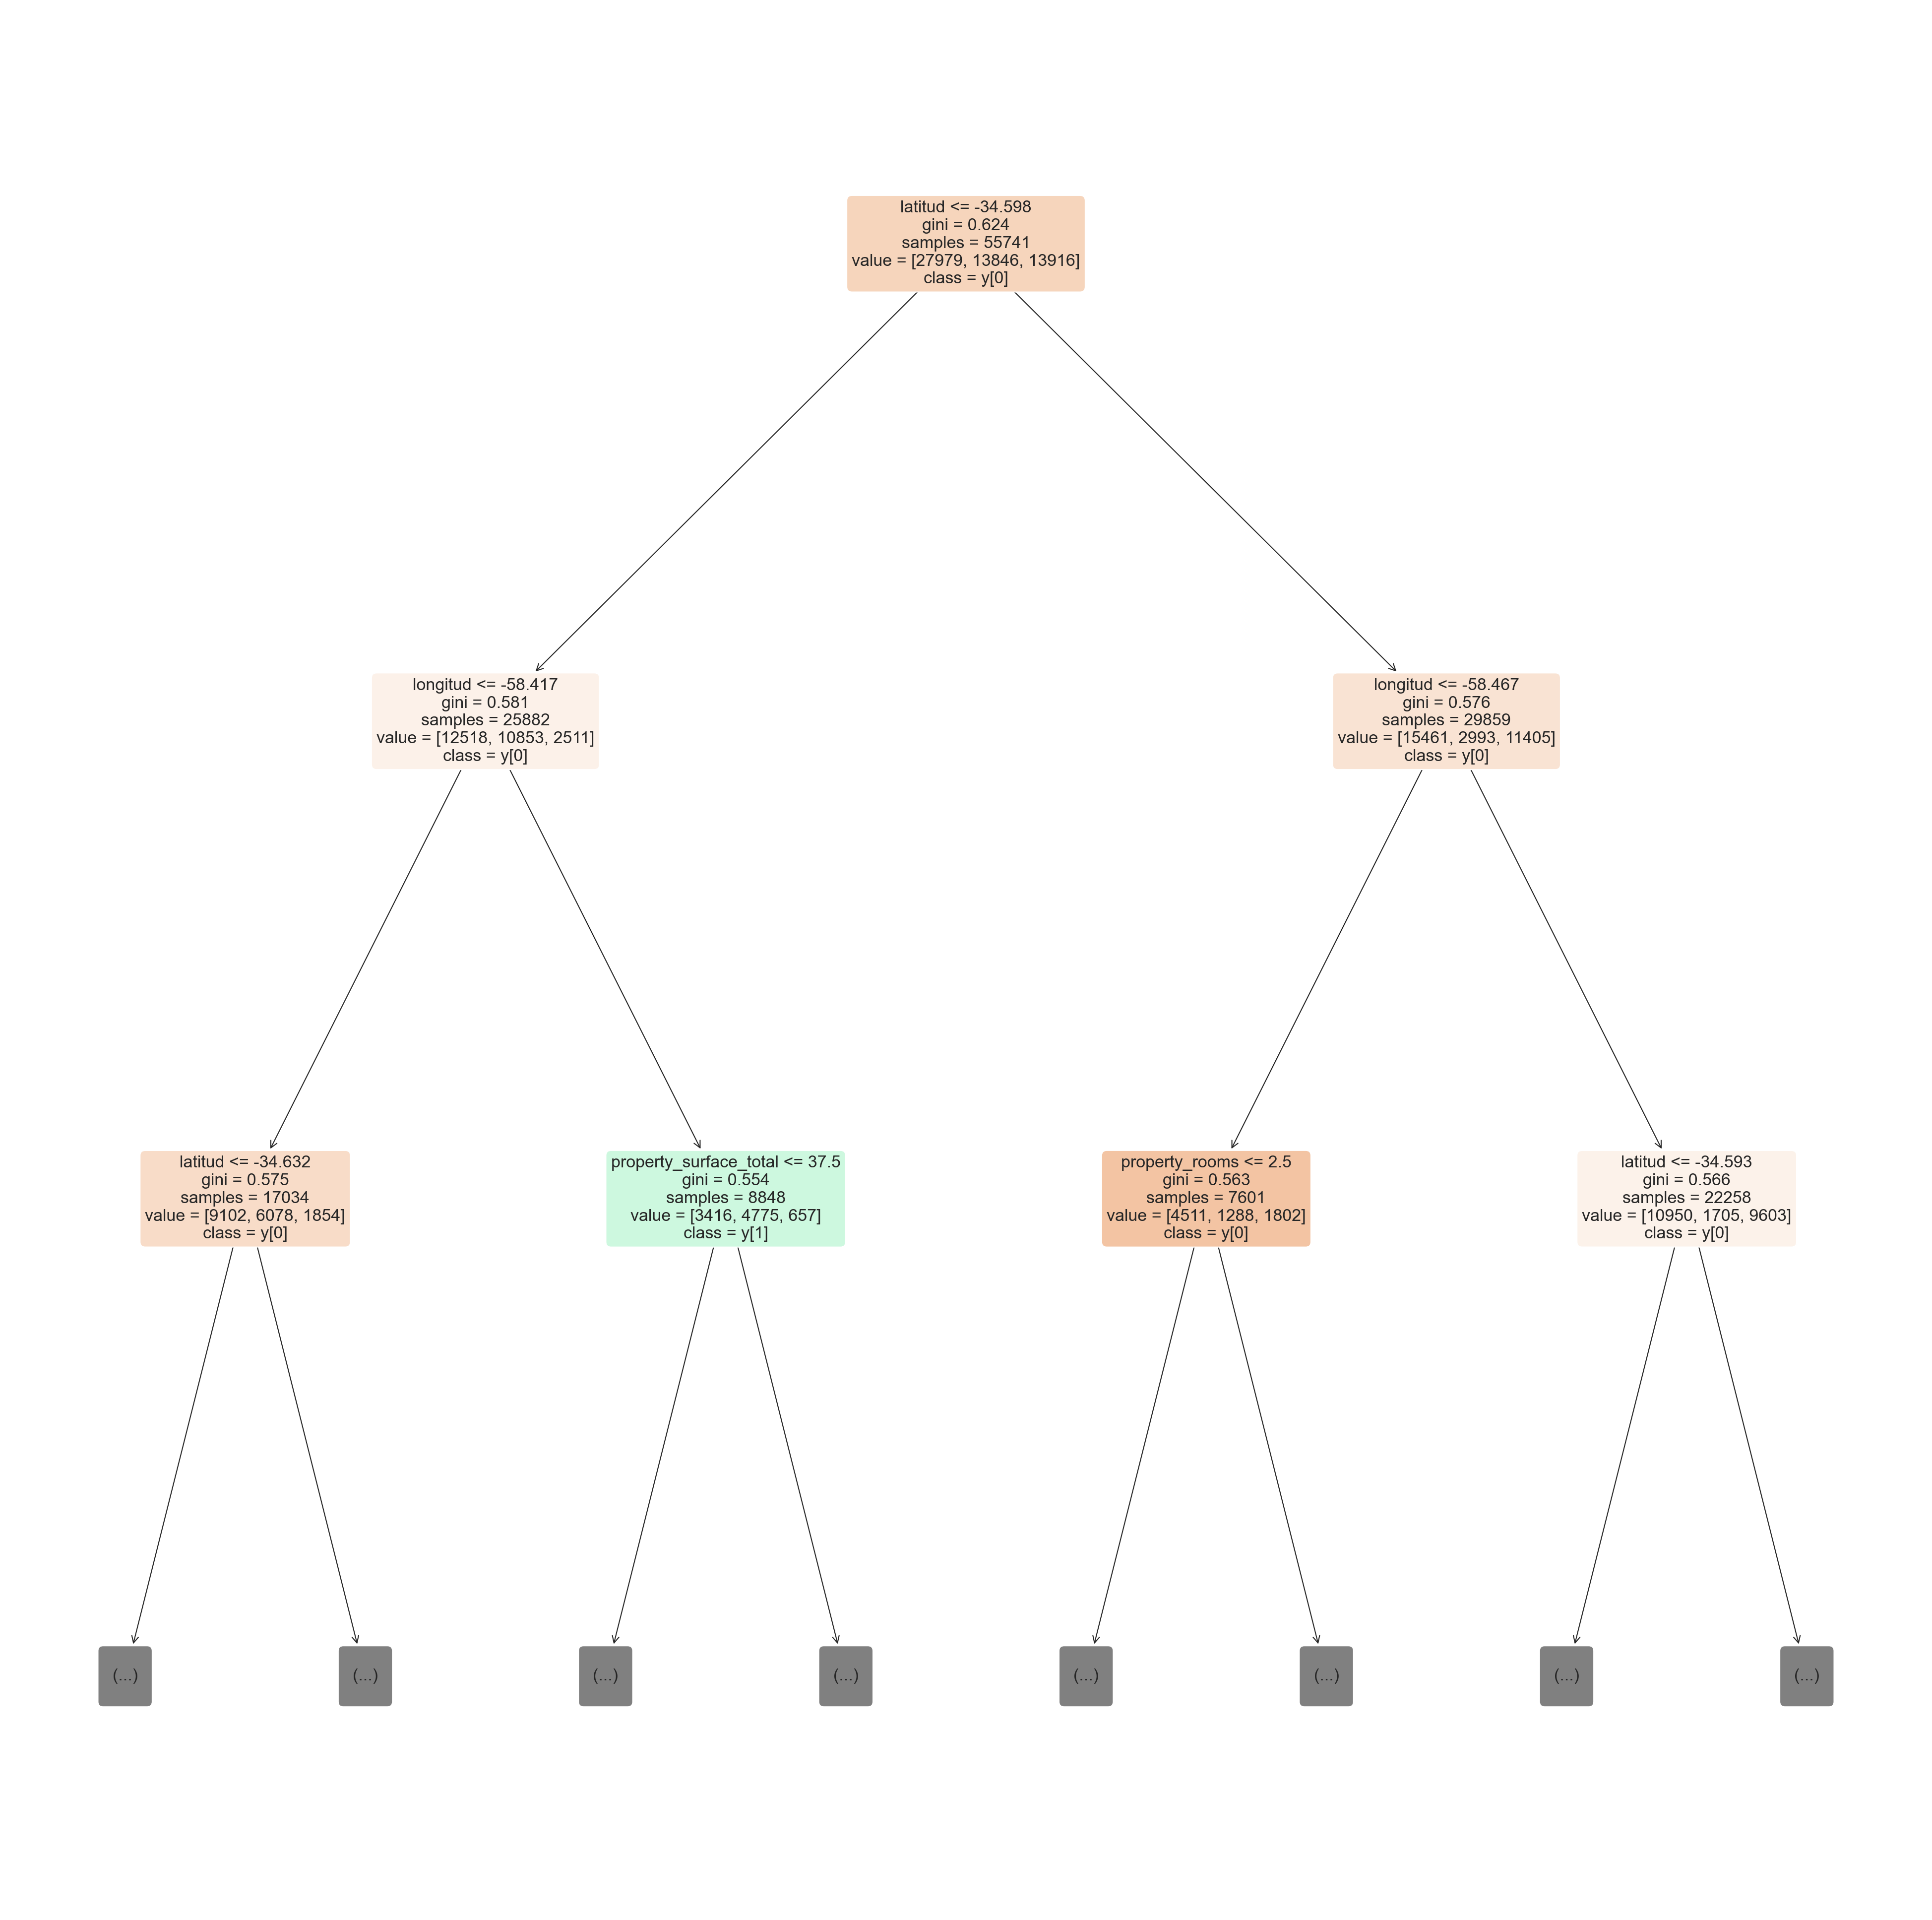

In [348]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(model,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

#### Importancia de atributos

Mientras mas alto, mayor es la importancia. Dicho esto notamos que la ayor relevancia pareceria tenerla la latitud. Tendremos que entender despues por que ese atributo predice mejor el tipo de precio.

In [349]:
sorted(list(zip(ds_train_x.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.34026512026420735),
 ('longitud', 0.26817776088105555),
 ('property_surface_total', 0.17877070930207412),
 ('property_surface_covered', 0.15791313742094565),
 ('property_rooms', 0.03413382624890695),
 ('property_bedrooms', 0.02073944588281042)]

Notamos que el atributo con mayor importancia pareceria ser a priori la latitud.

#### Poda

A medida que aumenta el alfa, se poda una mayor parte del árbol, lo que aumenta la impureza total de sus hojas.

El arbol tenia un maximo de profundidad de 41, recortamos este valor a la mitad para proseguir con la poda.

In [397]:
#Creo un clasificador 
arbol_poda = tree.DecisionTreeClassifier(max_depth = 20, random_state=2)

#Entreno un modelo
model_poda = arbol_poda.fit(X = x_train, y = y_train)

#Hago una predicción
y_pred_poda = model_poda.predict(x_test)

#Visualizo los resultados en un dataframe
ds_resultados_poda=pd.DataFrame(zip(y_test,y_pred_poda),columns=['test','pred'])
ds_resultados_poda.head()

test   pred
0   Bajo   Bajo
1   Bajo   Bajo
2   Alto   Alto
3  Medio  Medio
4  Medio  Medio

Text(37.08333333333333, 0.5, 'True')

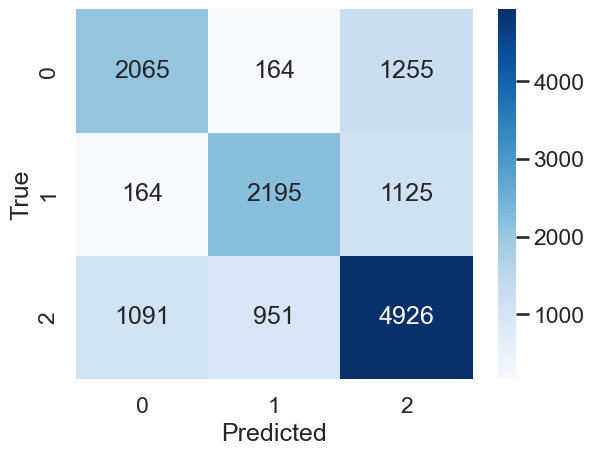

In [399]:
#Creo matriz de confusión
tabla=confusion_matrix(y_test,y_pred_poda)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

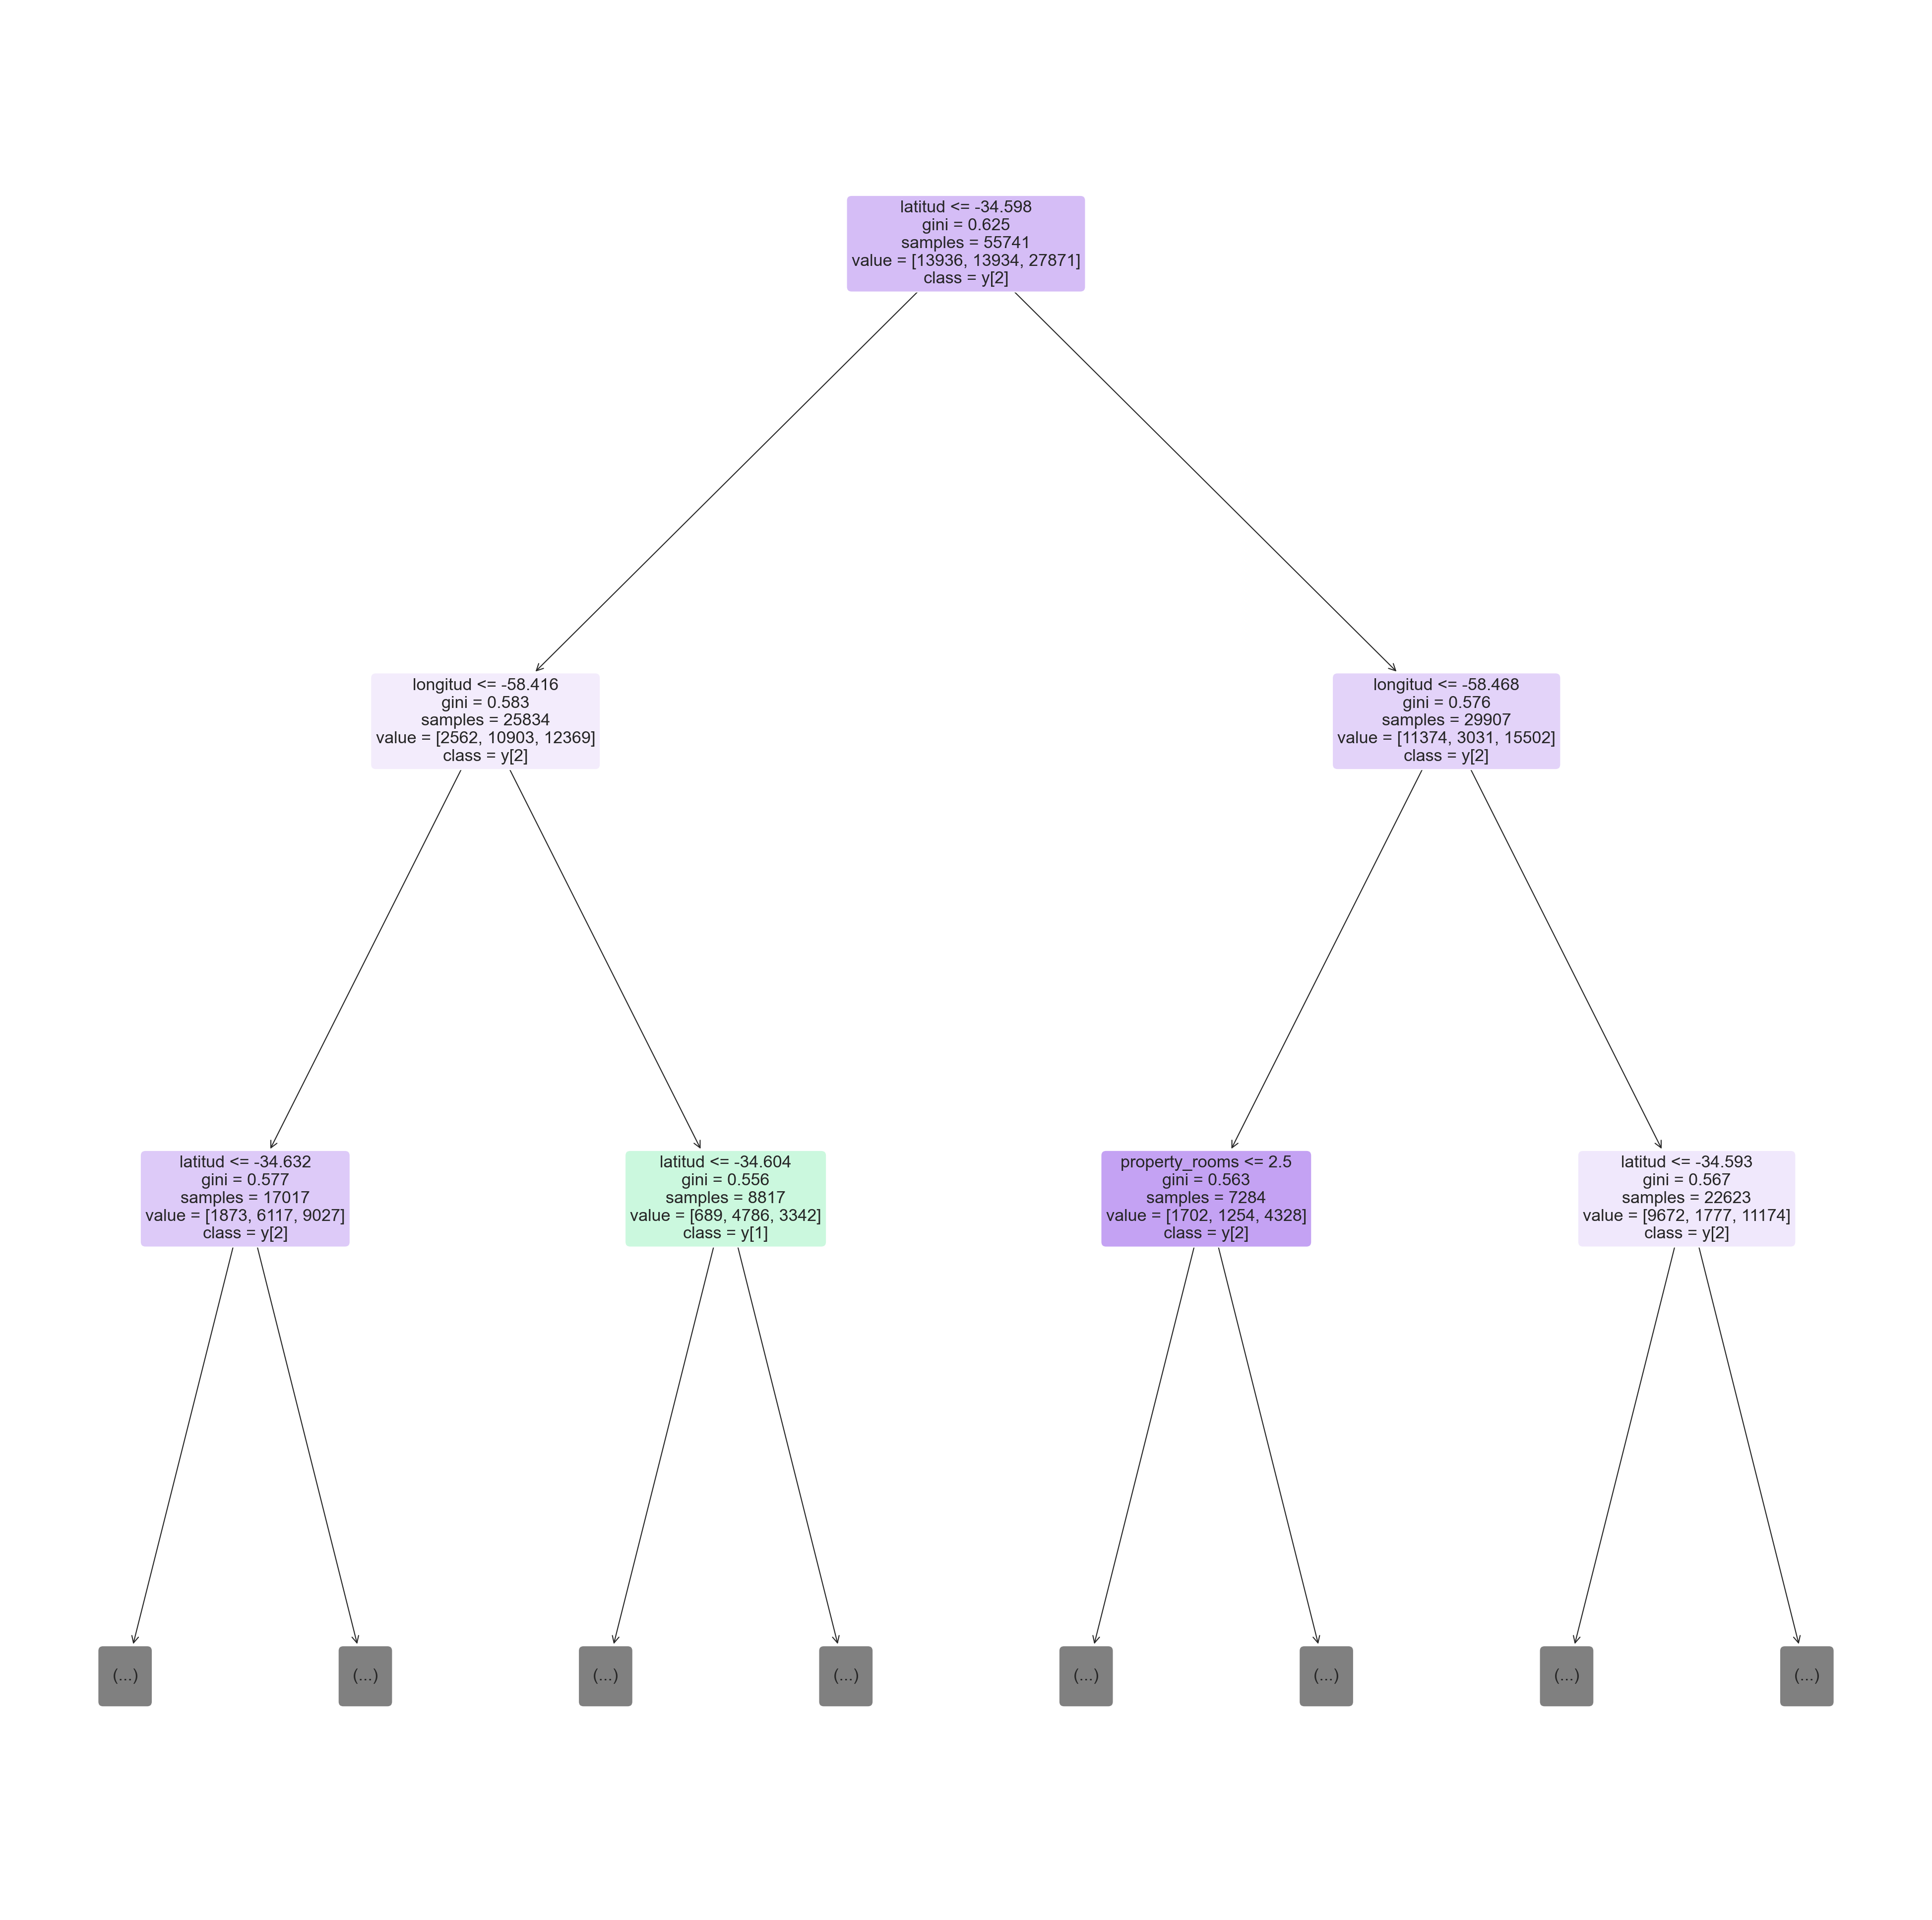

In [400]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(model_poda,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

In [401]:
#Calculo las métricas en el conjunto de evaluación
print(classification_report(y_test, y_pred_poda))

              precision    recall  f1-score   support

        Alto       0.62      0.59      0.61      3484
        Bajo       0.66      0.63      0.65      3484
       Medio       0.67      0.71      0.69      6968

    accuracy                           0.66     13936
   macro avg       0.65      0.64      0.65     13936
weighted avg       0.66      0.66      0.66     13936



In [364]:
#Realizamos una predicción sobre el set de train
x_pred = model.predict(x_train)
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27979
           1       0.99      0.96      0.97     13846
           2       0.99      0.96      0.97     13916

    accuracy                           0.97     55741
   macro avg       0.98      0.97      0.97     55741
weighted avg       0.97      0.97      0.97     55741



Luego de realizada la poda, notamos que se nos redujeron los datos de test un 0,1 (de 0,66 a 0,65) pero, los valores de train se mantuvieron igual (0,97).

El arbol todavia esta overfitteando aunque este podado.

La idea es tratar de mejorar el valor de train, probaremos con Random Search para que nos encuentre los mejores hiper parametros dentro de lo que le mandemos al arbol.

In [402]:
features = ['latitud', 'longitud', 'property_rooms', 'property_bedrooms','property_surface_total', 'property_surface_covered']
target = 'tipo_precio'

In [403]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ds_train[features].values, 
                                                    ds_train[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_train[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 55741
# Datos Prueba: 13936
% Positivos Entrenamiento: 25.001
% Positivos Prueba: 25.000


¿Cómo buscar la mejor combinación de hiperparámetros?

Exploramos un espacio de búsqueda, usando k-fold CV para medir el desempeño de cada combinación.
Al terminar, nos quedamos con la combinación con
mejor desempeño y entrenamos un único modelo usando todos los datos de train.

#### KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos e hiperparametros)

In [404]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=10 

#Conjunto de parámetros que quiero usar
params_grid = {
    'criterion':['gini','entropy'],
    'max_depth':list(range(11,31)), 
    'max_features':["auto", "sqrt", "log2"],
    'min_samples_leaf':list(range(1,9)),
    'ccp_alpha':np.linspace(0,0.05,n)
}

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier(random_state=4) #semilla

#Metrica que quiero optimizar Accuracy Score (porque no tenemos datos binarios)
scorer_fn = make_scorer(sk.metrics.accuracy_score)


#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=2) #semilla

#Busco los hiperparamtros que optimizan Accuracy Score
randomcv.fit(x_train,y_train);

In [405]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 29, 'criterion': 'gini', 'ccp_alpha': 0.0}


In [406]:
#Mejor métrica
print(randomcv.best_score_)

0.6080265122627213


In [407]:
randomcv.cv_results_['mean_test_score']

array([0.50000897, 0.50725691, 0.50000897, 0.50000897, 0.50856656,
       0.50000897, 0.60802651, 0.50000897, 0.50000897, 0.50000897])

In [408]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps, features)):
  if feat_imp > 0:
    print('{}: {}'.format(feat,feat_imp))

property_bedrooms: 0.01676938298279424
property_rooms: 0.030493180219537463
property_surface_covered: 0.15540730733160724
property_surface_total: 0.16860213029070586
longitud: 0.27339155771492357
latitud: 0.35533644146043164


Notamos que la latitud sigue siendo el atributo mas importante

#### Predicción y Evaluación del Modelo con mejores hiperparámetros

In [410]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol = DecisionTreeClassifier(random_state=3).set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
mejores_hiper_arbol = arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(features))
#print(reglas)

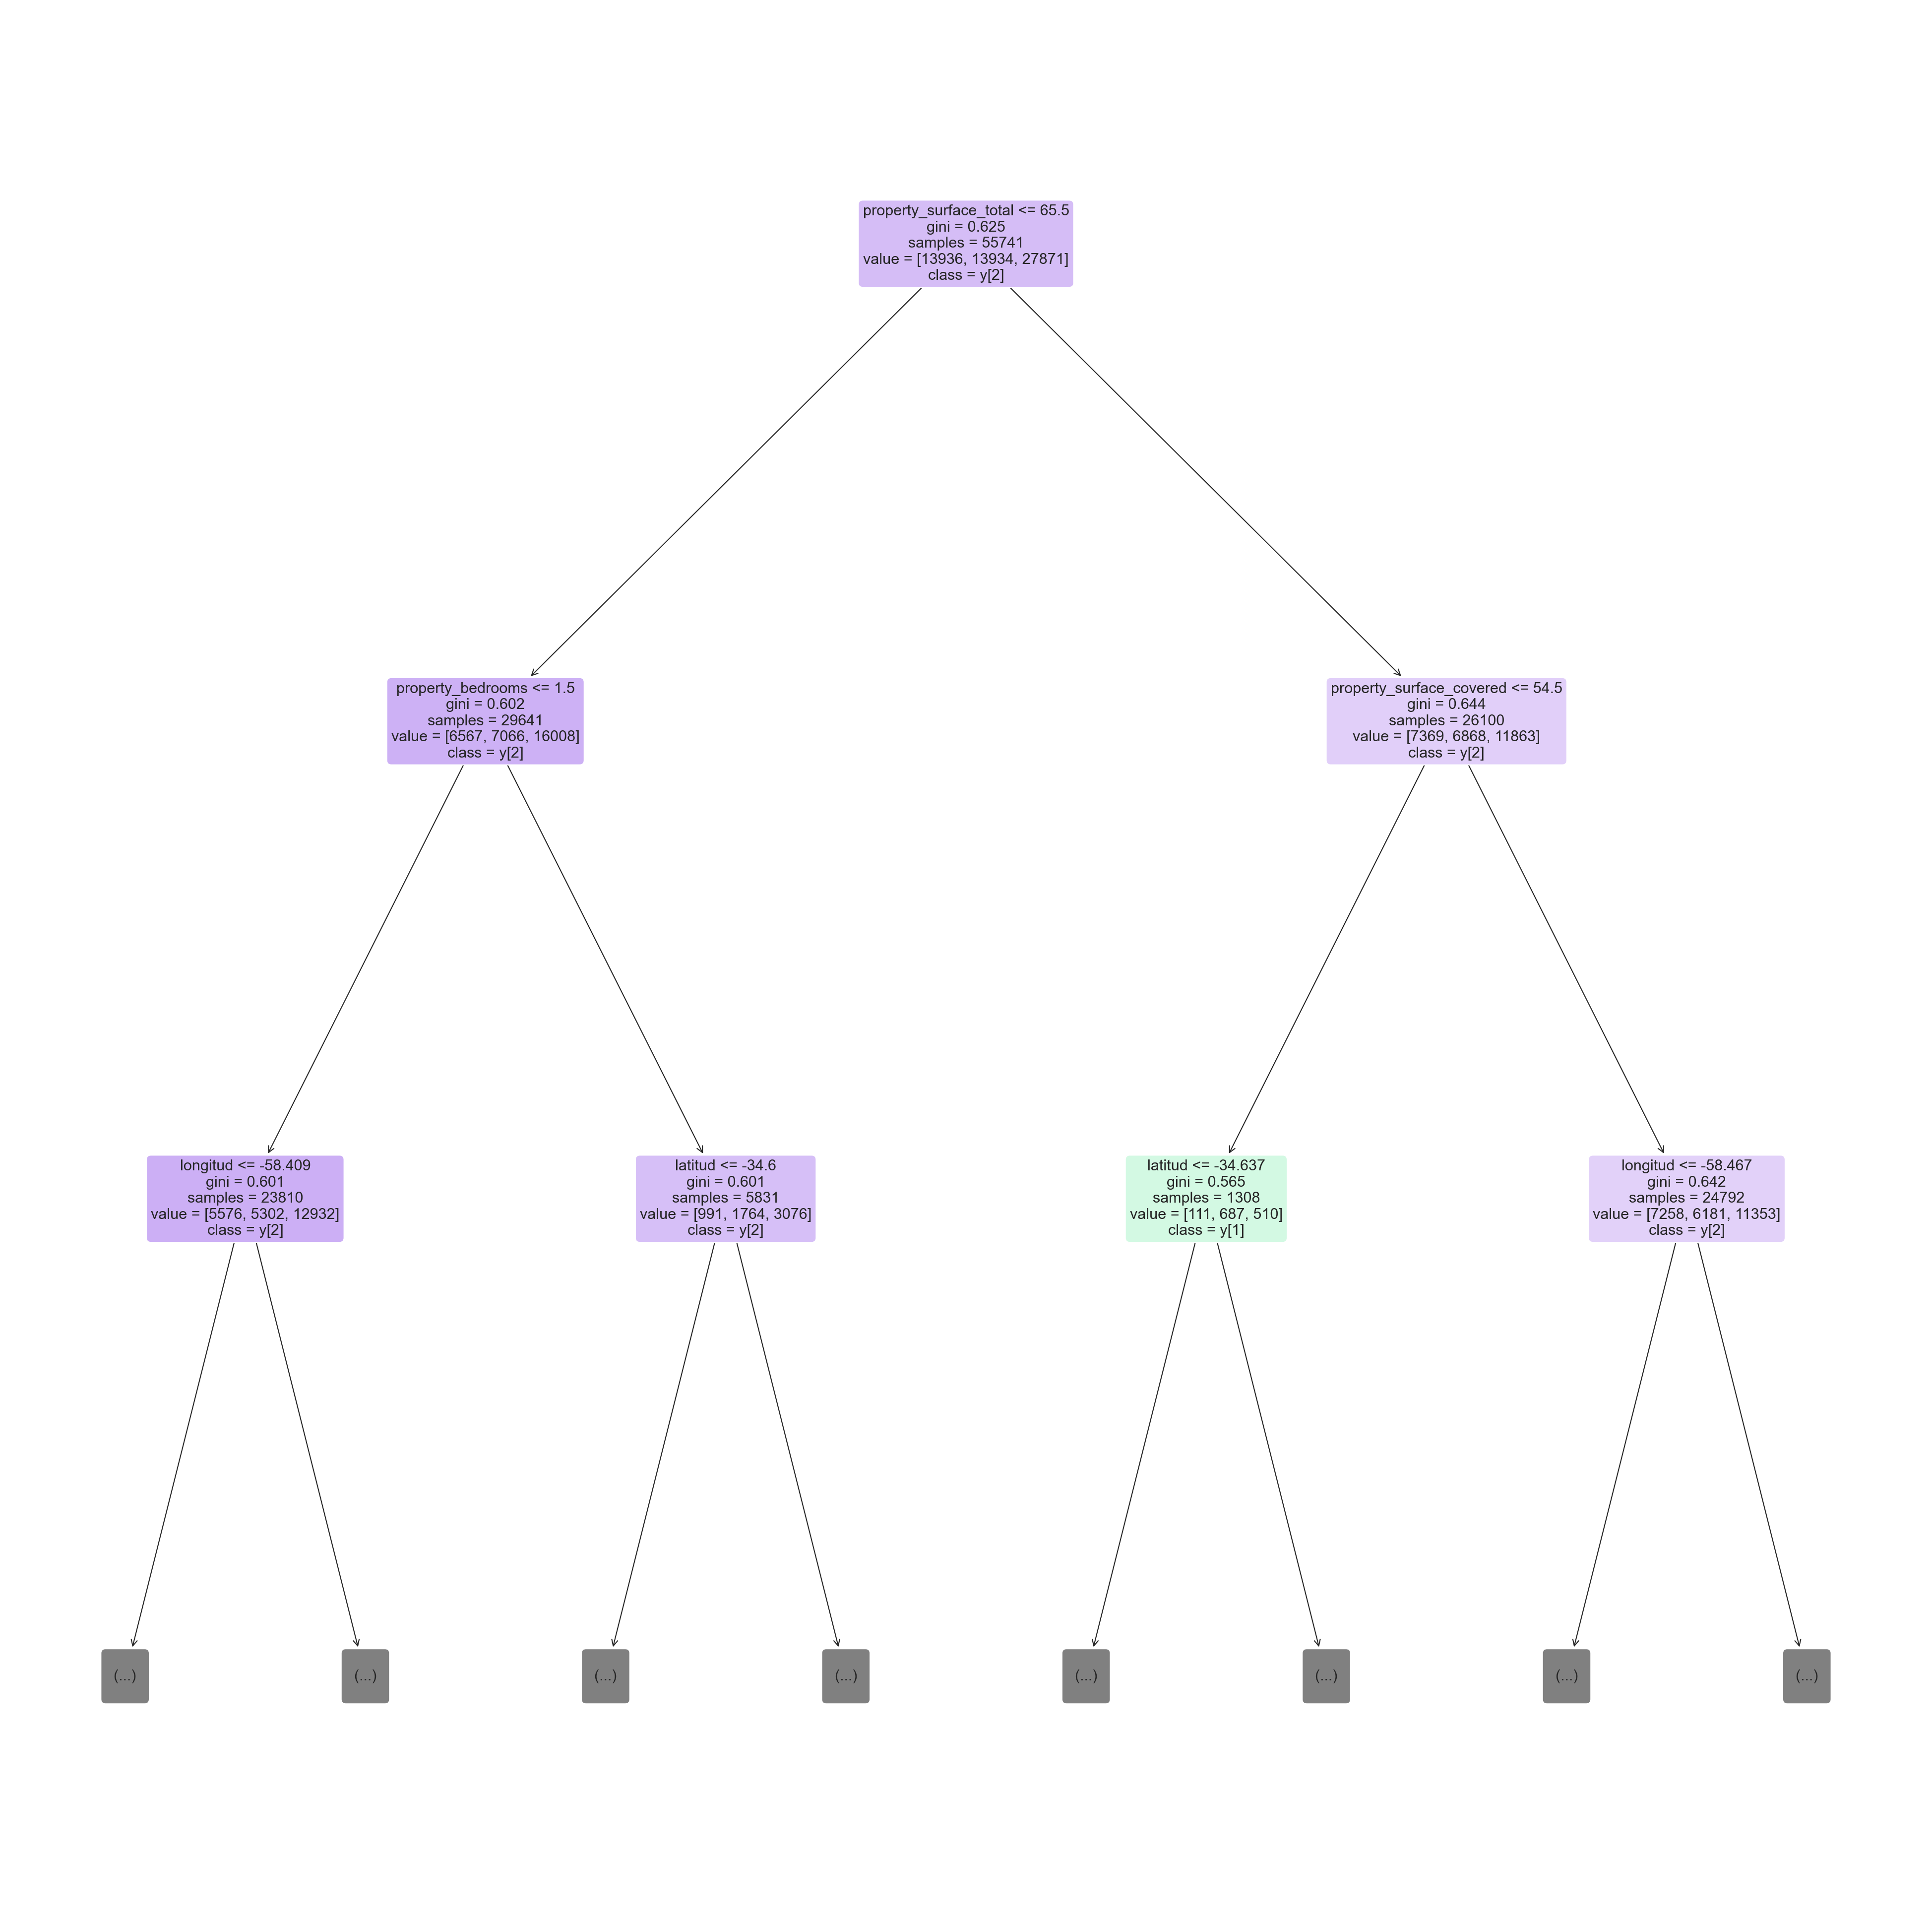

In [411]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(mejores_hiper_arbol,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

Notemos como ahora, luego de mejorados los hiper parametros, el arbol que obtenemos obtiene como valor mas importante la superifice total cubierta y a partir de eso se toman decisiones.

Accuracy-Score: 0.6183266360505166


Text(37.08333333333333, 0.5, 'True')

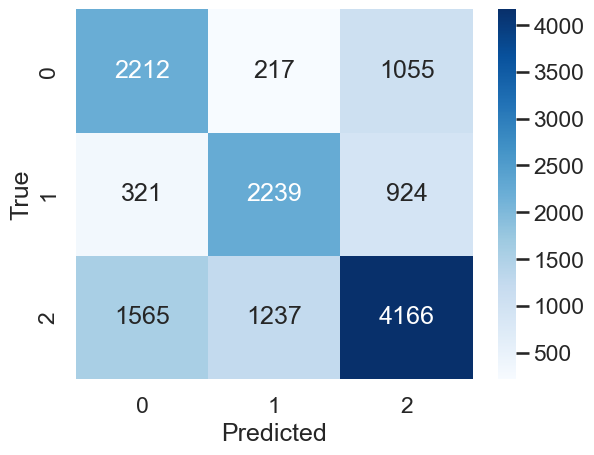

In [437]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score

#Hago predicción sobre el set de evaluacion
y_pred = mejores_hiper_arbol.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print('Accuracy-Score: {}'.format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

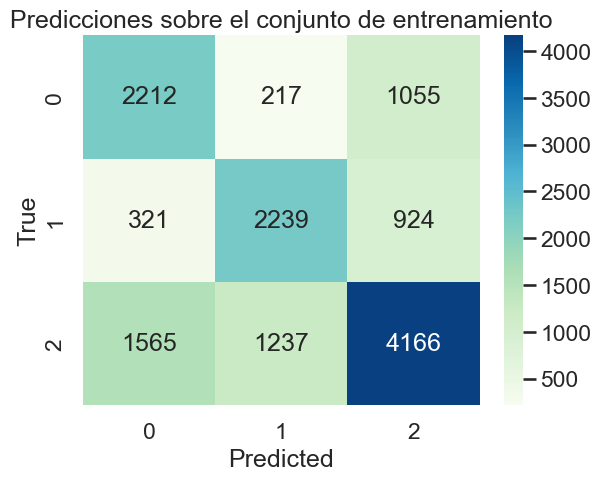

In [413]:
tabla = confusion_matrix(y_test, y_pred)
sns.heatmap(tabla, cmap='GnBu', annot=True, fmt='g', ).set(title='Predicciones sobre el conjunto de entrenamiento')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [414]:
y_pred_new = best_tree.predict(x_train)

metrics = classification_report(y_train, y_pred_new)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.79      0.90      0.84     13936
        Bajo       0.83      0.86      0.85     13934
       Medio       0.90      0.83      0.86     27871

    accuracy                           0.85     55741
   macro avg       0.84      0.86      0.85     55741
weighted avg       0.86      0.85      0.85     55741



In [415]:
y_pred_new2 = best_tree.predict(x_test)

metrics = classification_report(y_test, y_pred_new2)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.56      0.64      0.60      3484
        Bajo       0.61      0.64      0.62      3484
       Medio       0.68      0.61      0.65      6968

    accuracy                           0.63     13936
   macro avg       0.62      0.63      0.62     13936
weighted avg       0.63      0.63      0.63     13936



In [416]:
mejores_hiper_arbol.predict_proba(x_test)[0:10]

array([[0.        , 0.8       , 0.2       ],
       [0.        , 0.        , 1.        ],
       [0.25      , 0.5       , 0.25      ],
       [0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 1.        ],
       [0.5       , 0.        , 0.5       ],
       [0.        , 1.        , 0.        ],
       [0.66666667, 0.        , 0.33333333],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ]])

#### Entrenamiento Cross Validation

Veamos qué pasa con las métricas si entrenamos el mismo árbol con diferentes conjuntos de datos (en este caso con cada split de un CV)

In [417]:
#Entrenamiento con 10 Fold Cross Validation 
from sklearn.model_selection import cross_validate, StratifiedKFold

# Spits que respeten la proporción delas clases
kfoldcv =StratifiedKFold(n_splits=10) 
 
#Creo árbol con los mejores hiperparámetros 
arbolcv=DecisionTreeClassifier(random_state=5).set_params(**randomcv.best_params_)

#Selecciono métrica Accuracy Score
scorer_fn = make_scorer(sk.metrics.accuracy_score)

#Hago CV
resultados = cross_validate(arbolcv,x_train, y_train, cv=kfoldcv,scoring=scorer_fn,return_estimator=True)

#Selecciono el arbol con mejor performance
metricsCV=resultados['test_score']
mejor_performance=resultados['estimator'][np.where(metricsCV==np.max(metricsCV))[0][0]]

In [418]:
#Métricas de cada split
metricsCV

array([0.59766816, 0.62970936, 0.60064586, 0.59992824, 0.60925727,
       0.6065662 , 0.60889846, 0.60889846, 0.61230714, 0.62217438])

<AxesSubplot: >

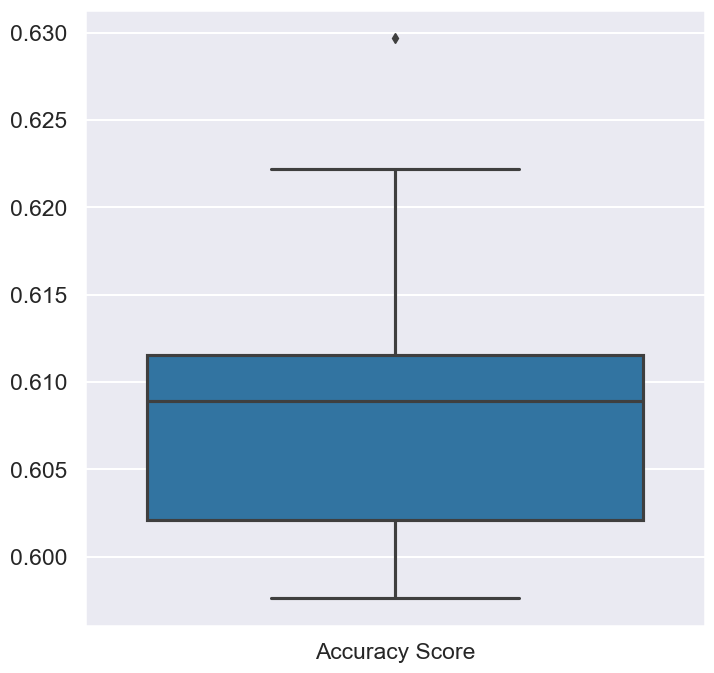

In [435]:
#Grafico Boxplot - Entrenado con 10 Fold Cross Validation

metric_labelsCV = ['Accuracy Score']*len(metricsCV) 
sns.set_context('talk')
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
sns.boxplot(metric_labelsCV,metricsCV)

Notamos como el valor de accuracy parece estar rondando 0,61 para cada K-Fold. Cuando nosotros mejoramos los hiper parametros, logramos obtene run valor un poco por arriba de esta media para test.

In [434]:
#Importancia y reglas del Árbol con mejor Performance
from sklearn.tree import export_text

feat_imps = mejor_performance.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,features)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))
print()

reglas = export_text(mejor_performance, feature_names=list(features))
#print(reglas) es muy verboso

property_bedrooms: 0.015622624152777806
property_rooms: 0.01852010799264896
property_surface_covered: 0.14059029917931093
property_surface_total: 0.17955099154212753
longitud: 0.2804582630376617
latitud: 0.3652577140954731



              precision    recall  f1-score   support

        Alto       0.54      0.65      0.59      3484
        Bajo       0.60      0.63      0.62      3484
       Medio       0.68      0.59      0.63      6968

    accuracy                           0.62     13936
   macro avg       0.61      0.62      0.61     13936
weighted avg       0.62      0.62      0.62     13936

              precision    recall  f1-score   support

        Alto       0.76      0.87      0.81     13936
        Bajo       0.81      0.85      0.83     13934
       Medio       0.89      0.80      0.84     27871

    accuracy                           0.83     55741
   macro avg       0.82      0.84      0.83     55741
weighted avg       0.84      0.83      0.83     55741



Text(37.08333333333333, 0.5, 'True')

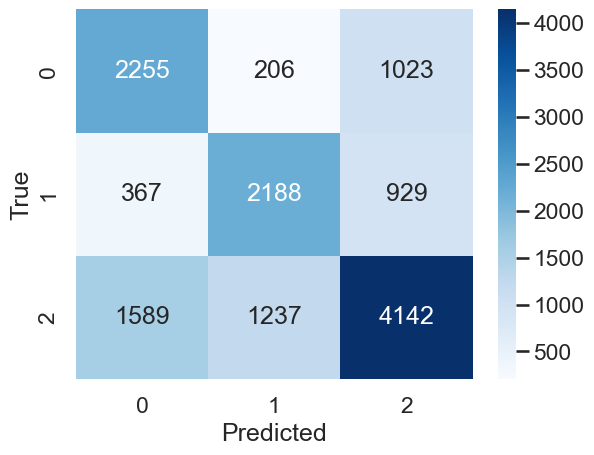

In [424]:
## Prediccion y evaluacion del modelo

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

#Predicción sobre el set de evaluacion
y_pred = mejor_performance.predict(x_test)

#Arbol Reporte y Matriz de Confusion para set de test
print(classification_report(y_test,y_pred))

#Realizamos una predicción sobre el set de train
x_pred = mejor_performance.predict(x_train)

#Arbol Reporte y Matriz de Confusion para set de train
print(classification_report(y_train, x_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Exportamos el modelo

In [ ]:
from joblib import dump
dump(model, 'modelos/arbol-decision.joblib')

## Random Forest - Clasificacion


In [ ]:
def indice_mayor(array):
    max = 0
    for i in range(len(array)):
        if array[max] < array[i]:
            max = i

    return max


param_grid = { "criterion" : ["gini", "entropy"],
               "min_samples_leaf" : [1, 5, 10],
               "min_samples_split" : [2, 4, 8, 16],
               "n_estimators": [20, 50, 100]}

kfold = KFold(n_splits=5)
base_tree = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)
gs = RandomizedSearchCV(estimator=base_tree, param_distributions = param_grid, scoring='accuracy', cv=kfold, n_iter=10)

gs.fit(X=ds_reducido, y=ds_train.tipo_precio);
mejores_parametros = gs.best_params_
print(mejores_parametros)
print(gs.best_score_)

In [ ]:
arbol = RandomForestClassifier().set_params(**mejores_parametros)
results = cross_validate(estimator=arbol, X=ds_reducido, y=ds_train.tipo_precio, cv=5, n_jobs=-1, return_estimator=True)
mejor_arbol = results['estimator'][indice_mayor(results['test_score'])]

##### Importancia de atributos

Esta lista ya nos da información interesante. Termina siendo bastante más importante la localización de la vivienda para el modelo que su superficie. Y concretamente la latitud parece ser más relevante que la lognitud. Mientras que la cantidad de habitaciones y baños no terminan siendo muy relevantes.

In [ ]:
sorted(list(zip(ds_reducido.columns.to_list(), mejor_arbol.feature_importances_)), key=lambda x: -x[1])

##### Gráfico de un arbol

Vemos como para el arbol 17 su criterio principal es la longitud. De ser menor a 58.409 se fija si la superficie cubierta aes menor a 99.5 metros cuadrados, caso contrario en la primera condición se fija si la superficie total es menor a 108.5 metros cuadrados. Así hasta llegar a una hoja que indique si se trata de una propiedad de precio bajo, medio o alto.

In [ ]:
from sklearn import tree
plt.figure(figsize=(20, 20))
tree_plot_=tree.plot_tree(mejor_arbol.estimators_[17], feature_names=ds_reducido.columns.to_list(), filled=True, rounded=True, max_depth= 2)
plt.show(tree_plot_)

##### Evaluación de performance con test

In [ ]:
target = ds_test.tipo_precio
ds_test_reducido = ds_test.drop(['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price', 'tipo_precio', 'pxm2'], axis=1)

In [ ]:
predicted = mejor_arbol.predict(ds_test_reducido)

In [ ]:
from sklearn.metrics import confusion_matrix


ds_resultados = pd.DataFrame(zip(target, predicted), columns=['test', 'pred'])
tabla = confusion_matrix(target, predicted)
sns.heatmap(tabla, cmap='GnBu', annot=True, fmt='g', ).set(title='Predicciones sobre el conjunto de entrenamiento')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import classification_report

metrics = classification_report(target, predicted)
print(metrics)

###### Métricas con el dataset de train

In [ ]:
predicted = mejor_arbol.predict(ds_reducido)
metrics = classification_report(ds_train.tipo_precio, predicted)
print(metrics)

Notamos como el modelo está overfitteando

In [ ]:
dump(mejor_arbol, 'modelos/random-forest.joblib')

## Regresion Logistica - Clasificacion

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score, accuracy_score


from yellowbrick.classifier import ROCAUC

Entrenamos un regresor con nuestro dataset reducido y cross validation en 5 folds.

In [ ]:
ds_test.tipo_precio

In [ ]:
estimator = LogisticRegression(random_state=0, multi_class='multinomial').fit(ds_reducido_normalizado, ds_train_y)
preds = estimator.predict(ds_reducido_normalizado)


accuracy_score(ds_train_y, preds)

In [ ]:
estimator_pca = LogisticRegression(random_state=0, multi_class='multinomial').fit(ds_pca, ds_train_y)
preds_pca = estimator_pca.predict(ds_pca)

accuracy_score(ds_train_y, preds_pca)

Evaluaremos los parámetros que podemos mejorar

In [ ]:
print(classification_report(pred, ds_train_y))

Buscaremos hiperparámetros mediante random search

Como usamos el dataset de PCA, debemos aplicar el mismo PCA al ds de test.

Podemos ver que el score de test es similar al de train. Sin embargo, ninguno de los dos es un buen puntaje

In [ ]:
print("Test score: {:.2f}".format(accuracy_score(ds_train_y, preds_pca)))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(ds_train_y, preds_pca)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(ds_train_y, preds_pca),annot=True, fmt='g')
ax = ax.set(xlabel='Predicted',ylabel='True',title='Matriz de confusión DS normalizado',
            xticklabels=(['Bajo', 'Medio', 'Alto']),
            yticklabels=(['Bajo', 'Medio', 'Alto']))

In [ ]:
print("Test score: {:.2f}".format(accuracy_score(ds_train_y, preds_pca)))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(ds_train_y, preds_pca)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(ds_train_y, preds_pca),annot=True, fmt='g')
ax = ax.set(xlabel='Predicted',ylabel='True',title='Matriz de confusión DS PCA',
            xticklabels=(['Bajo', 'Medio', 'Alto']),
            yticklabels=(['Bajo', 'Medio', 'Alto']))

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades? - Responder Despues

In [ ]:
dump(estimator, 'modelos/regresion-logistica.joblib')

## KNN - Regresión

In [ ]:
# Heatmap de correlacion
ds_train.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
X_train = ds_reducido
X_test = ds_test.drop(columns=['start_date', 'end_date', 'place_l3', 'property_type', 'property_title', 'property_price', 'pxm2', 'tipo_precio'], axis=1)
Y_train = ds_train.property_price
Y_test = ds_test.property_price

In [ ]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables = []
valores = []

variables = ['PSC']*len(list(X_train.property_surface_covered)) + ['PST']*len(list(X_train.property_surface_total))

valores = list(X_train.property_surface_covered) + list(X_train.property_surface_total)

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

In [ ]:
# Medidas train
X_train.describe().T

In [ ]:
#Calculo los cuantiles
x_q3, x_q1 = np.percentile(X_train.property_surface_total, [75 ,25])
y_q3, y_q1 = np.percentile(X_train.property_surface_covered, [75 ,25])

#Calculo el rango intercuartil
iqr_x = x_q3 - x_q1
iqr_y = y_q3 - y_q1

In [ ]:
# Elimino outliers de la variable 'property_surface_total'
X_train = X_train.query(' property_surface_total >= (@x_q1 - @iqr_x*1.5) & property_surface_total <= (@x_q3 + @iqr_x*1.5) ')
Y_train = Y_train[X_train.index]

# Elimino outliers de la variable 'property_surface_covered'
X_train = X_train.query(' property_surface_covered >= (@y_q1 - @iqr_y*1.5) & property_surface_covered <= (@y_q3 + @iqr_y*1.5) ')
Y_train = Y_train[X_train.index]

In [ ]:
# Heatmap correlación
X_train.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables = []
valores = []

variables = ['PSC']*len(list(X_train.property_surface_covered)) + ['PST']*len(list(X_train.property_surface_total))

valores = list(X_train.property_surface_covered) + list(X_train.property_surface_total)

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

In [ ]:
sns.scatterplot(x=X_train.property_surface_covered,y=Y_train)
sns.scatterplot(x=X_train.property_surface_total,y=Y_train)

In [ ]:
# Creo un modelo KNN para regresion y lo ajusto
knn_regressor = KNeighborsRegressor().fit(X_train, Y_train)

#Hago una predicción
Y_pred=knn_regressor.predict(X_test)
Y_pred

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': Y_test, 'Prediccion': Y_pred, 'Error': Y_test - Y_pred})

# View
performance.head()

In [ ]:
# Metricas para evaluar modelos
from sklearn import metrics

mse = metrics.mean_squared_error(
        y_true  = Y_test,
        y_pred  = Y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = Y_test,
        y_pred  = Y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

In [ ]:
#Coef. de Determinación R2
score_knn = knn_regressor.score(X_test, Y_test)
score_knn

In [ ]:
dump(knn_regressor, 'modelos/knn.joblib')

## XGBoost - Regresión

## a elección - Regresión

¿Qué modelo elegirían para predecir el precio de venta de las propiedades? - Responder Despues

## Conclusiones

En primera instancia, queremos mencionar que una de las cosas que nos resultó mas interesante es poder entender mas el dominio de problema de la venta de propiedades.
Nosotros teníamos un conocimiento previo y mas intuitivo de este dominio pero hacer este trabajo nos sirvió para reafirmar conceptos sobre los cuales no teniamos datos veridicos como para realmente justificar.

Por ejemplo, suponiamos que habia algunos barrios de la capital que tenian precios mas caros que otros pero no sabiamos exactamente cuales eran esos barrios. 
Despues de terminado este analisis, notamos que Palermo (tal y como pensabamos) era uno de los barrios de CABA que tenia mas anuncios y varias publicaciones en venta.
Dicho sea de paso, este barrio tenia gran parte de sus propiedades mas caras que otros barrios en relacion a los mismos metros cuadrados.
Es decir, si tenemos dos departamentos de 70 m2 en Villa Santa Rita vs Palermo, notaremos que efectivamente el departamento de Palermo se impone en precio por sobre el departamento de Villa Santa Rita.
Tambien pudimos identificar como varian los precios dependiendo del tipo de vivienda que estemos analizando.
Serian mas caras las casas y los PHs que los departamentos a similar rango de m2 para un mismo barrio. Luego vemos como estas variables se alteran dependiendo de la zona, los m2 y otras variables.

Por otro lado, tambien pudimos desmitificar pensamientos que teniamos con lo que respecta a cantidad de anuncios de propiedades.
Barrios que pensabamos que quizas no era tan "populares" resultaban tener varias publicaciones con varios tipos de viviendas.

Algo que quisimos agregar mediante una imputacion es la distancia de las propiedades a la estacion de subte mas cercana para utilizarla como feature en base a uno de los datasets del gobierno de la ciudad. No tuvimos tiempo para hacerlo pero creemos que podria tener un valor agreagado.

Finalmente, no terminamos con todos los incisos requeridos para esta entrega, pero en los siguientes dias antes de llegar a la fecha de reentrega vamos a estar trabajando en ellos.